<a href="https://colab.research.google.com/github/uitaroh/Cognitive-Behavioural-and-Social-Data/blob/main/Copy_of_Cognitive_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [1]:
#Generical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import itertools
from prettytable import PrettyTable
from google.colab import drive
import math

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Loading, preprocessing and splitting the dataset
from urllib.request import urlopen
from collections import Counter
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#Perceptron 
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsOneClassifier

#Decision Tree and Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

#Support Vector Machine (SVM)
from sklearn import svm
from sklearn.svm import LinearSVC

#Neural Network (NN)
from xgboost import XGBClassifier
'''import tensorflow
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.python.framework.random_seed import set_random_seed
from tensorflow.keras.models import Sequential 
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
'''

#Feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#K-Nearest Neighbour (kNN)
from sklearn.neighbors import KNeighborsClassifier

#Optuna hyperparameter tuning
!pip install optuna
import optuna as op
from optuna.visualization import plot_contour, plot_parallel_coordinate
from optuna.visualization import plot_optimization_history

#PCA
from sklearn.decomposition import PCA

#SelectKBest
#from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

#Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#set random seed
import random
random.seed(42)

import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 4.9 MB/s eta 0:00:00


# Loading and preprocessing data

##Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#import datasets
df_1 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_1.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_2.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_3.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_4.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_5.csv")
df_6 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_6.csv")
df_7 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_7.csv")
df_8 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_8.csv")
df_9 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_9.csv")
df_10 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_10.csv")
df_11 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_11.csv")
df_12 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_12.csv")
df_13 = pd.read_csv("/content/drive/MyDrive/DFCognitive/df_13.csv")

In [ ]:
#converte function when we had to deal with read_excel
#note: leave it here, we will delete it before submission 
def df_converter(df, sep = ";"):
  name_col_str = df.columns[0]
  col_list = name_col_str.split(sep)
  index_list = df.index 
  new_df = pd.DataFrame(columns=col_list, index=index_list)
  for i in index_list: 
    row_str = df.iloc[i][0]
    row_list = row_str.split(sep)
    list_zip = zip(col_list, row_list)
    row_dict = dict(list_zip)
    new_df.loc[i] = pd.Series(row_dict)
  return new_df

## df_list

In [ ]:
#df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, 
           #df_11, df_12, df_13]
df_list = [df_1, 
           df_2, 
           df_3, 
           df_4, 
           df_5, 
           df_6, 
           df_7, 
           df_8, 
           df_9, 
           #df_10, 
           df_11, 
           df_12, 
           df_13
           ]
df_list_10 = [df_10]  # Only the dataset 10

##Exploring our datasets

In [ ]:
for df in df_list:
  print('Another dataset')
  print('Data shape')
  print(df.shape) #data shape
  print('Data head')
  print(df.head(5)) #display first 5 columns
  print('Data types')
  print(df.dtypes) #data types
  print('Description of dataset')
  print(df.describe()) # return analysis of each numerical value


Another dataset
Data shape
(1346, 28)
Data head
   Mach1   Mach2   Mach3   Mach4   Mach5   Mach6   Mach7   Mach8   Mach9   \
0       3       1       1       4       2       3       4       2       4   
1       5       4       2       5       2       5       5       3       2   
2       3       2       2       4       1       4       3       2       2   
3       2       4       4       3       2       4       3       3       2   
4       4       3       1       1       2       1       2       5       2   

   Psycho1   ...  Narc1   Narc2   Narc3   Narc4   Narc5   Narc6   Narc7   \
0         2  ...       1       1       2       1       2       1       1   
1         2  ...       2       3       1       1       3       2       1   
2         2  ...       2       2       2       1       2       1       3   
3         2  ...       5       4       2       2       4       4       4   
4         3  ...       4       3       1       1       5       1       3   

   Narc8   Narc9   CONDITION  
0

##Cleaning data

In [ ]:
#function to extract the pointer's name
def get_var_name(variable):
    globals_dict = globals()
    return [var_name for var_name in globals_dict if globals_dict[var_name] is variable]

In [ ]:
#Counting NA values in each dataframe
for df in df_list:
  print (f'The dataframe {get_var_name(df)[0]} has {df.isna().sum().sum()} NA values out of {df.size} elements')

The dataframe df_1 has 0 NA values out of 37688 elements
The dataframe df_2 has 0 NA values out of 23868 elements
The dataframe df_3 has 0 NA values out of 8442 elements
The dataframe df_4 has 0 NA values out of 16376 elements
The dataframe df_5 has 0 NA values out of 19006 elements
The dataframe df_6 has 0 NA values out of 182104 elements
The dataframe df_7 has 0 NA values out of 26988 elements
The dataframe df_8 has 0 NA values out of 12882 elements
The dataframe df_9 has 0 NA values out of 8234 elements
The dataframe df_11 has 0 NA values out of 12818 elements
The dataframe df_12 has 0 NA values out of 4500 elements
The dataframe df_13 has 0 NA values out of 15268 elements


In [ ]:
#data cleaning
for l in df_list:
  l.dropna() #dropping NA values


##Preprocessing and splitting function


In [ ]:
def split(df):
  
  # split into dependent and independent sets
  X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

  # Change response to binary 0 and 1
  np.place(y, y=='H', 1)
  np.place(y, y=='D', 0)

  #splitting the original dataset
  X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

  #Scaling the dataset
  scaler=Normalizer().fit(X_train)
  X_train=scaler.transform(X_train)
  X_test=scaler.transform(X_test)

  #we change type from 'object' to 'int' so that our study recognizes it
  y_train=y_train.astype('int')
  y_test=y_test.astype('int')
  return X, y, X_train , X_test, y_train , y_test 

#X_train , X_test, y_train , y_test = split(df) 



# Defining modelling, evaluation and selection functions

## Defining objectives for our models



In [ ]:
#SVM tuning 
def objective_SVM(trial):
    kernel=trial.suggest_categorical('kernel',['poly','linear','sigmoid','rbf'])
    c=trial.suggest_float("C",0.1,5.0,log=True)
    gamma=trial.suggest_categorical('gamma',['auto','scale'])
    degree=trial.suggest_int("degree",1,3,log=True)
    #probability = trial.set_user_attr("probability",True)
    m =svm.SVC(kernel=kernel,degree=degree,gamma=gamma,C=c, probability = True)
    m.fit(X_train,y_train)
    return accuracy_score(y_train, m.predict(X_train))

#K-NN tuning
def objective_KNN(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 3, 20)
   # weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
   # metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    m = KNeighborsClassifier(n_neighbors=n_neighbors)
    m.fit(X_train,y_train)
    return accuracy_score(y_train, m.predict(X_train))
#RF tuning
def objective_RF(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 500)
    max_depth = float(int(trial.suggest_loguniform('max_depth', 1, 32)))
    #min_samples_split = int(trial.suggest_loguniform('min_samples_split', 2, 10))
    m = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    m.fit(X_train,y_train)
    return accuracy_score(y_train, m.predict(X_train))

#Tree tuning
def objective_T(trial):
    max_depth = trial.suggest_int('max_depth', 3, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    m = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)
    m.fit(X_train,y_train)
    return accuracy_score(y_train, m.predict(X_train))
#XGB classifier NN model
def objective_XGB(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    m = XGBClassifier(**params)
    m.fit(X_train, y_train)
    return accuracy_score(y_train, m.predict(X_train))

## Modelling function

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Modelling function
def modelling(model, X_train, X_val, y_train, y_val, hyper = None,  tuning = False, flow = False, n = None):
  
#decide later on what plots to show for tuning and read about types of samplers
  if tuning == True:
    study = op.create_study(direction="maximize")
    if model=='KNN':
      study.optimize(objective_KNN, n_trials = n ,n_jobs = -1) #number of trials and n_jobs is for parralelization
    if model == 'SVM':
      study.optimize(objective_SVM, n_trials = n,n_jobs = -1) #number of trials and n_jobs is for parralelization
    if model == "Tree":
      study.optimize(objective_T, n_trials = n ,n_jobs = -1) #number of trials and n_jobs is for parralelization
    if model == "RF":
      study.optimize(objective_RF, n_trials = n,n_jobs = -1) #number of trials and n_jobs is for parralelization
    if model == "XGB":
      study.optimize(objective_XGB, n_trials=n, n_jobs = -1)
    plot_optimization_history(study)
    best= study.best_trial
    hyper = best.params   
    #plot_parallel_coordinate(study).show()  
    #plot_contour(study).show()
  #Model training 
  if model=='KNN':
    m = KNeighborsClassifier(**hyper)
  if model == 'SVM':
    m = svm.SVC(**hyper, probability = True)  
  if model == "Tree":
    m = tree.DecisionTreeClassifier(random_state=123,criterion='entropy', **hyper) 
  if model == "RF":
    m = RandomForestClassifier(random_state=123,criterion='entropy', **hyper)
  if model == "XGB":
    m = XGBClassifier(random_state = 123, **hyper)
  if flow == True: 
    #fit and predict with model  
    m.fit(X_train,y_train)
    y_pred = m.predict(X_val)
    #calculate probabilities
    y_prob = m.predict_proba(X_val)[:, 1]

    return y_val, y_pred, y_prob
  if flow == False:
    return m, hyper

## Evaluation function

In [ ]:
#model evaluation
def evaluation(y_test,y_pred,y_prob=None):
  # Model Accuracy
  print("Accuracy:",accuracy_score(y_test, y_pred))
  #Precision
  print("Precision:",precision_score(y_test, y_pred))
  #Recall
  print("Recall:",recall_score(y_test, y_pred))
  #Confusion matrix
  cf =confusion_matrix(y_test,y_pred)
  plt.matshow(cf)
  plt.title('Confusion Matrix Plot')
  plt.colorbar()
  plt.xlabel('Precited')
  plt.ylabel('Actual')
  plt.show();
  #ROC curve and AUC score

  #roc curve calculation
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  #auc calculation
  auc = roc_auc_score(y_test, y_prob)
  print('AUC: %.3f' % auc)
  plt.plot(fpr, tpr, linestyle='--', label='Roc curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

## Selection function

In [ ]:
#feature selection function 
def selection(s_type, df, n= None):   # n: number of features needed for ALL the models except PCA
  
  """
  IMPORTANT!!!
  Both SVM and logistic regression with LASSO regularization have been implemented!
  INPUT: s_type = 'LOGISTIC_LASSO'
         s_type = 'SVM_LASSO'
         respectively to call logistic regression and SVM.
  """

  #-----------------------------------------------------------------------------------------
  # Get the names of the dataframe, otherwise during splitting phase, we will lose the names
  #-----------------------------------------------------------------------------------------
  names = df.columns.tolist()[:-1] 

  X, y, X_train , X_test, y_train , y_test = split(df)  
  # PCA
  if s_type=='PCA':
    pca = PCA(n_components=5)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
    print("PCA Explainded variance ratio {}".format(pca.explained_variance_ratio_))
    principalDf['CONDITION']=y
    return principalDf

  if s_type == 'SelectKBest':

    # convert to dataframe
    X = pd.DataFrame(X, columns = names)
    X_train = pd.DataFrame(X_train, columns = names)
    X_test = pd.DataFrame(X_test, columns = names)
    
    sel = SelectKBest(score_func=chi2, k=n)
    sel.fit(X_train, y_train)
    X_train_sel = sel.transform(X_train)
    X_test_sel = sel.transform(X_test)

    selected_features_k_best = sel.get_feature_names_out()  # get the selected names
    mask = sel.get_support()  # get the mask

    coef = sel.scores_[mask, ]  # mask the selected coefficients
    coef_series = pd.Series(coef, index=selected_features_k_best) # change to panda series

    coef_series_abs = coef_series.abs()  # take the absolute value
    coef_series_abs.sort_values(ascending = False, inplace=True)  # inplace sorting
    
    top_20_selected = coef_series_abs.index  # top 20% most relavant features

    return X_train_sel, X_test_sel, top_20_selected

  if s_type == 'LOGISTIC_LASSO':
    #---------------------------------------------------------------------------------------------------
    # feature selection by LASSO, linear regression
    # Hyperparameter: alpha(lambda)
    # Note: The input X must be converted to DataFrame first as it is required for the selected features.
    #---------------------------------------------------------------------------------------------------

    #defining a standard scaler
    scaler=StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    # convert to dataframe
    X = pd.DataFrame(X, columns = names)
    X_train = pd.DataFrame(X_train, columns = names)
    X_test = pd.DataFrame(X_test, columns = names)
    
    #  select the features with LASSO regularized linear regression
    sel_lasso = SelectFromModel(        
        LogisticRegression(penalty='l1', solver='liblinear', n_jobs=-1, random_state=1)   # L1 regularization
    )
    sel_lasso.fit(X_train, y_train)

    # boolean output for features with non-zero coefficients
    sel_lasso.get_support()  

    # identify the name of the selected features
    selected_features_lasso = X_train.columns[(sel_lasso.estimator_.coef_ != 0).ravel().tolist()]

    coef = sel_lasso.estimator_.coef_[sel_lasso.estimator_.coef_ != 0]  # get the coefficient
    
    coef_series = pd.Series(coef, index=selected_features_lasso) # change to panda series

    coef_series_abs = coef_series.abs()  # take the absolute value
    coef_series_abs.sort_values(ascending = False, inplace=True)  # inplace sorting
    
    top_20_selected = coef_series_abs.index[: n]  # top 20% most relavent features

    # remove the features 
    X_train_selected_lasso = sel_lasso.transform(X_train)
    X_test_selected_lasso = sel_lasso.transform(X_test)

    return X_train_selected_lasso, X_test_selected_lasso, top_20_selected

  if s_type == 'SVM_LASSO':

    #---------------------------------------------------------------------------------------------------
    # feature selection by LASSO, linear regression
    # Hyperparameter: alpha(lambda)
    # Note: The input X must be converted to DataFrame first as it is required for the selected features.
    #---------------------------------------------------------------------------------------------------

    #defining a standard scaler
    scaler=StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    # convert to dataframe
    X = pd.DataFrame(X, columns = names)
    X_train = pd.DataFrame(X_train, columns = names)
    X_test = pd.DataFrame(X_test, columns = names)
    
    #  select the features with LASSO regularized linear regression
    sel_lasso = SelectFromModel(        
        LinearSVC(penalty='l1', dual= False, random_state=1)   # L1 regularization
    )
    sel_lasso.fit(X_train, y_train)

    # boolean output for features with non-zero coefficients
    sel_lasso.get_support()  

    # identify the name of the selected features
    selected_features_lasso = X_train.columns[(sel_lasso.estimator_.coef_ != 0).ravel().tolist()]

    coef = sel_lasso.estimator_.coef_[sel_lasso.estimator_.coef_ != 0]  # get the coefficient
    
    coef_series = pd.Series(coef, index=selected_features_lasso) # change to panda series

    coef_series_abs = coef_series.abs()  # take the absolute value
    coef_series_abs.sort_values(ascending = False, inplace=True)  # inplace sorting
    
    top_20_selected = coef_series_abs.index[: n]  # top 20% most relavent features

    # remove the features 
    X_train_selected_lasso = sel_lasso.transform(X_train)
    X_test_selected_lasso = sel_lasso.transform(X_test)

    return X_train_selected_lasso, X_test_selected_lasso, top_20_selected

  if s_type == 'VAR_SEL':
    #----------------------------------------------------------------------------------------------
    # Feature selection by removing columns of low variance.
    #----------------------------------------------------------------------------------------------

    X = pd.DataFrame(X, columns = names)
    X_train = pd.DataFrame(X_train, columns = names)
    X_test = pd.DataFrame(X_test, columns = names)

    # get the variance of the dataframe
    variance = X.var()
    variance.sort_values(ascending = True)[: n]

    selected_features = variance.index.tolist()
    X_train_selected_var = df.loc[: ,selected_features]
    X_test_selected_var = df.loc[:, selected_features]

    return X_train_selected_var, X_test_selected_var, selected_features

  if s_type == 'TAR_SEL': 
    #----------------------------------------------------------------------------------------------
    # Feature selection by selecting the ones that are highly correlated with the target.
    #----------------------------------------------------------------------------------------------
    X = pd.DataFrame(X, columns = names)
    X_train = pd.DataFrame(X_train, columns = names)
    X_test = pd.DataFrame(X_test, columns = names)

    selected_features_tar = np.asarray(abs(X.corr().iloc[ :X.shape[1] - 2, -1]).sort_values(ascending = False).keys()[: n].tolist())  # get the first n most relavent features
    
    X_train_selected_tar = X_train.loc[:, selected_features_tar]
    X_test_selected_tar = X_test.loc[:, selected_features_tar]
    
    return X_train_selected_tar, X_test_selected_tar, selected_features_tar

## Permutation feature importance

In [ ]:
def permutation_imp(model, dataset, perc_items): #model = SVM, KNN, Tree, RF ; dataset = df , perc_items = 0.2 

  ''' 
  Return a set with a given percentage of best features selected by importance
  '''

  if perc_items < 0 or perc_items > 1:
    print("Invalid number of best items: percentage needs to range between 0 and 1 ")
  
  elif perc_items == 0:
    print("No features selected")

  elif perc_items == 1:
    print("No feature selection performed")

  else:
    num_best_items = math.ceil(dataset.shape[1]*perc_items)

    model.fit(X_train, y_train)
    
    result = permutation_importance(
    estimator=model, 
    X=X_test,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
    )
    
    #indices = np.argsort(result['importances_mean'])[::-1]
    indices = result.importances_mean.argsort()[::-1][:num_best_items]
    best_feat_name = dataset.columns[indices]
    best_feat_score = result['importances_mean'][indices]

  return best_feat_name, best_feat_score

In [ ]:
def compare(x,y):
  return print("The Pearson's correlation coefficient between selected features is {}".format(stats.pearsonr(x, y)[0]))

## Recursive Feature Elimination (RFE) TO CHECK--MAYBE SELECTION or DELETE 

In [ ]:
def rec_feat_elimination(model, dataset, perc_items): #model = SVM, KNN, Tree, RF ; dataset = df , perc_items = 0.2 

  ''' 
  Return a set with a given percentage of best features 
  selected by Recursive Feature Elimination
  '''

  if perc_items < 0 or perc_items > 1:
    print("Invalid number of best items: percentage needs to range between 0 and 1 ")
  
  elif perc_items == 0:
    print("No features selected")

  elif perc_items == 1:
    print("No feature selection performed")

  else:
    num_best_items = math.ceil(dataset.shape[1]*perc_items)

    selector = RFE(model, n_features_to_select= num_best_items, step=1)
    selector = selector.fit(X_train, y_train)
    
    imp_feat_index = selector.support_  #indices of important features
    best_feat_name = X.columns[imp_feat_index]  #names of important features
  
  return best_feat_name

# Testing 

## Test the modelling function on df 10 -> DONE! (10.5 hours)


In [ ]:
'''
import seaborn as sns
sns.set(rc={'figure.figsize':(50,5)})
df_long = df.melt(id_vars=['CONDITION'], value_vars=list(df.columns))
sns.set_style('white')
ax = sns.violinplot(data=df_long.iloc[:, :10], x='variable', y='value', hue='CONDITION', split=True, palette='flare')
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()
'''

"\nimport seaborn as sns\nsns.set(rc={'figure.figsize':(50,5)})\ndf_long = df.melt(id_vars=['CONDITION'], value_vars=list(df.columns))\nsns.set_style('white')\nax = sns.violinplot(data=df_long.iloc[:, :10], x='variable', y='value', hue='CONDITION', split=True, palette='flare')\nax.legend()\nsns.despine()\nplt.tight_layout()\nplt.show()\n"

## Testing selection function on df 10 -> DONE!

## Testing modelling functionon all df but df_10 -> DONE!

TESTING ON THE DF df_1
Accuracy for KNNis 0.5851851851851851
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.5925925925925926
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.6333333333333333
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.6407407407407407
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.5703703703703704
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of t

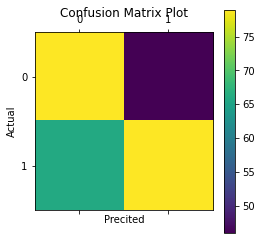

AUC: 0.628


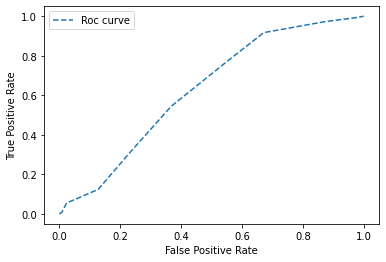

Accuracy: 0.6037037037037037
Precision: 0.6417910447761194
Recall: 0.593103448275862


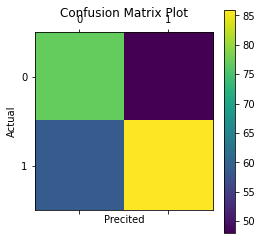

AUC: 0.590


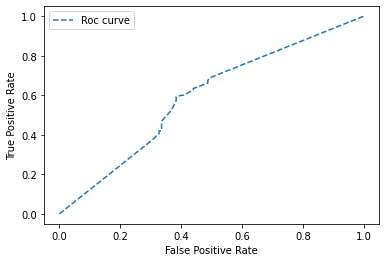

Accuracy: 0.6111111111111112
Precision: 0.6639344262295082
Recall: 0.5586206896551724


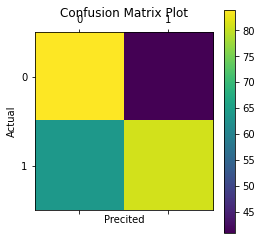

AUC: 0.683


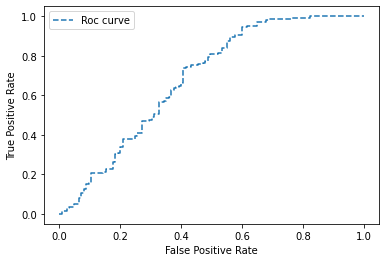

Accuracy: 0.6148148148148148
Precision: 0.6589147286821705
Recall: 0.5862068965517241


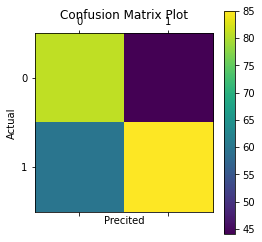

AUC: 0.699


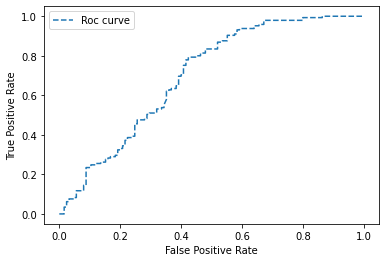

Accuracy: 0.6222222222222222
Precision: 0.656934306569343
Recall: 0.6206896551724138


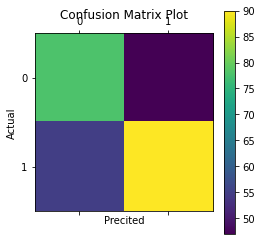

AUC: 0.681


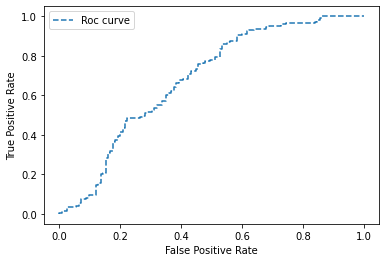

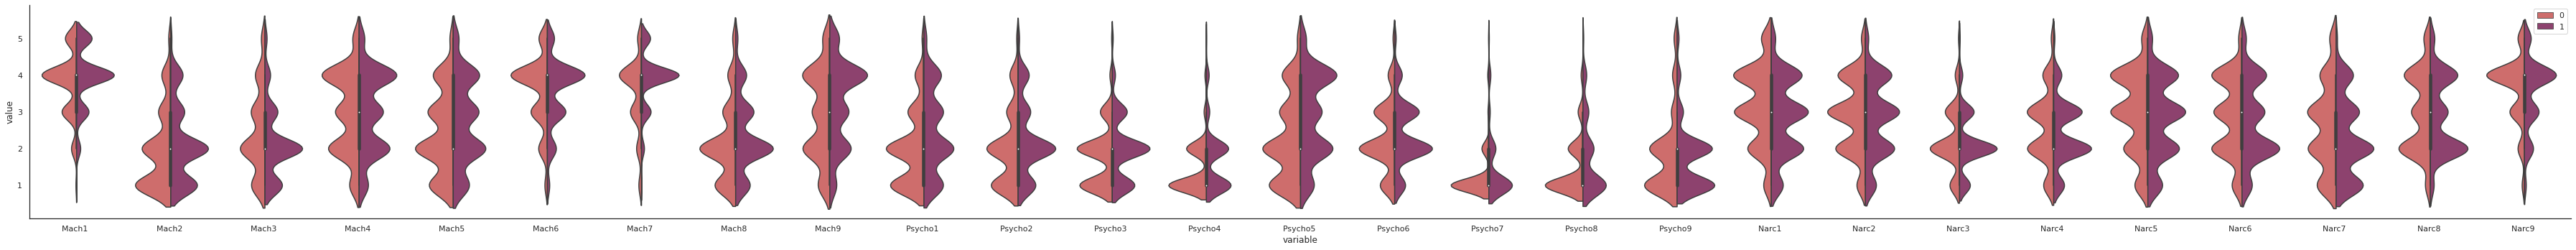

TESTING ON THE DF df_2
Accuracy for KNNis 0.7686832740213523
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.8327402135231317
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8718861209964412
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.8149466192170819
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8718861209964412
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of t

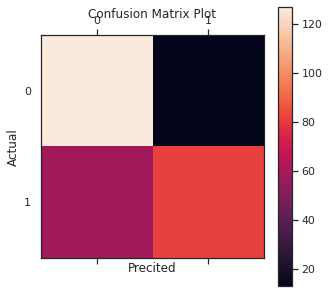

AUC: 0.875


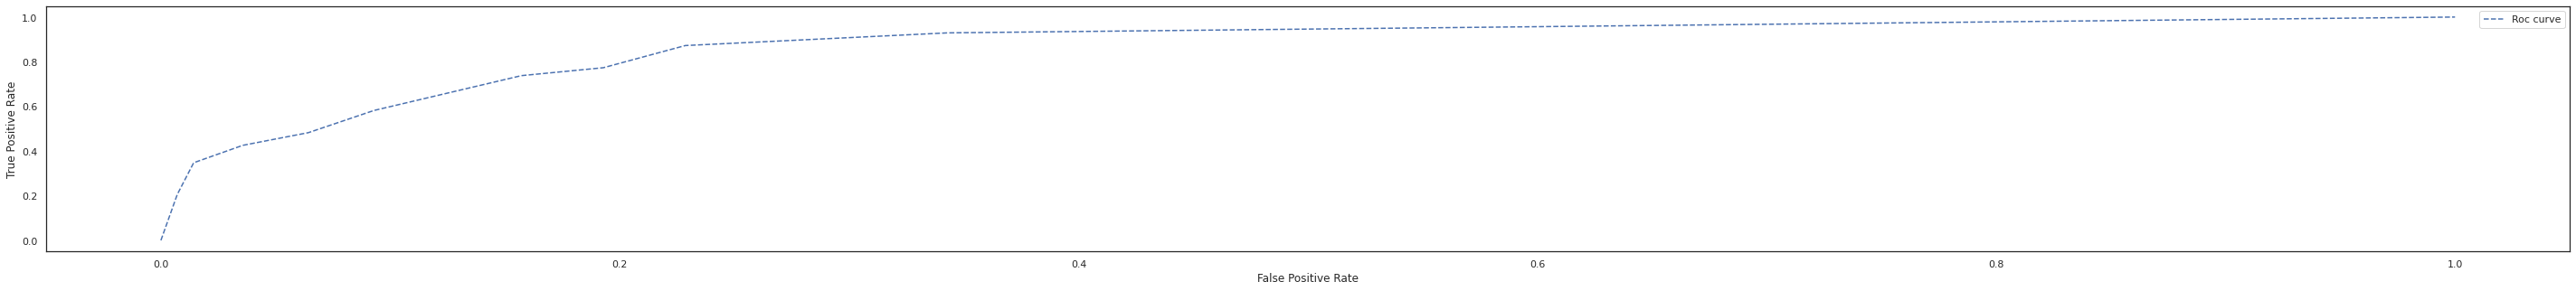

Accuracy: 0.8042704626334519
Precision: 0.8359375
Recall: 0.7588652482269503


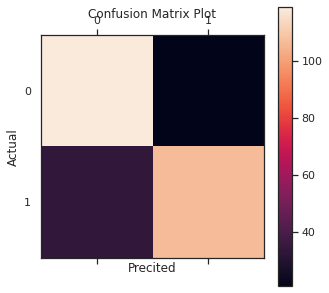

AUC: 0.860


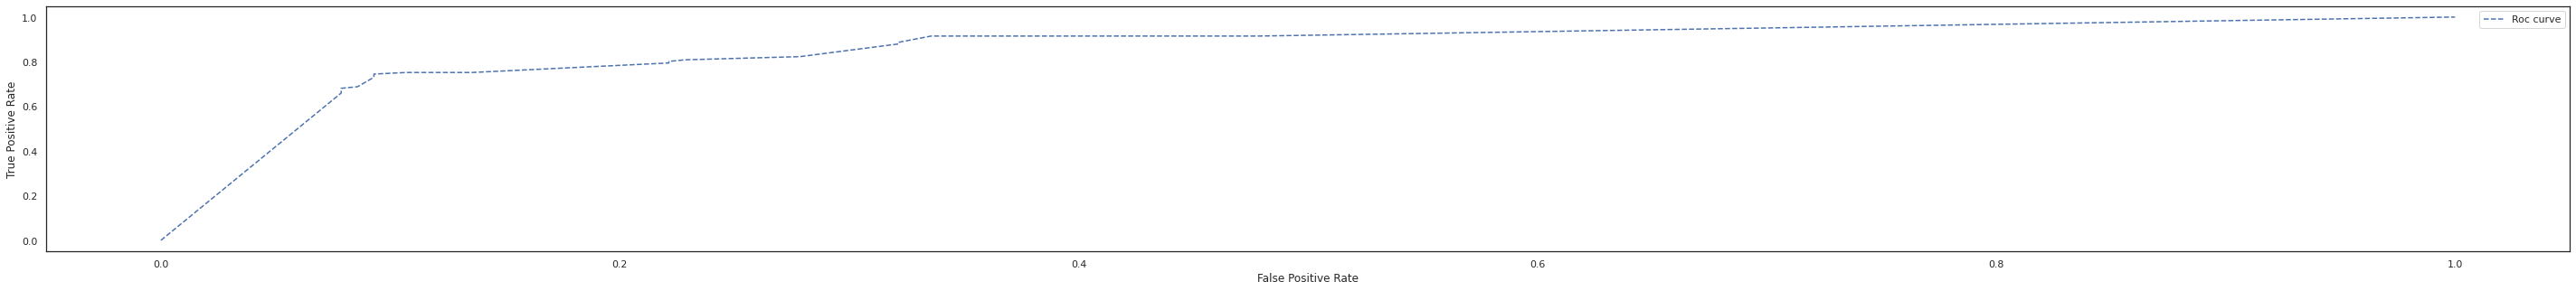

Accuracy: 0.8718861209964412
Precision: 0.8301886792452831
Recall: 0.9361702127659575


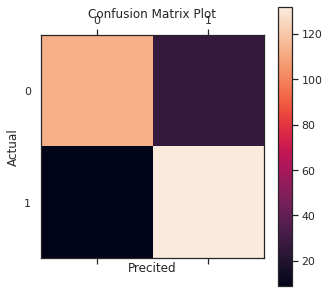

AUC: 0.961


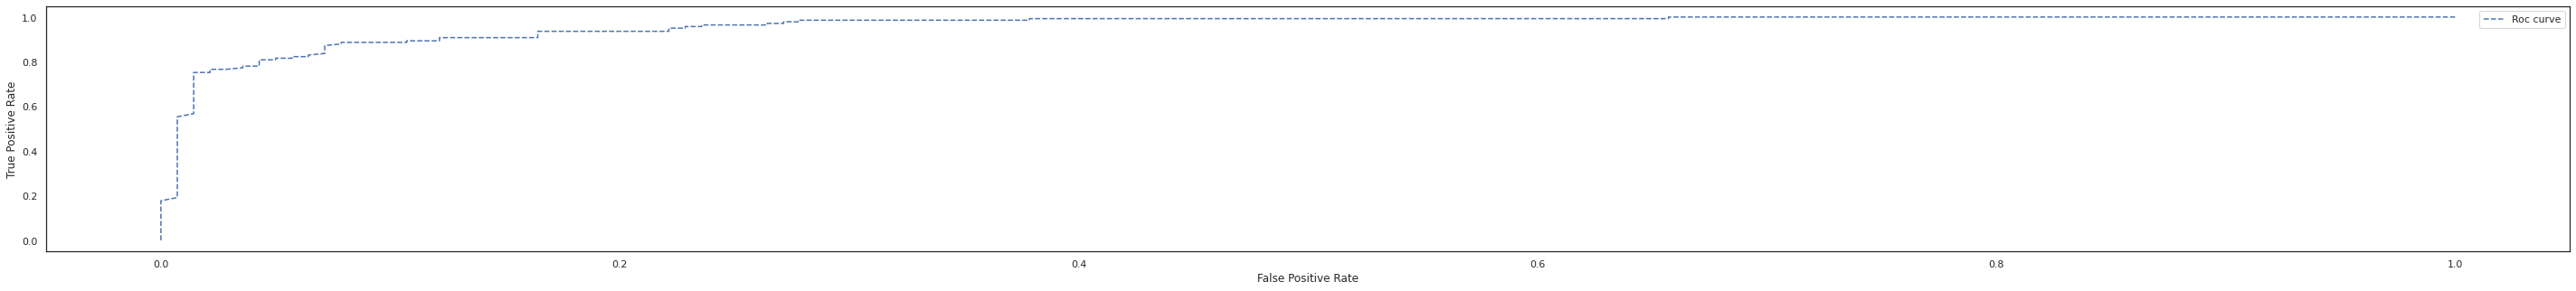

Accuracy: 0.8683274021352313
Precision: 0.8466666666666667
Recall: 0.900709219858156


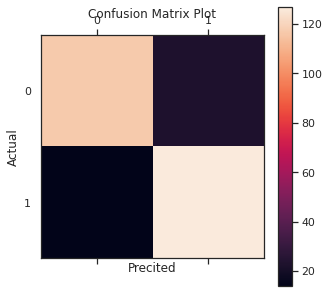

AUC: 0.934


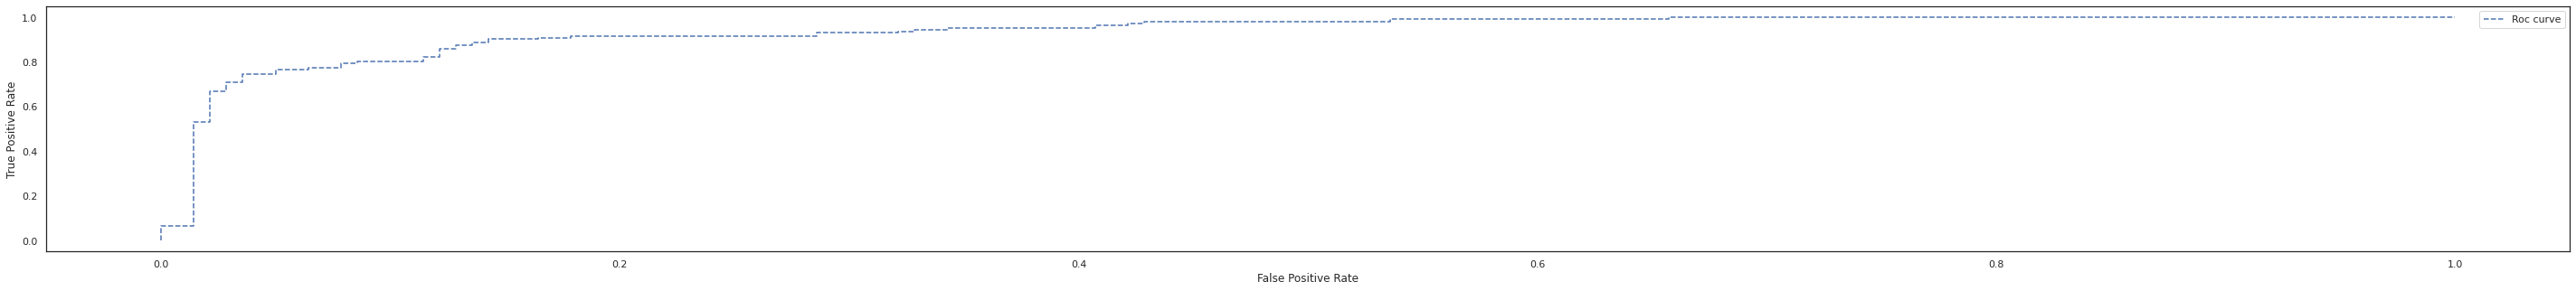

Accuracy: 0.8362989323843416
Precision: 0.8368794326241135
Recall: 0.8368794326241135


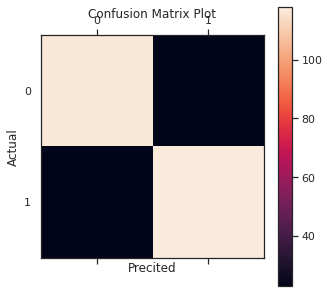

AUC: 0.923


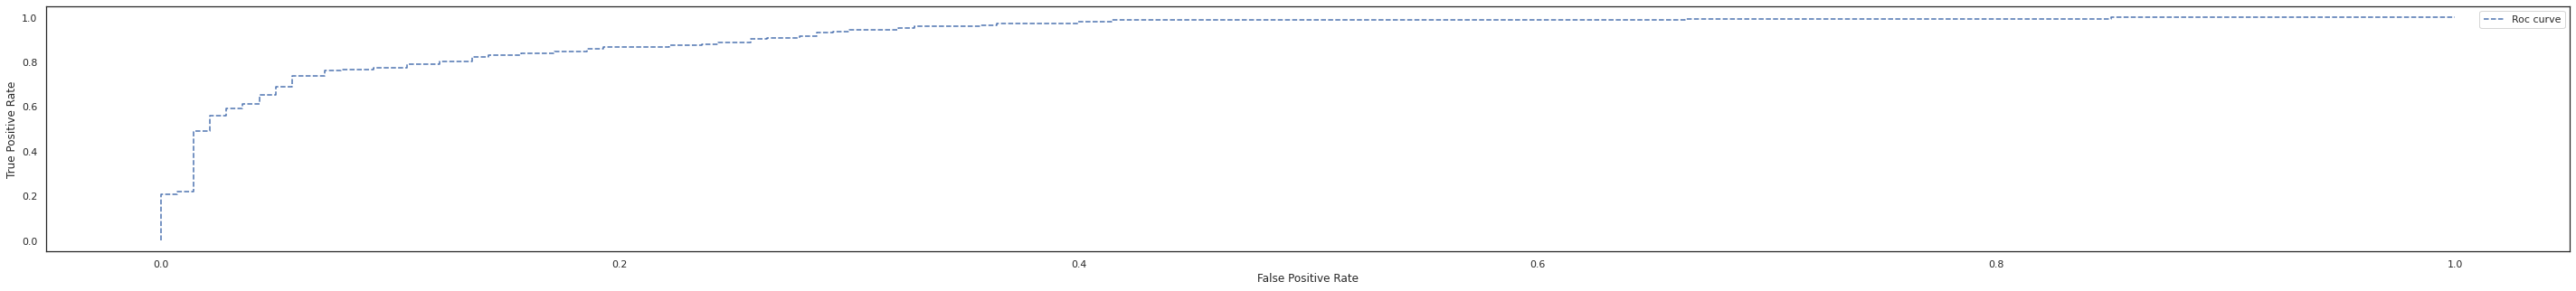

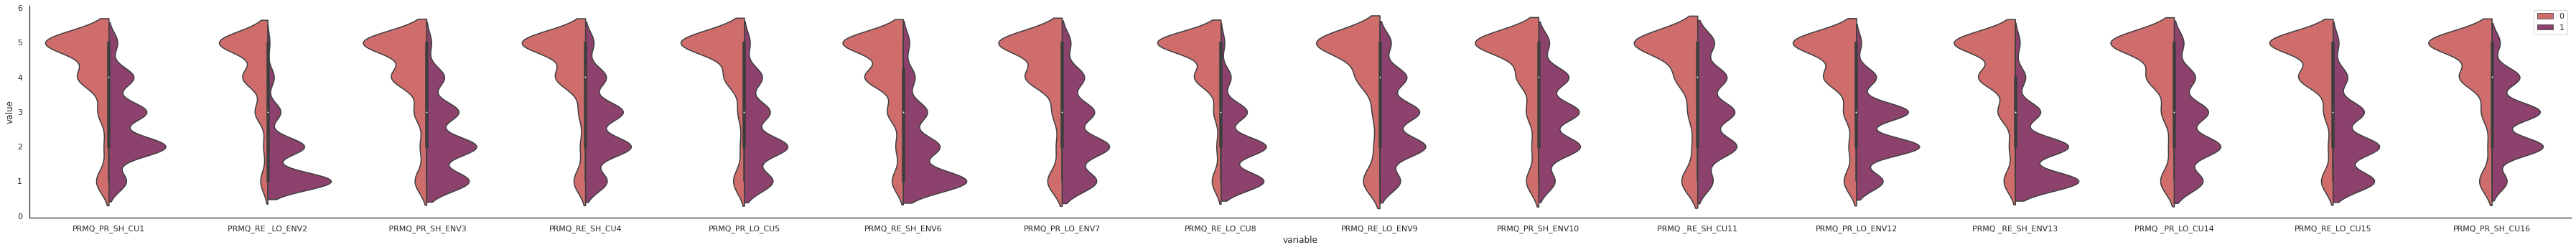

TESTING ON THE DF df_3
Accuracy for KNNis 0.691358024691358
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.6790123456790124
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8518518518518519
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.8148148148148148
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8765432098765432
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of th

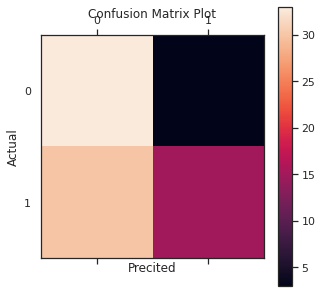

AUC: 0.833


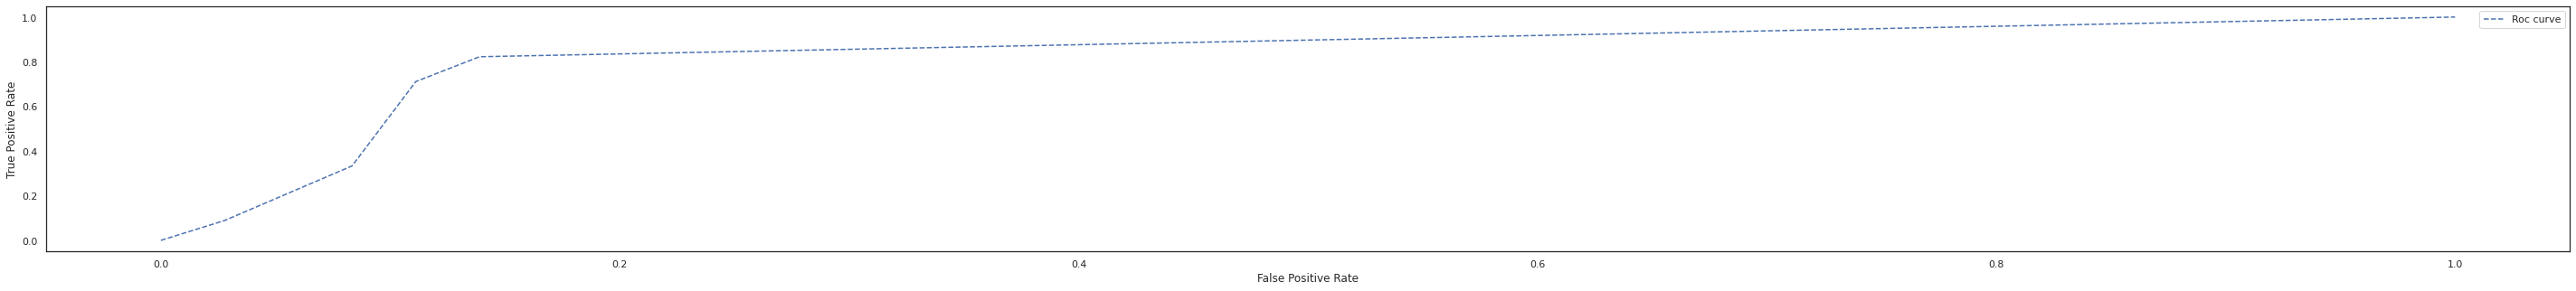

Accuracy: 0.7283950617283951
Precision: 0.8108108108108109
Recall: 0.6666666666666666


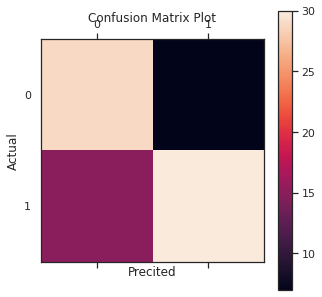

AUC: 0.840


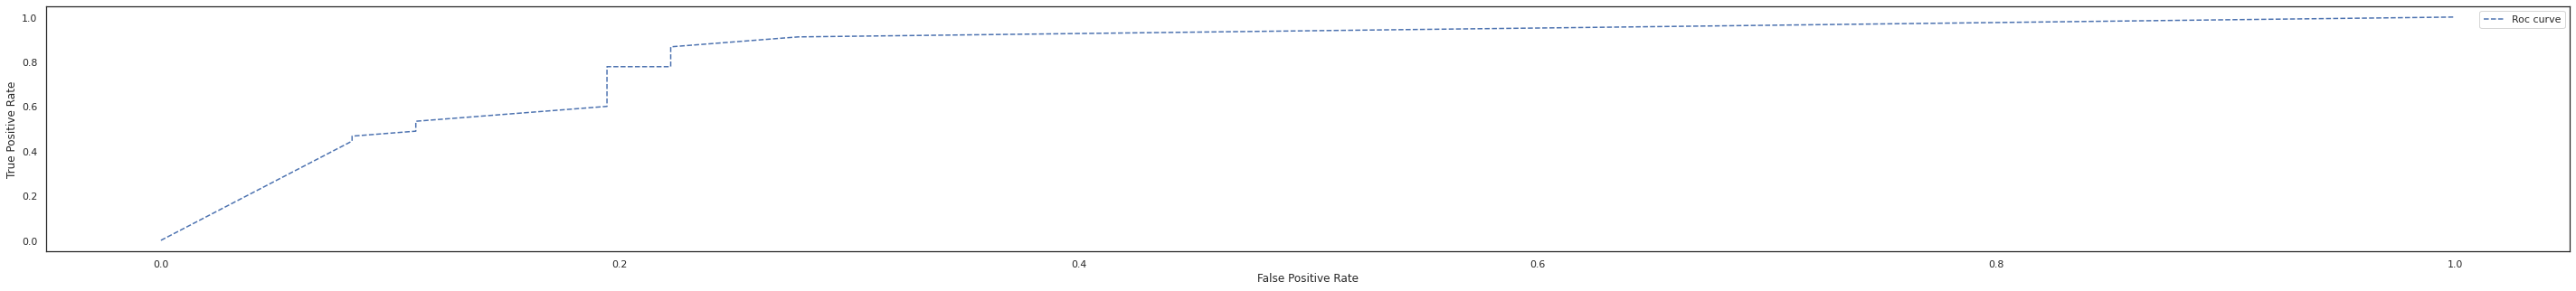

Accuracy: 0.8518518518518519
Precision: 0.9024390243902439
Recall: 0.8222222222222222


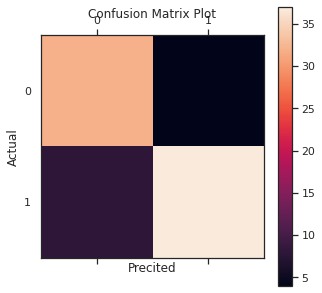

AUC: 0.934


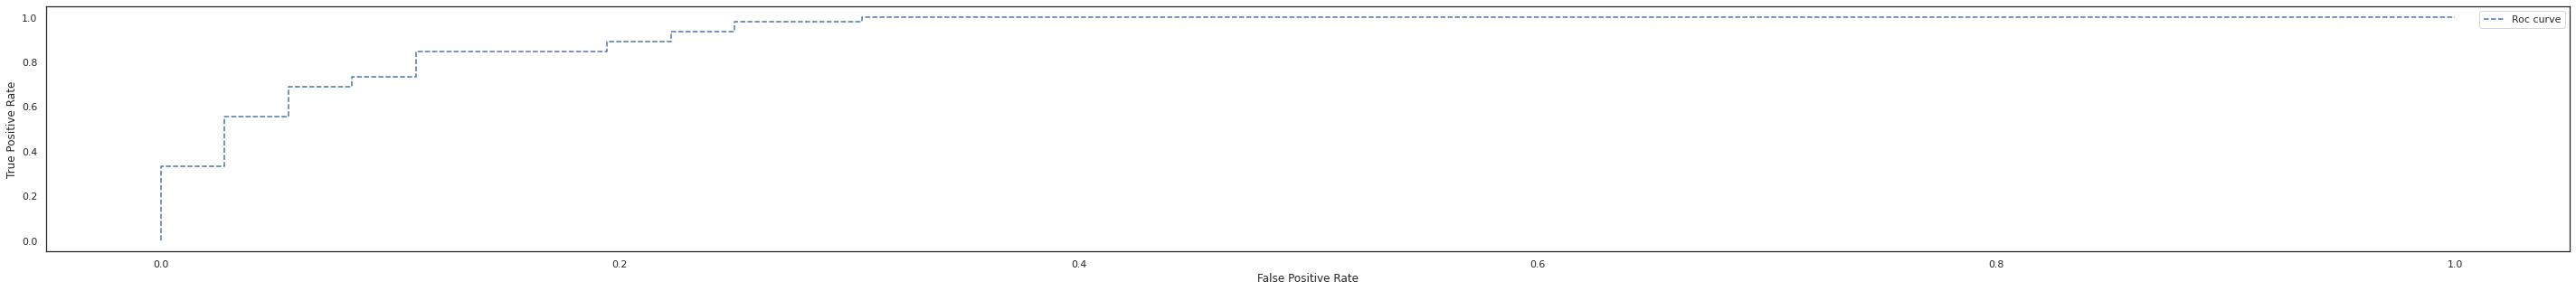

Accuracy: 0.7901234567901234
Precision: 0.868421052631579
Recall: 0.7333333333333333


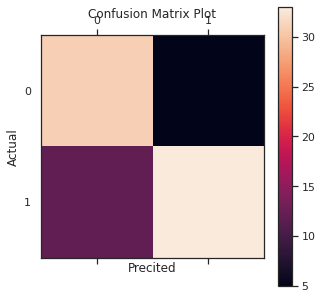

AUC: 0.900


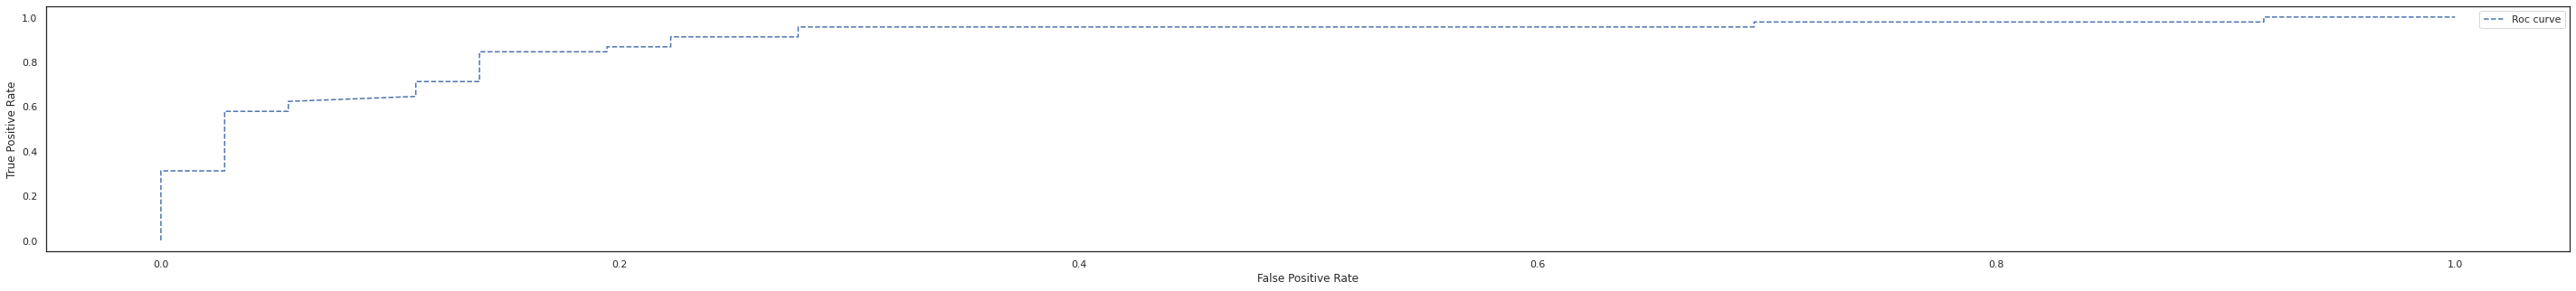

Accuracy: 0.8024691358024691
Precision: 0.8918918918918919
Recall: 0.7333333333333333


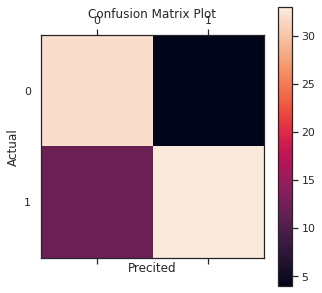

AUC: 0.948


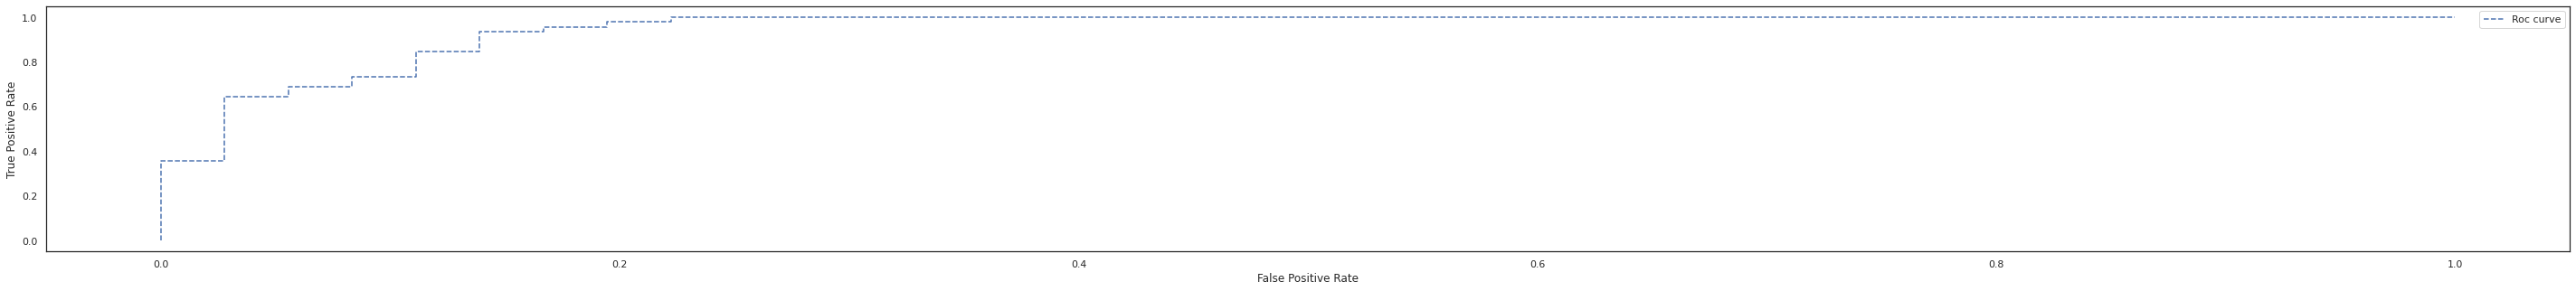

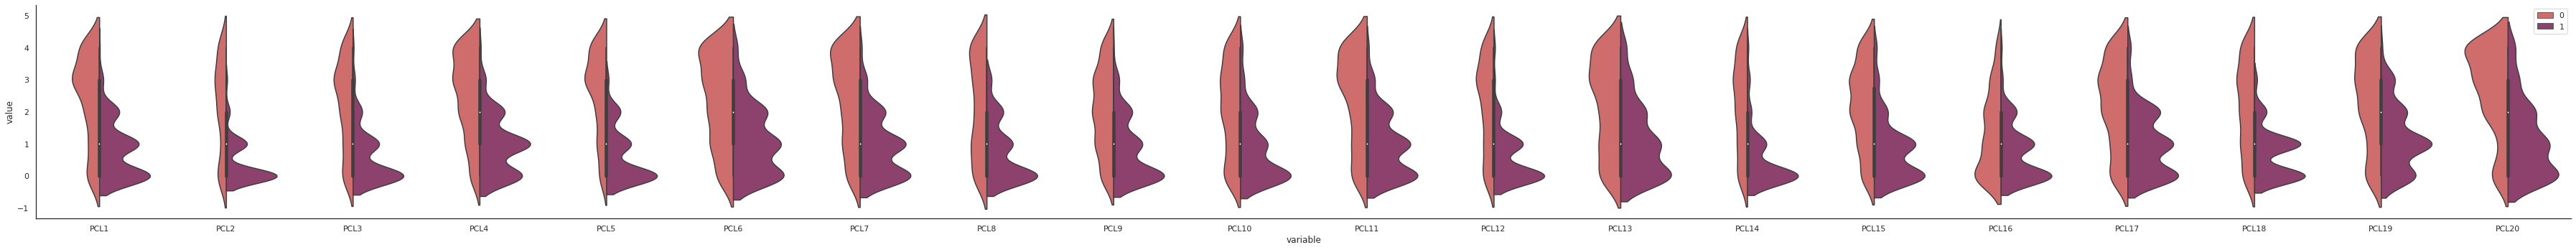

TESTING ON THE DF df_4
Accuracy for KNNis 0.8251748251748252
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.8531468531468531
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.965034965034965
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9300699300699301
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8951048951048951
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of th

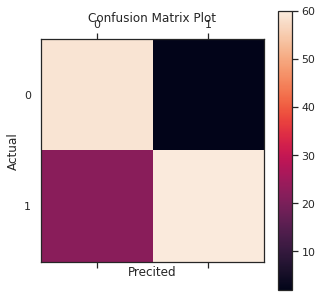

AUC: 0.929


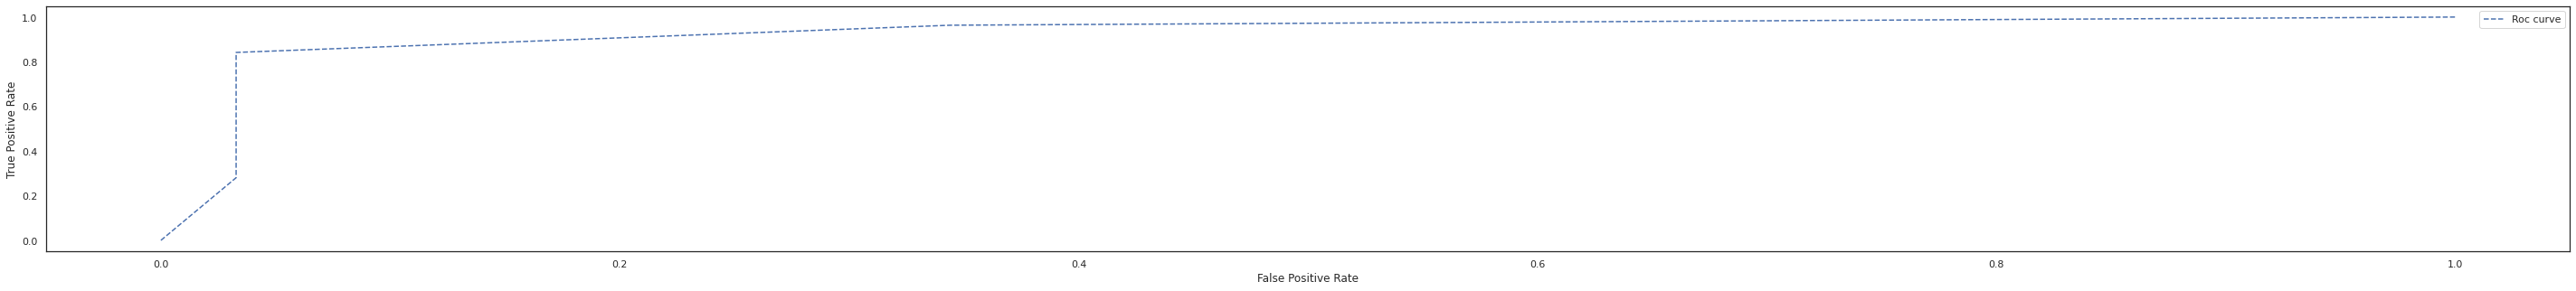

Accuracy: 0.9090909090909091
Precision: 0.9726027397260274
Recall: 0.8658536585365854


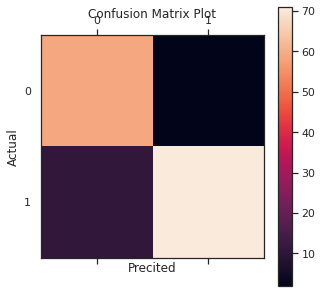

AUC: 0.920


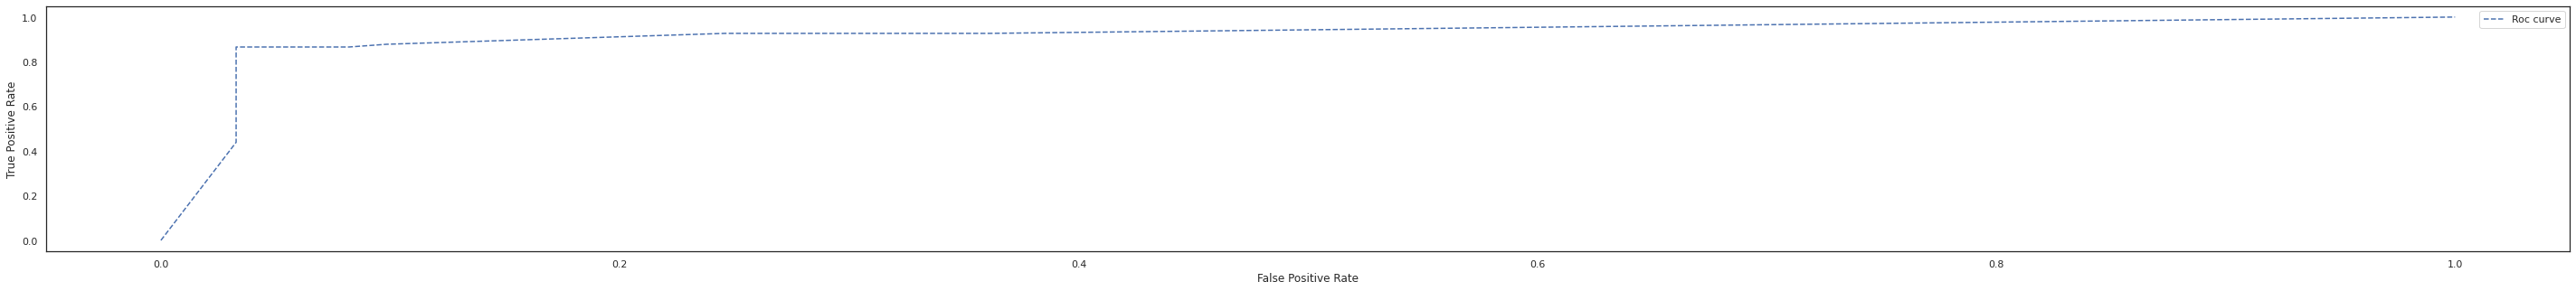

Accuracy: 0.9370629370629371
Precision: 0.974025974025974
Recall: 0.9146341463414634


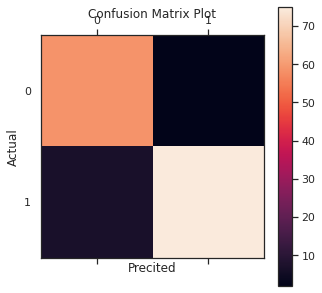

AUC: 0.973


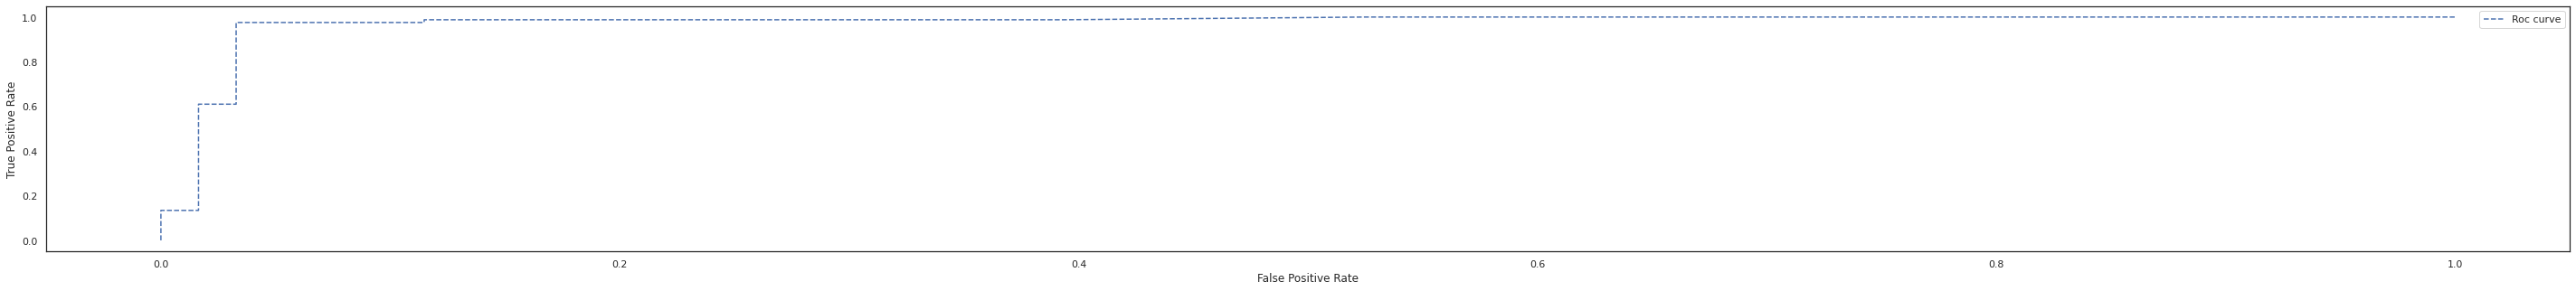

Accuracy: 0.8321678321678322
Precision: 0.953125
Recall: 0.7439024390243902


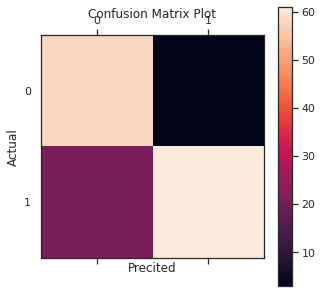

AUC: 0.935


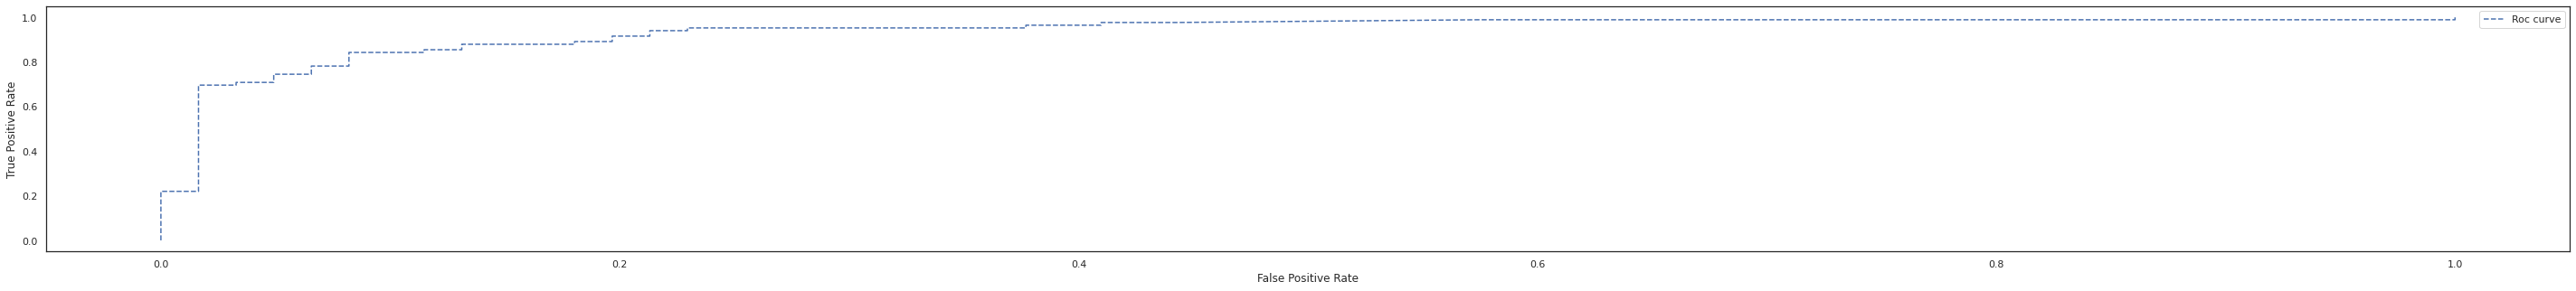

Accuracy: 0.9370629370629371
Precision: 0.974025974025974
Recall: 0.9146341463414634


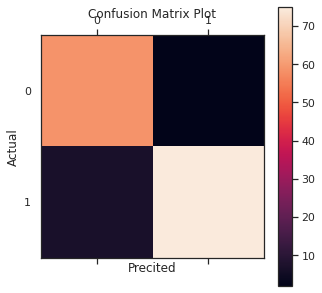

AUC: 0.975


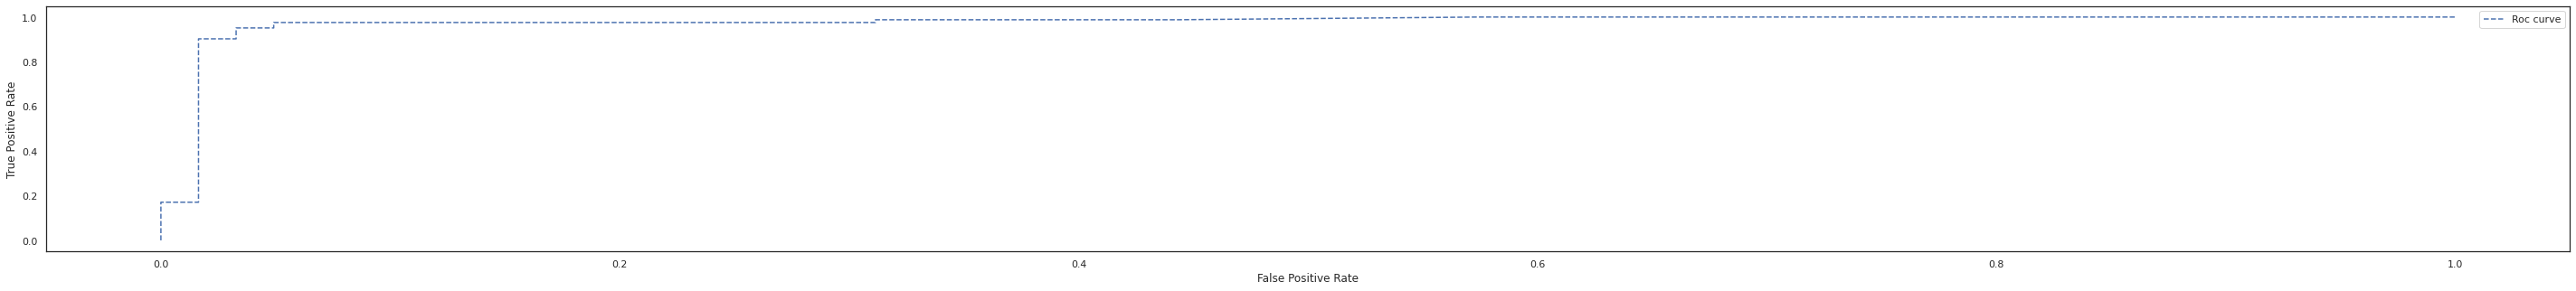

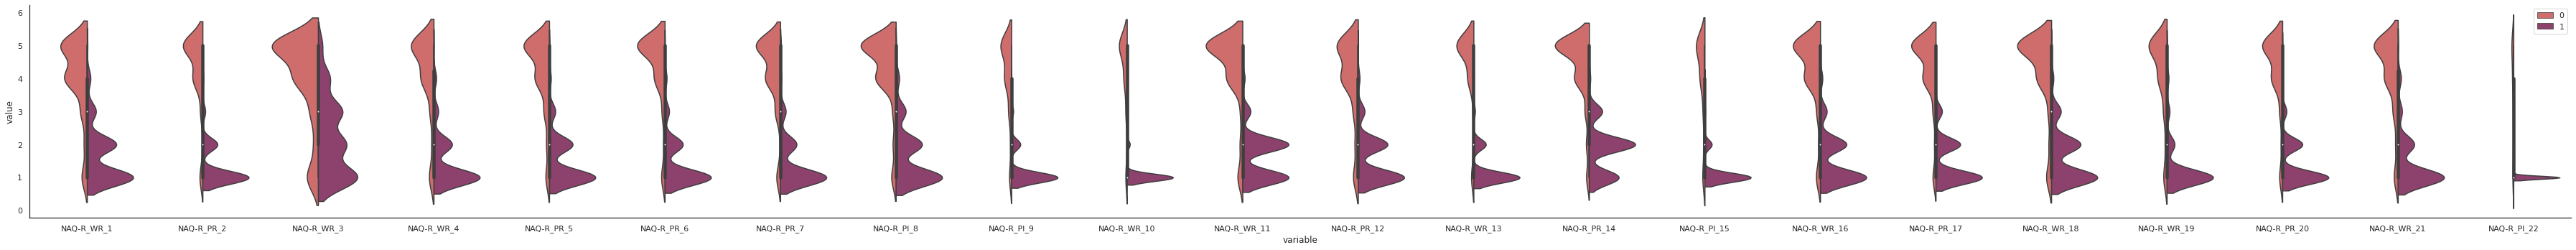

TESTING ON THE DF df_5
Accuracy for KNNis 0.8928571428571429
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.9196428571428571
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9732142857142857
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9553571428571429
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.9598214285714286
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of t

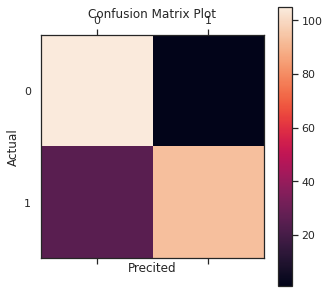

AUC: 0.973


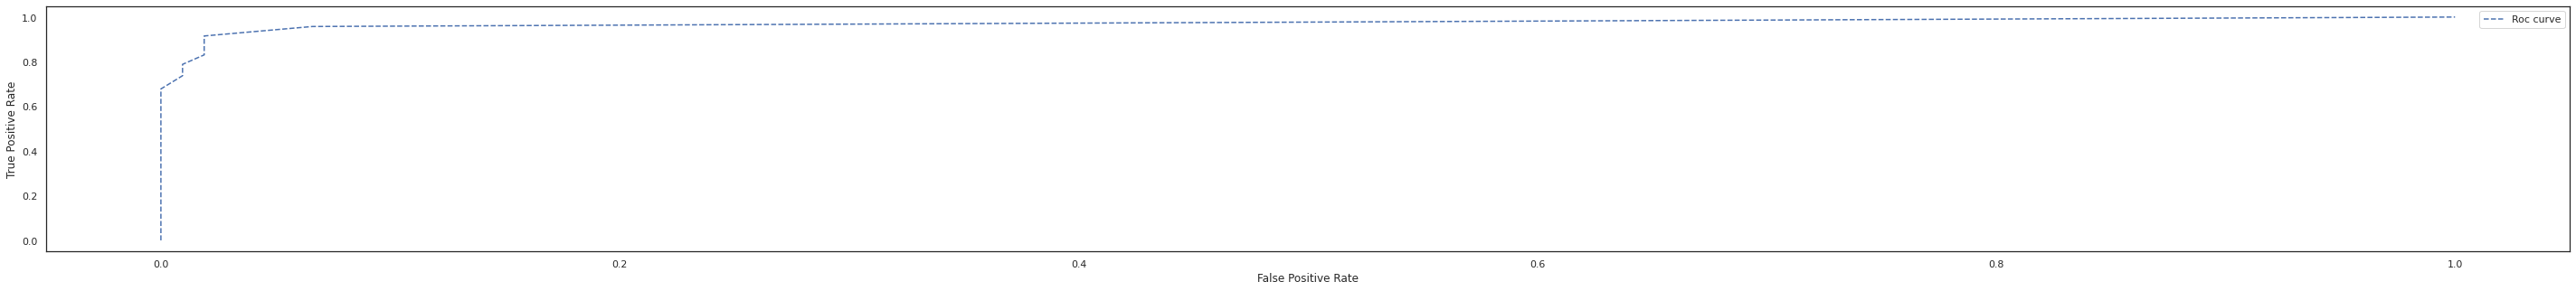

Accuracy: 0.90625
Precision: 0.9217391304347826
Recall: 0.8983050847457628


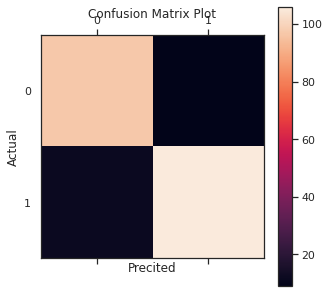

AUC: 0.932


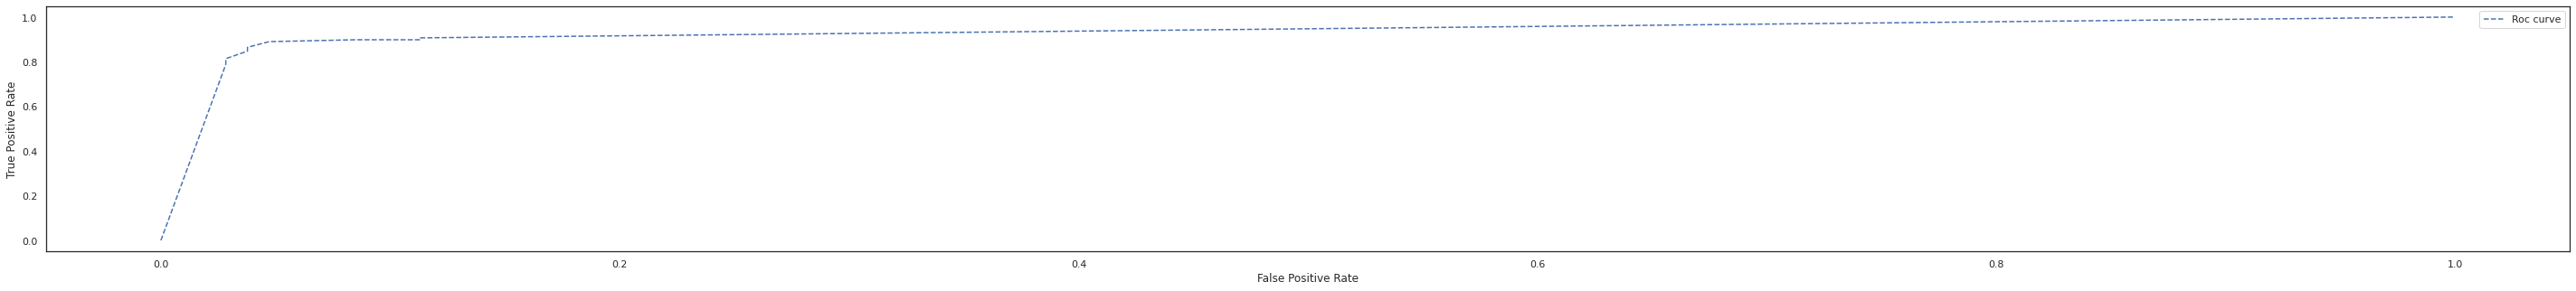

Accuracy: 0.9732142857142857
Precision: 0.9827586206896551
Recall: 0.9661016949152542


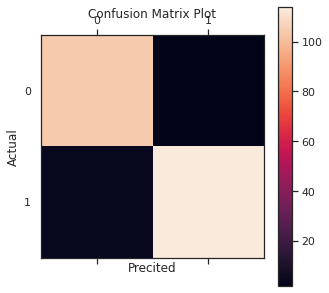

AUC: 0.997


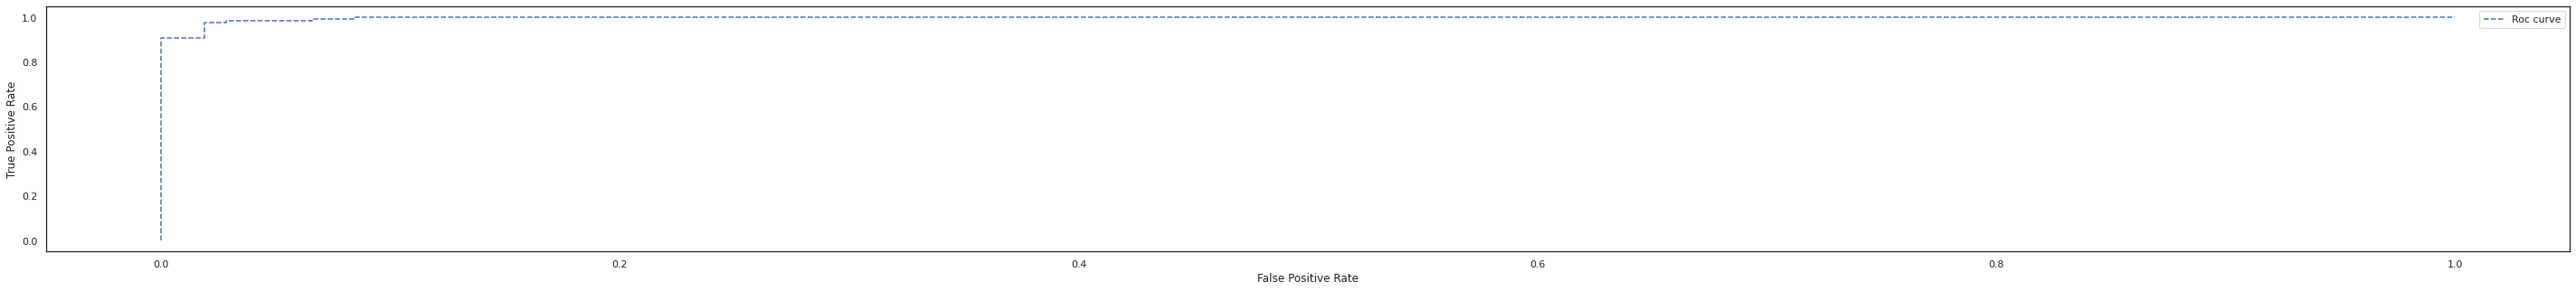

Accuracy: 0.9419642857142857
Precision: 0.981651376146789
Recall: 0.9067796610169492


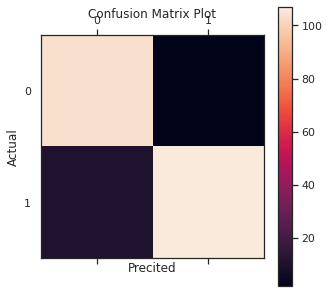

AUC: 0.987


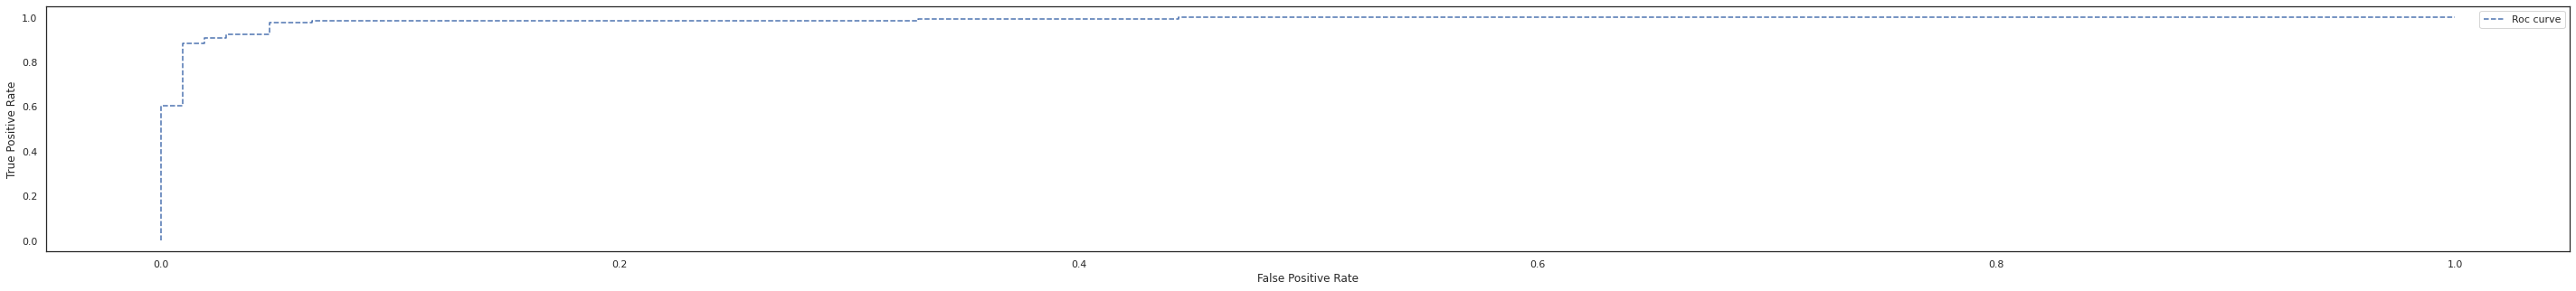

Accuracy: 0.9598214285714286
Precision: 0.9739130434782609
Recall: 0.9491525423728814


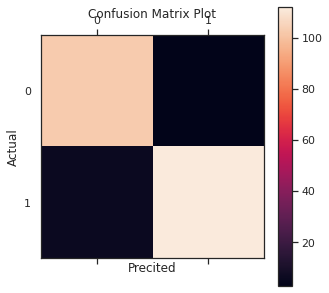

AUC: 0.998


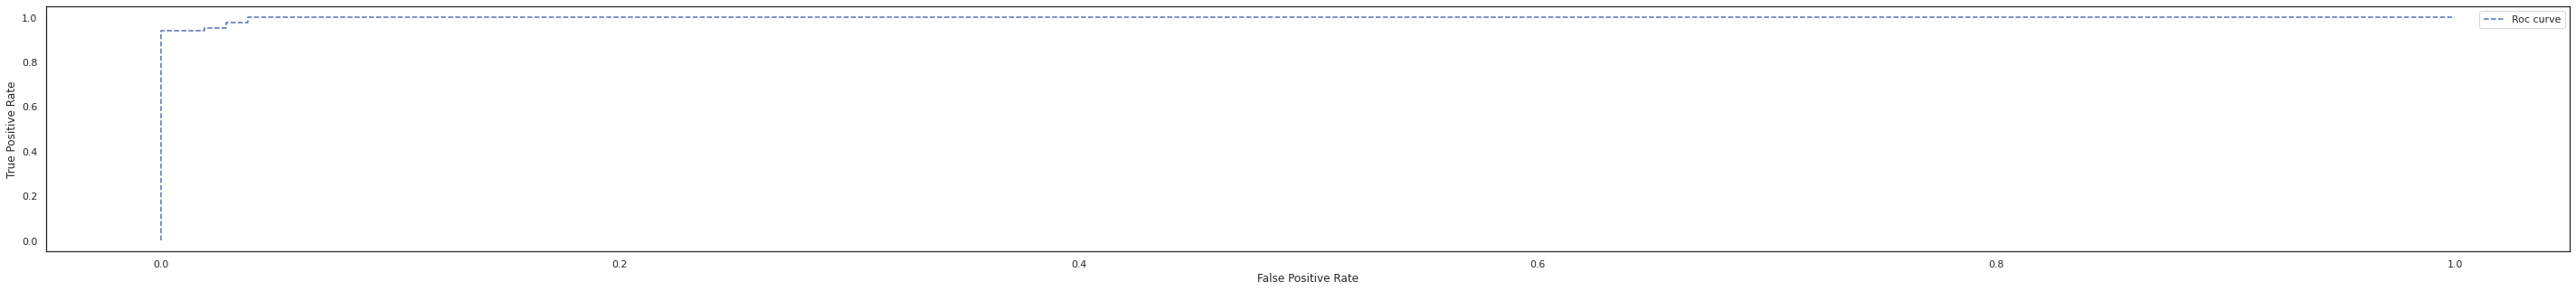

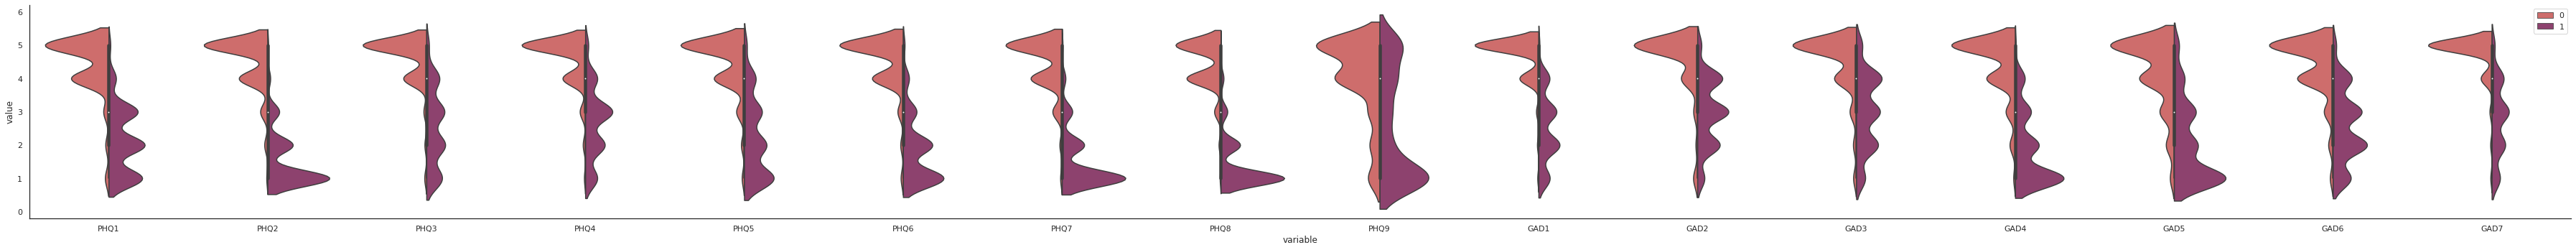

TESTING ON THE DF df_6
Accuracy for KNNis 0.8606060606060606
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.896969696969697
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9575757575757575
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9696969696969697
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.9696969696969697
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of th

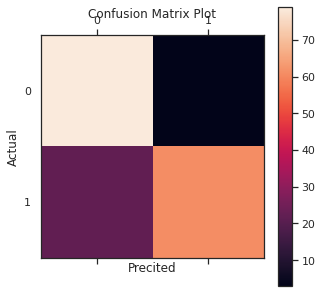

AUC: 0.949


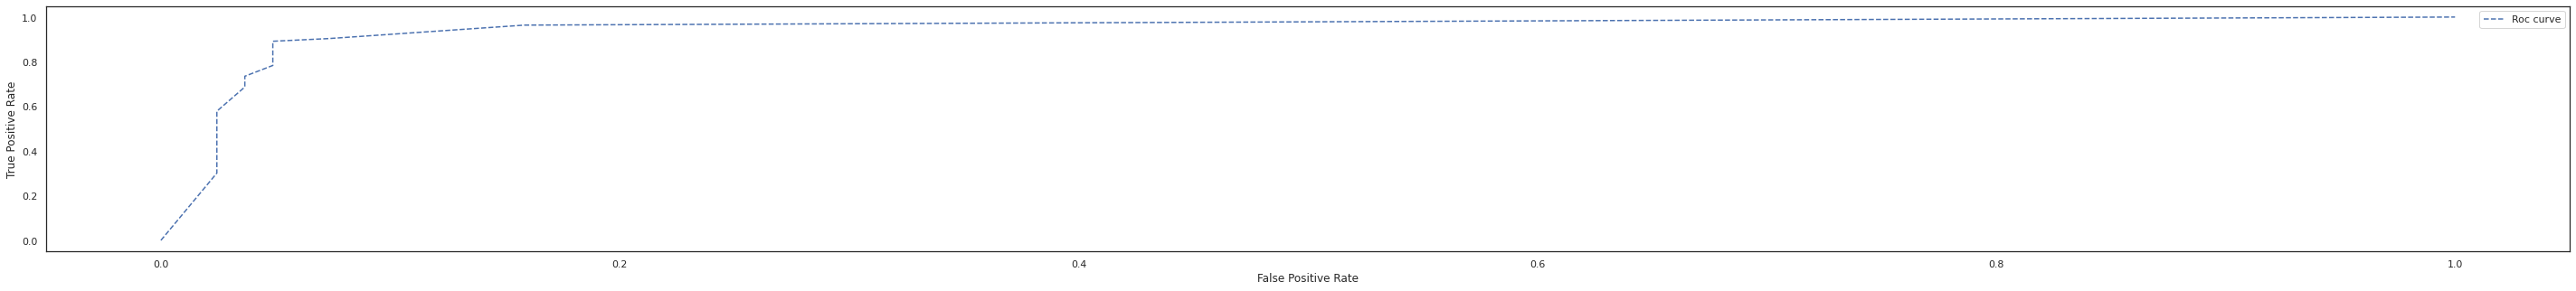

Accuracy: 0.8727272727272727
Precision: 0.8780487804878049
Recall: 0.8674698795180723


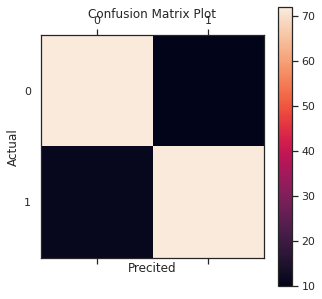

AUC: 0.944


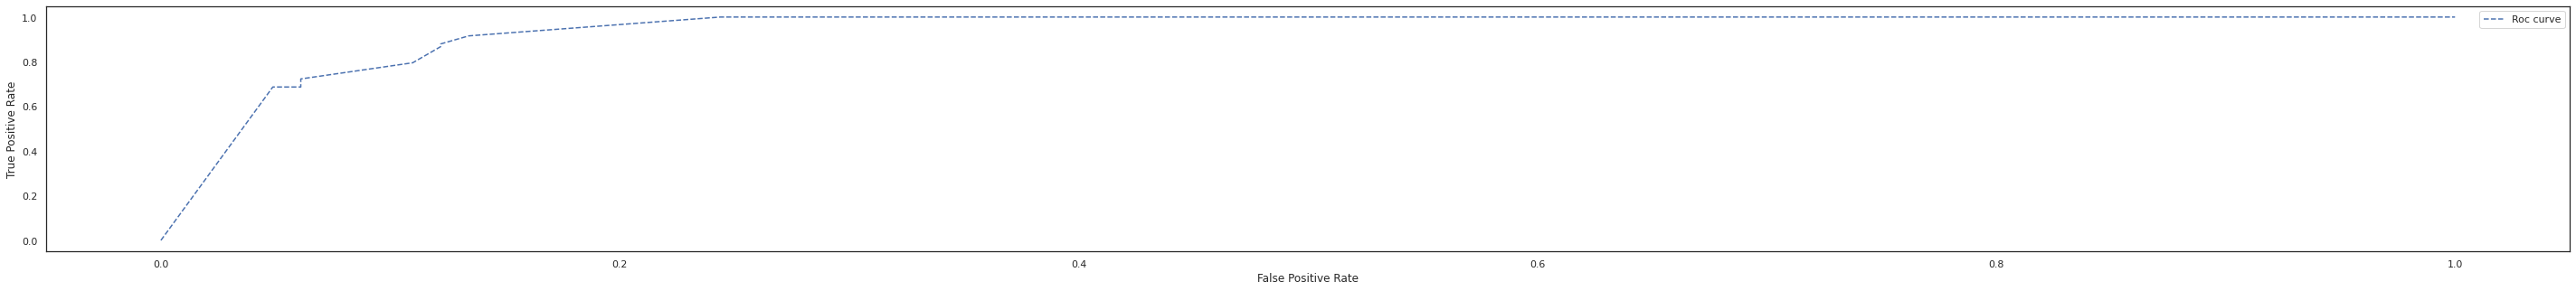

Accuracy: 0.9575757575757575
Precision: 0.9222222222222223
Recall: 1.0


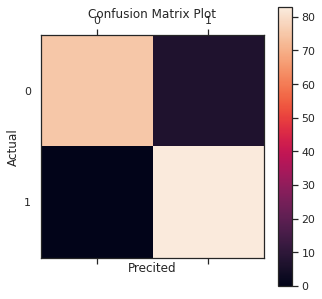

AUC: 0.982


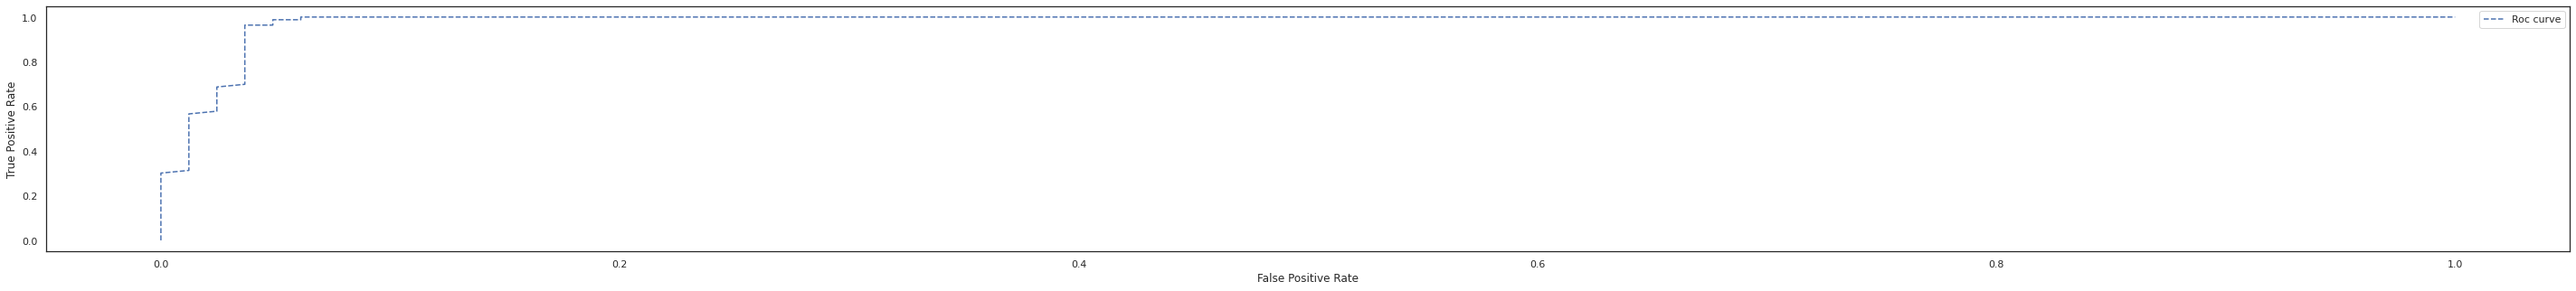

Accuracy: 0.9636363636363636
Precision: 0.963855421686747
Recall: 0.963855421686747


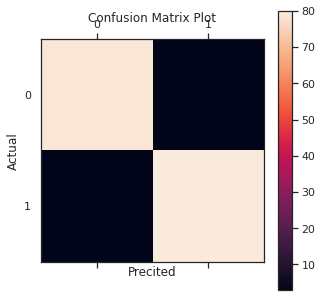

AUC: 0.987


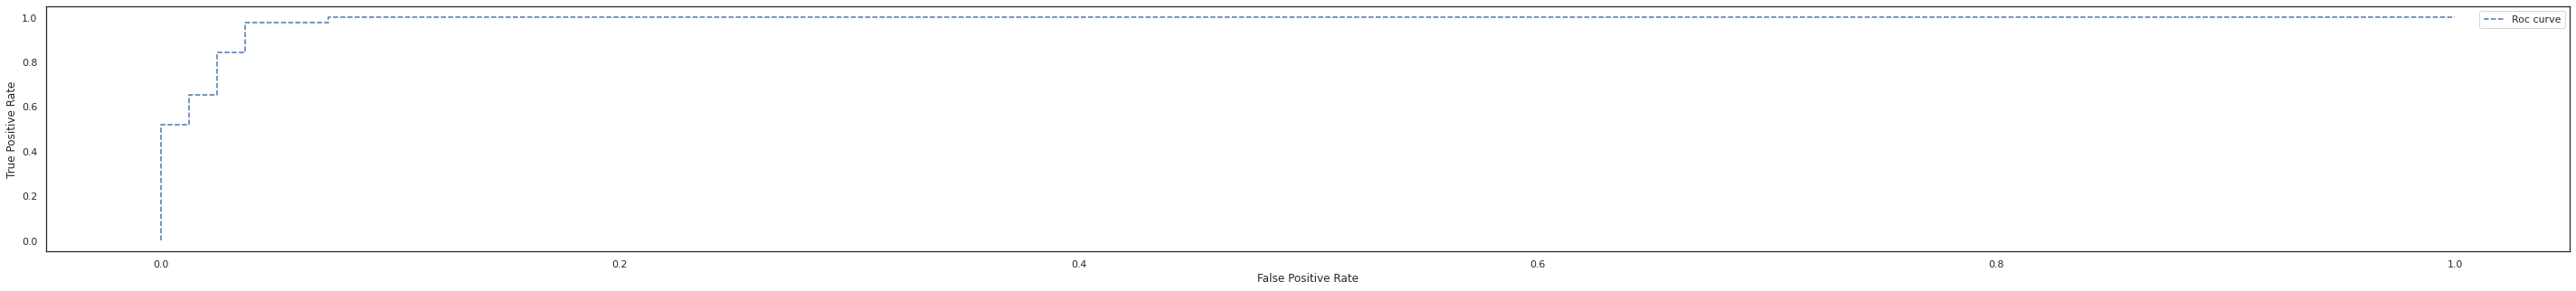

Accuracy: 0.9636363636363636
Precision: 0.9425287356321839
Recall: 0.9879518072289156


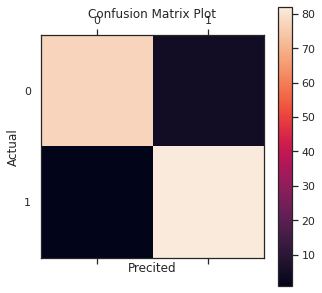

AUC: 0.985


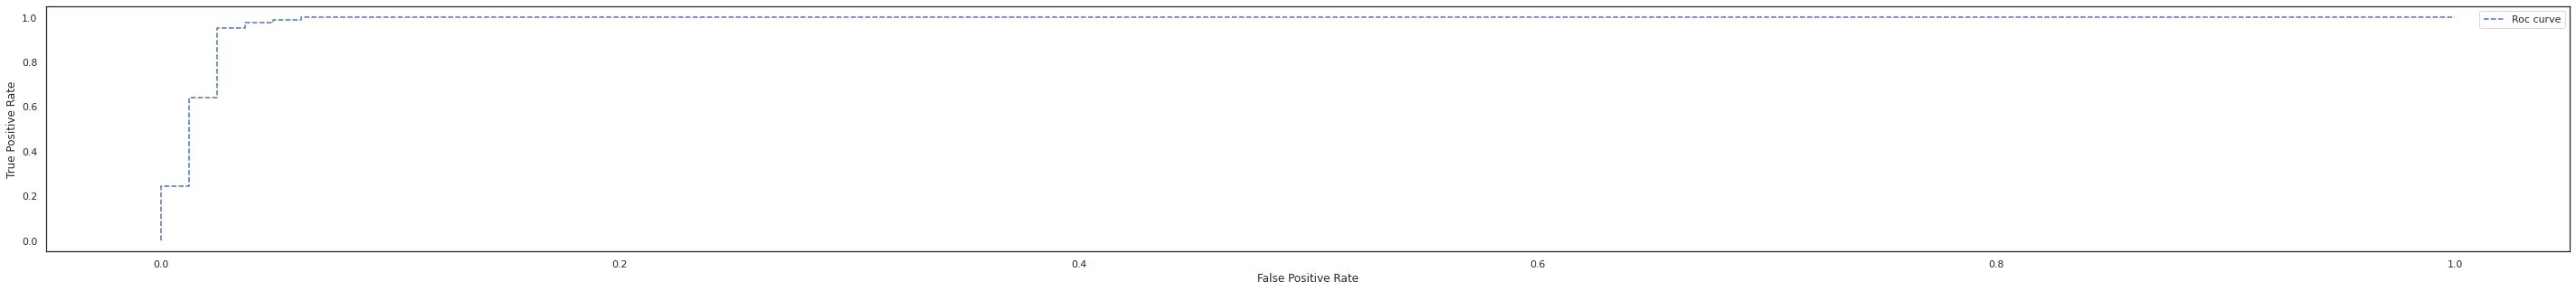

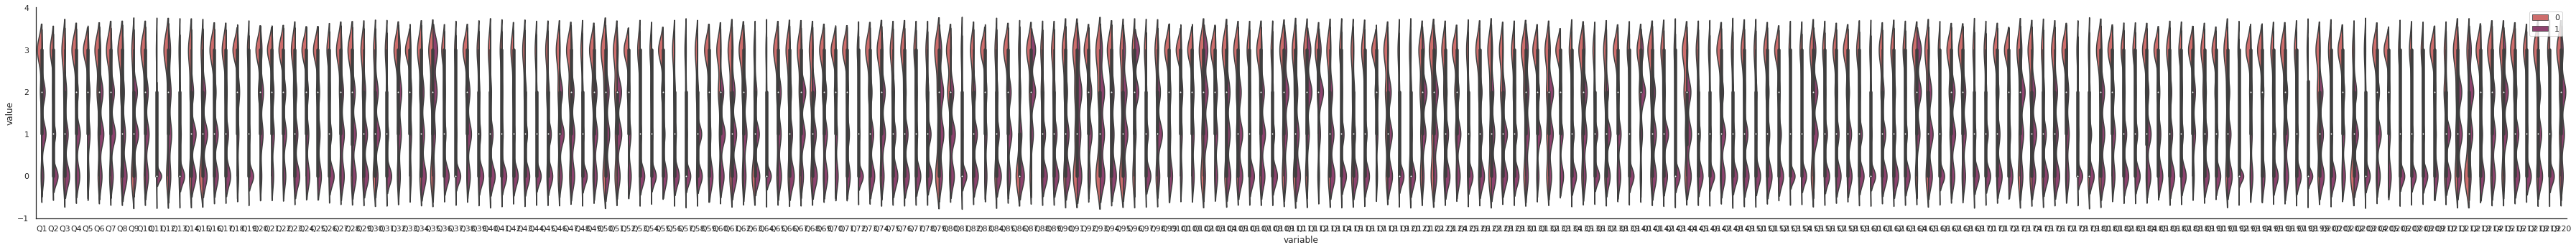

TESTING ON THE DF df_7
Accuracy for KNNis 0.8365384615384616
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.9278846153846154
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9567307692307693
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9230769230769231
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.9471153846153846
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of t

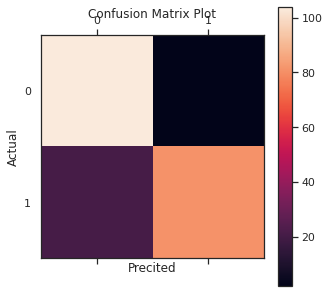

AUC: 0.949


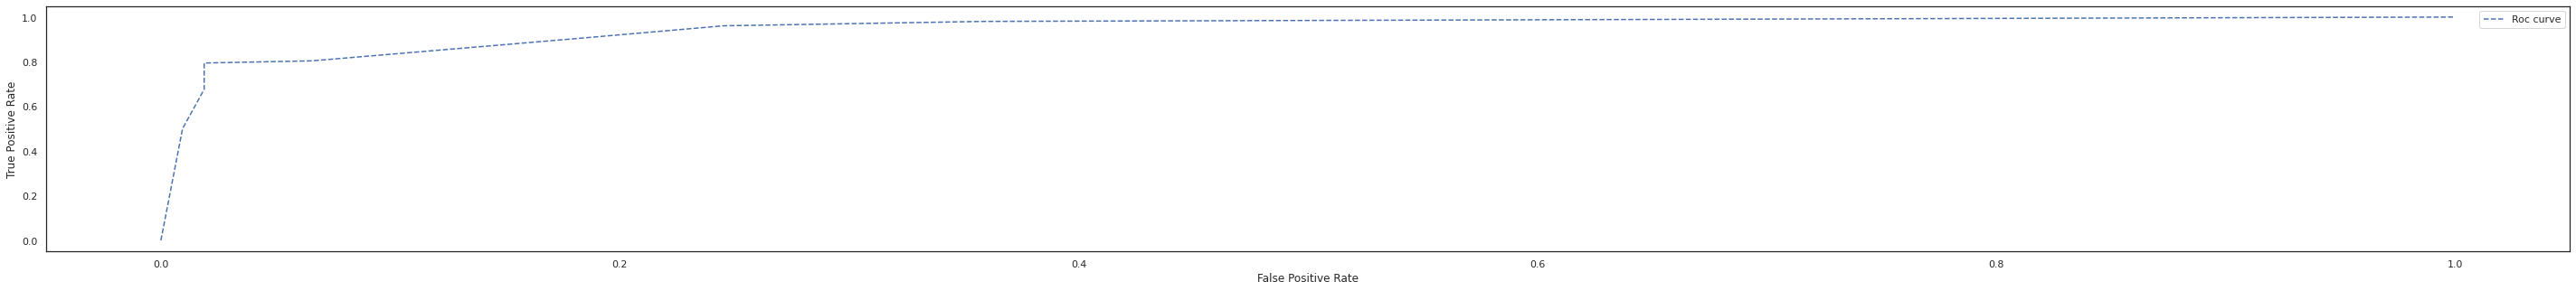

Accuracy: 0.9182692307692307
Precision: 0.912621359223301
Recall: 0.9215686274509803


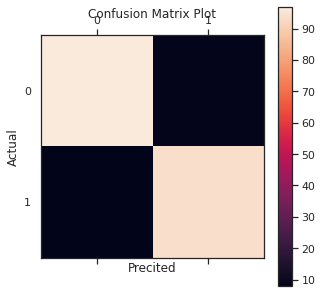

AUC: 0.967


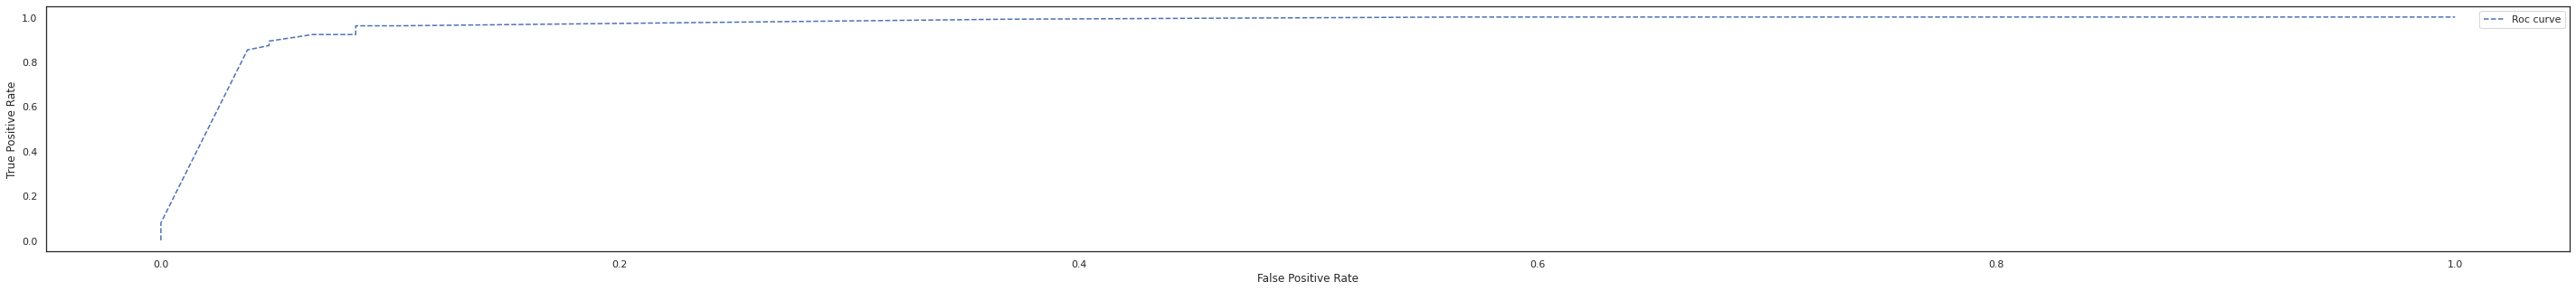

Accuracy: 0.9567307692307693
Precision: 0.9345794392523364
Recall: 0.9803921568627451


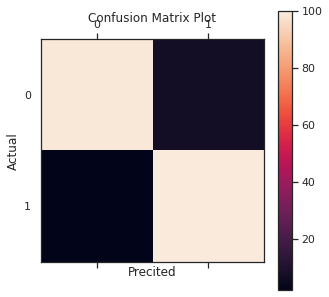

AUC: 0.985


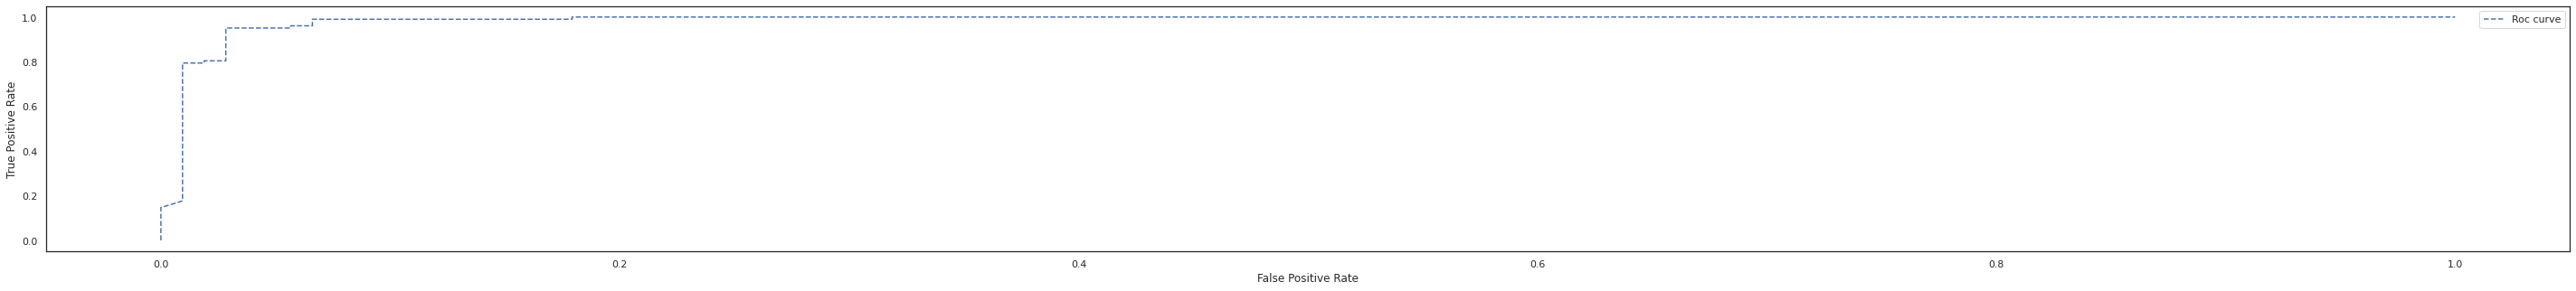

Accuracy: 0.8990384615384616
Precision: 0.9090909090909091
Recall: 0.8823529411764706


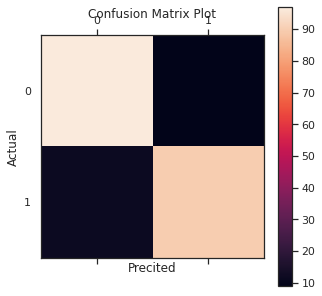

AUC: 0.960


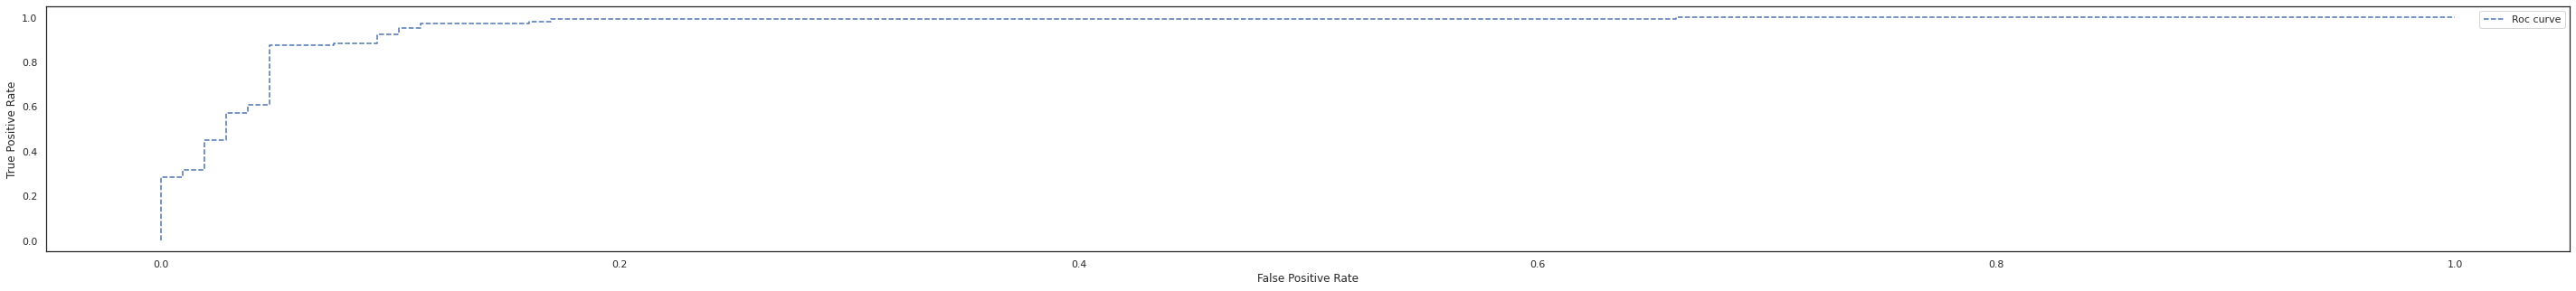

Accuracy: 0.9567307692307693
Precision: 0.9345794392523364
Recall: 0.9803921568627451


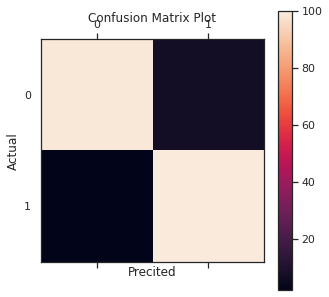

AUC: 0.985


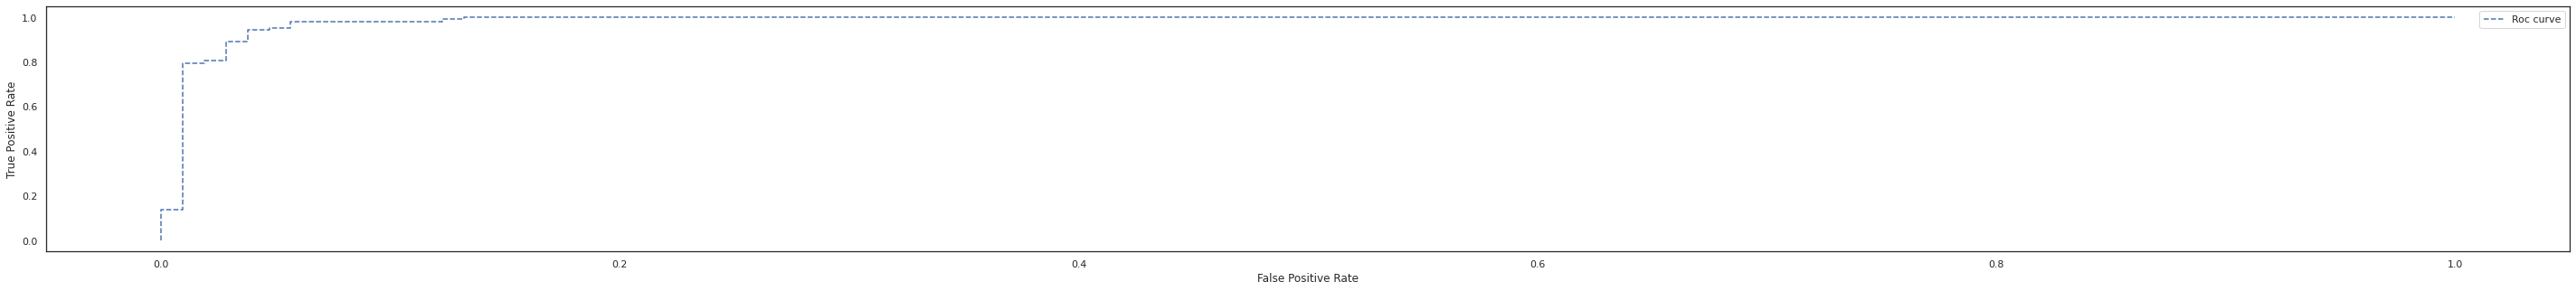

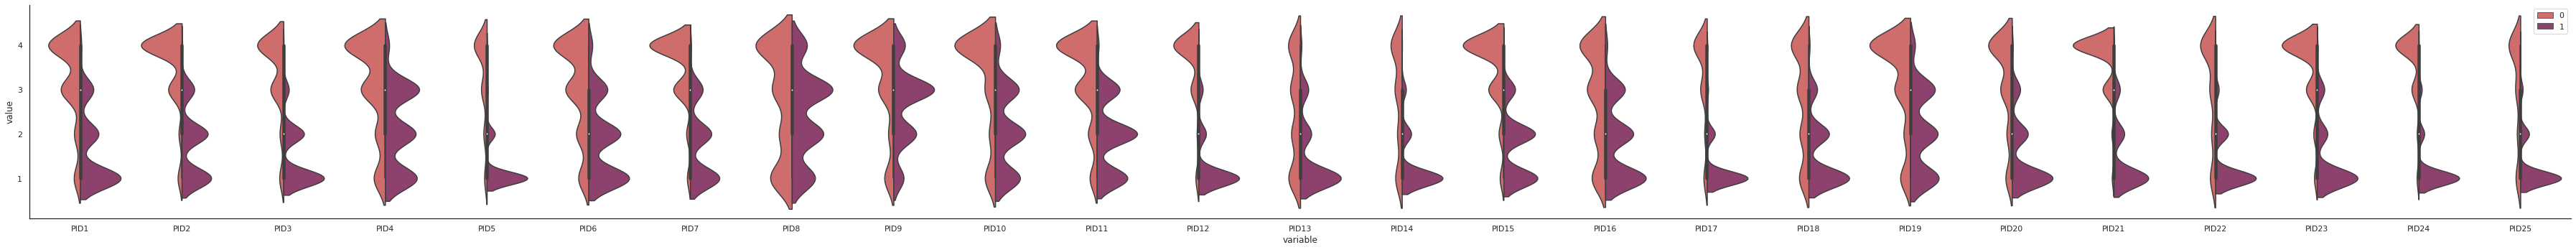

TESTING ON THE DF df_8
Accuracy for KNNis 0.8602941176470589
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.875
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8897058823529411
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9044117647058824
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8970588235294118
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of the permutatio

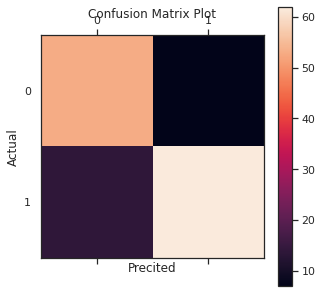

AUC: 0.920


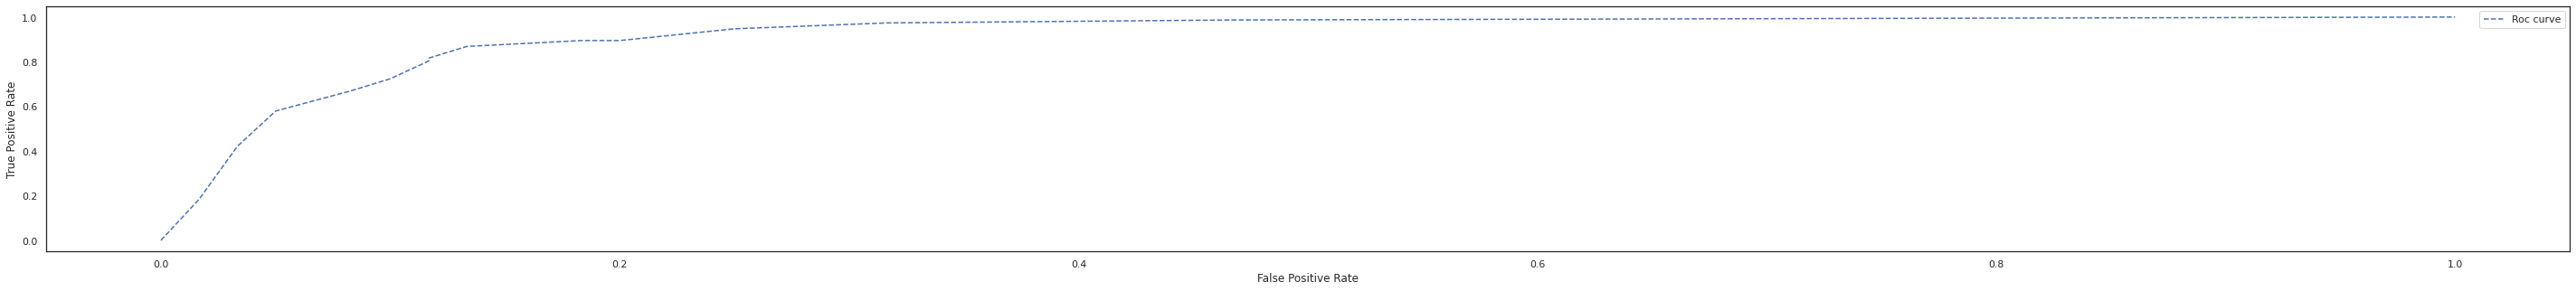

Accuracy: 0.8823529411764706
Precision: 0.8846153846153846
Recall: 0.9078947368421053


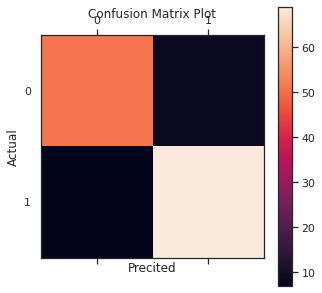

AUC: 0.888


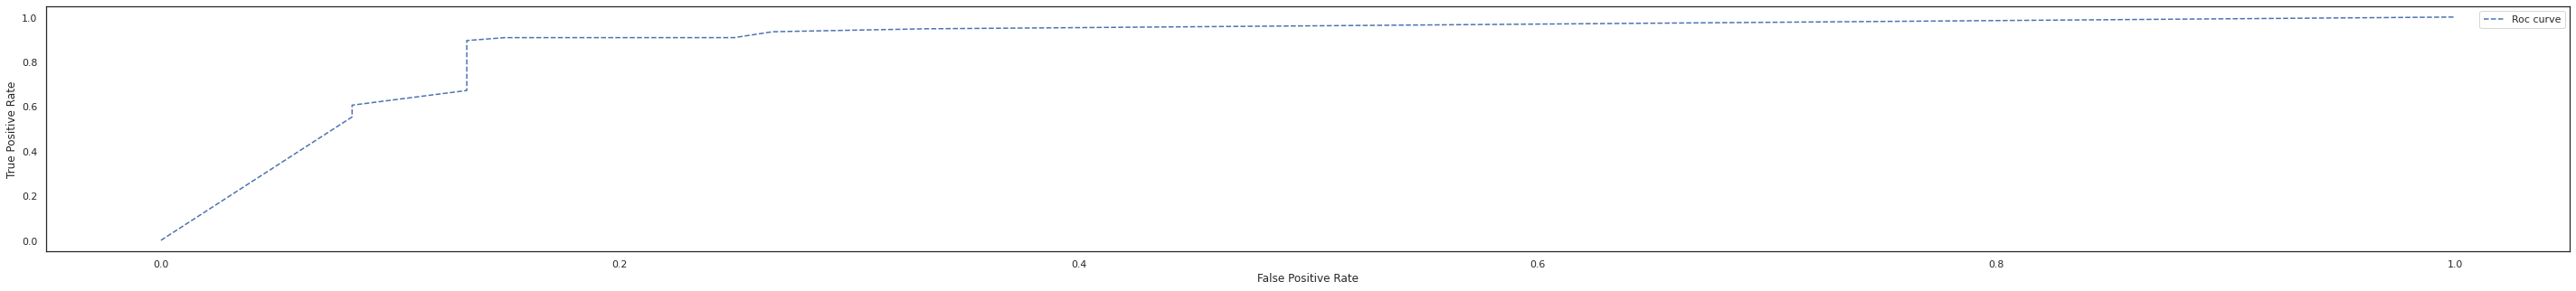

Accuracy: 0.8897058823529411
Precision: 0.8860759493670886
Recall: 0.9210526315789473


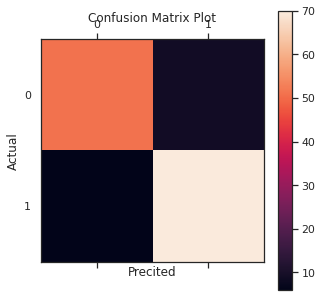

AUC: 0.966


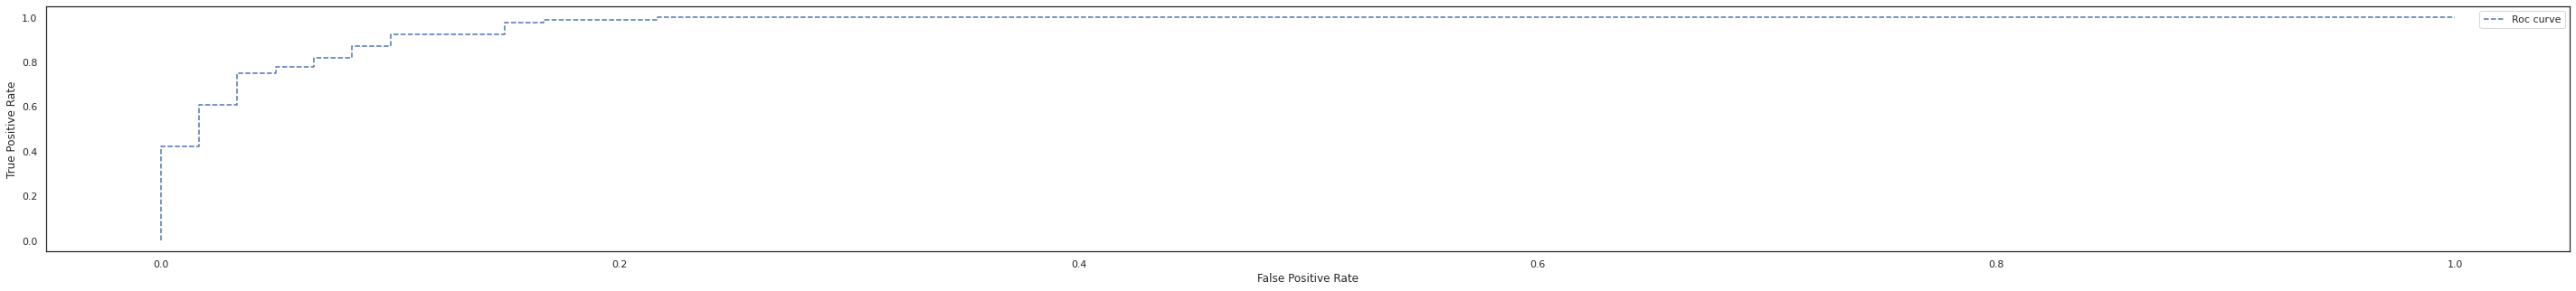

Accuracy: 0.9044117647058824
Precision: 0.8987341772151899
Recall: 0.9342105263157895


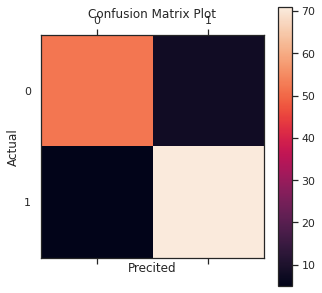

AUC: 0.957


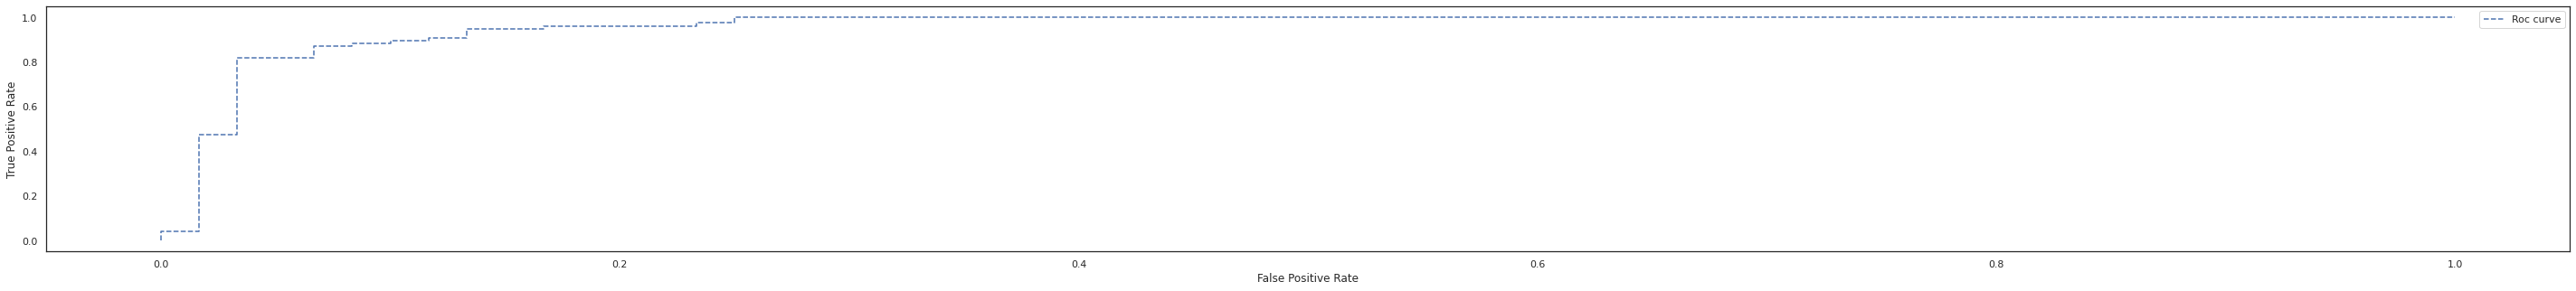

Accuracy: 0.8014705882352942
Precision: 0.8356164383561644
Recall: 0.8026315789473685


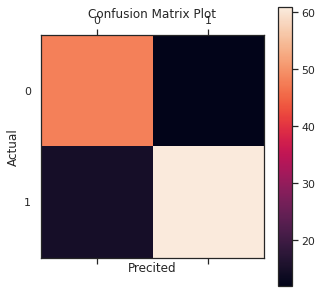

AUC: 0.889


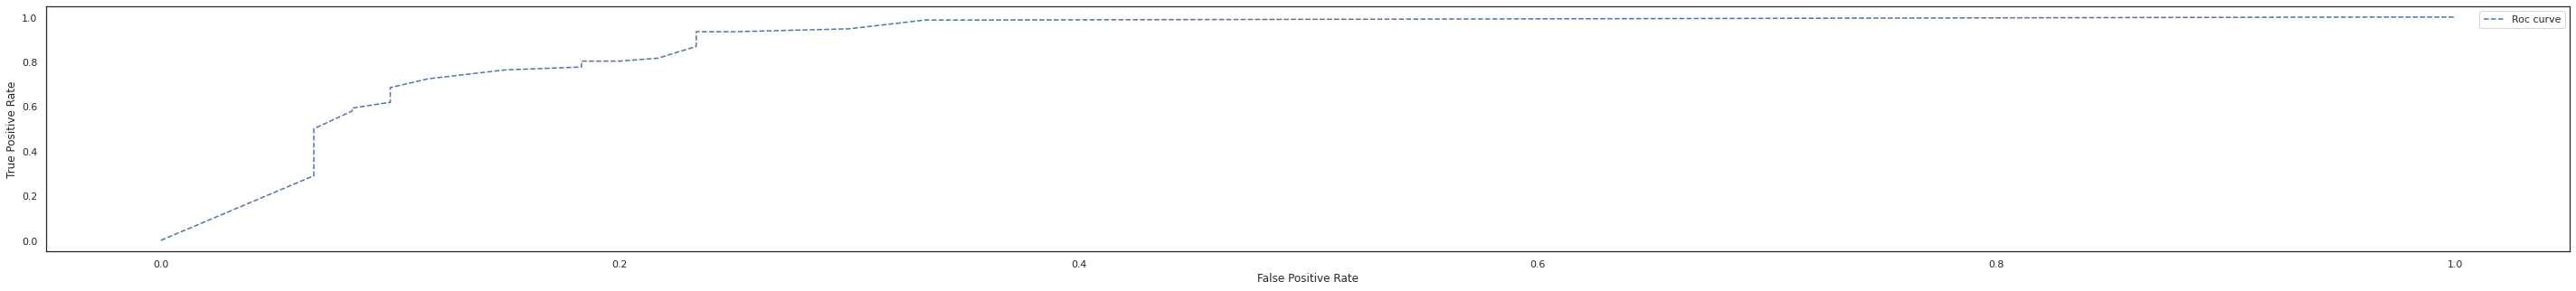

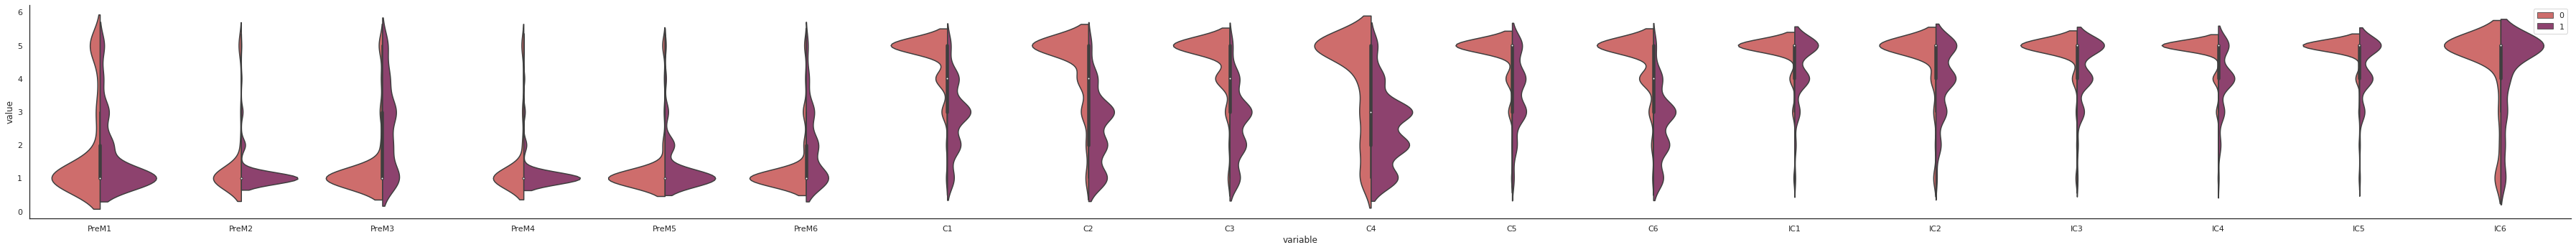

TESTING ON THE DF df_9
Accuracy for KNNis 0.6666666666666666
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.7777777777777778
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9444444444444444
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9305555555555556
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.9166666666666666
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of t

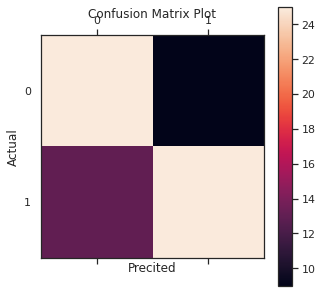

AUC: 0.766


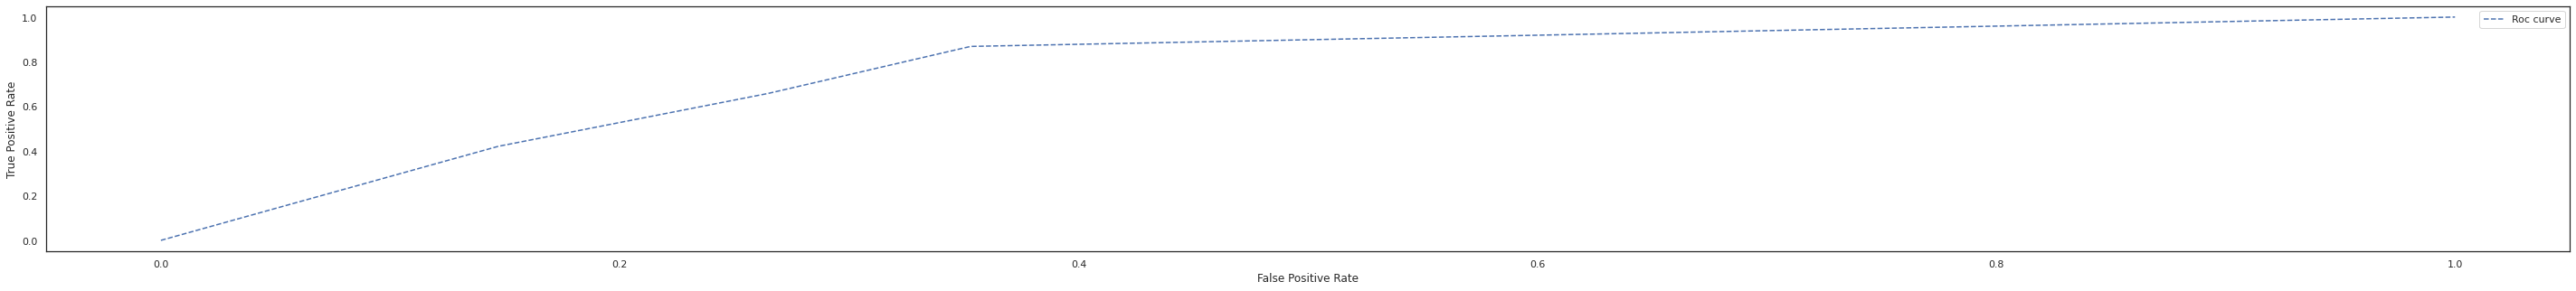

Accuracy: 0.7638888888888888
Precision: 0.8
Recall: 0.7368421052631579


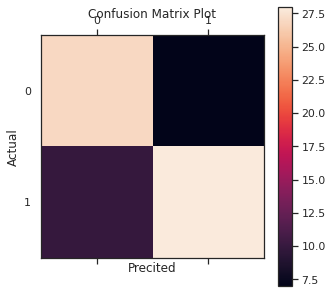

AUC: 0.800


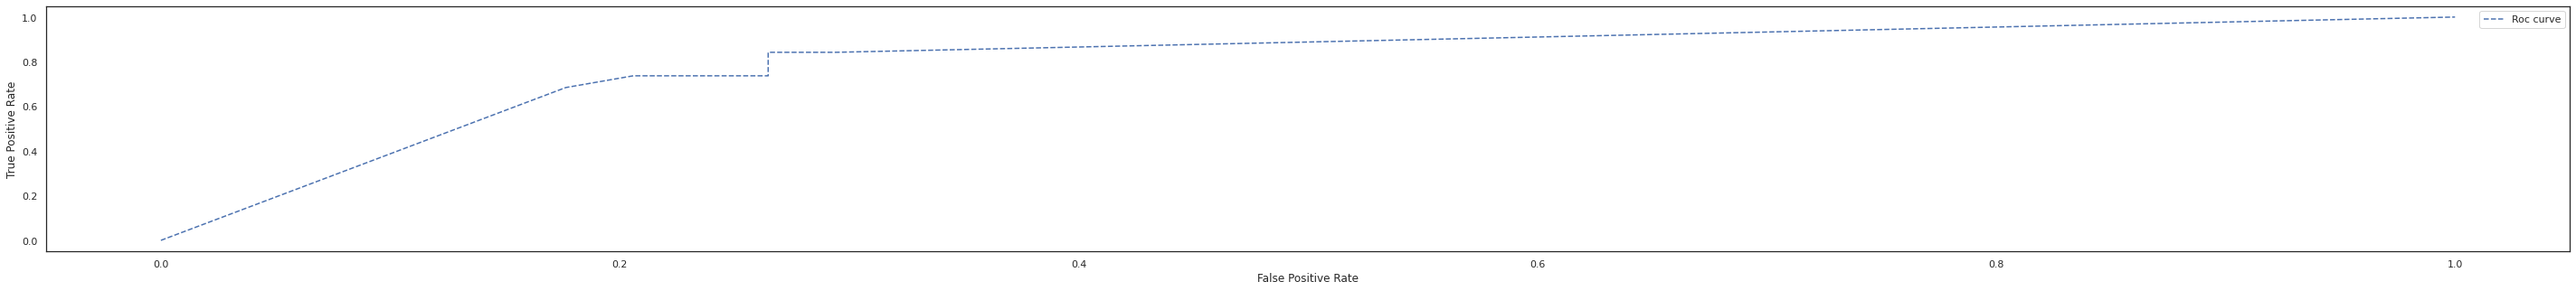

Accuracy: 0.9444444444444444
Precision: 0.9047619047619048
Recall: 1.0


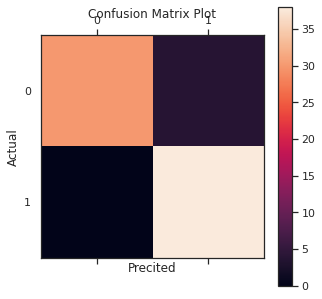

AUC: 0.944


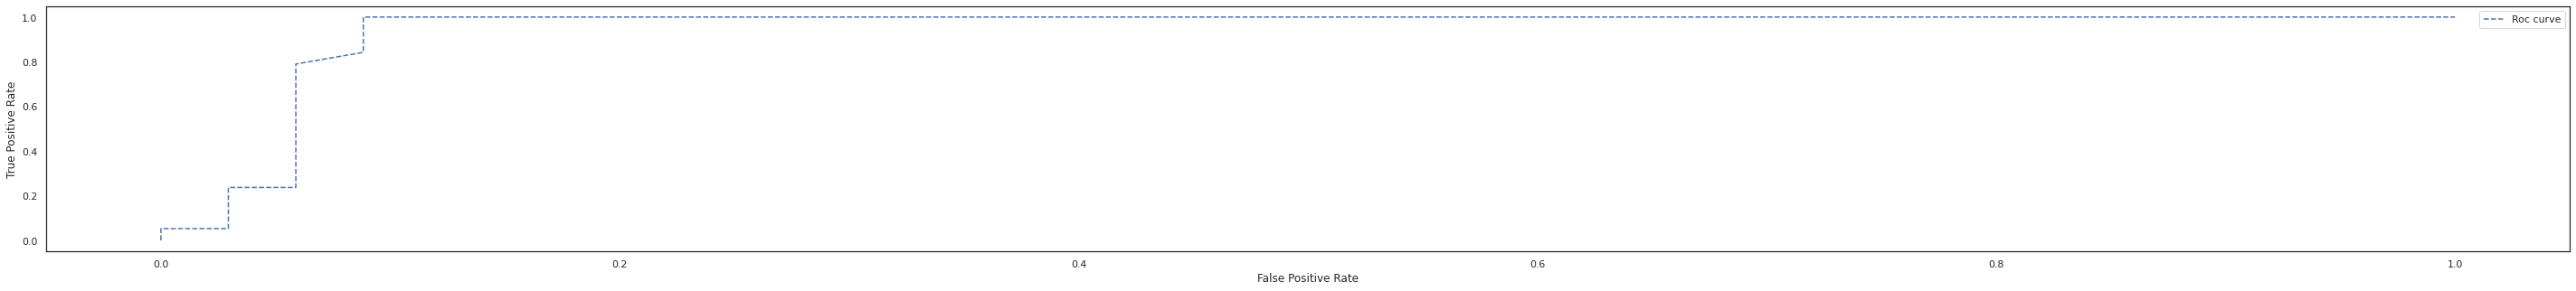

Accuracy: 0.8611111111111112
Precision: 0.9117647058823529
Recall: 0.8157894736842105


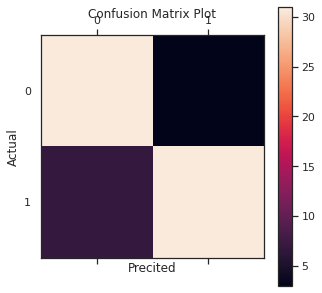

AUC: 0.926


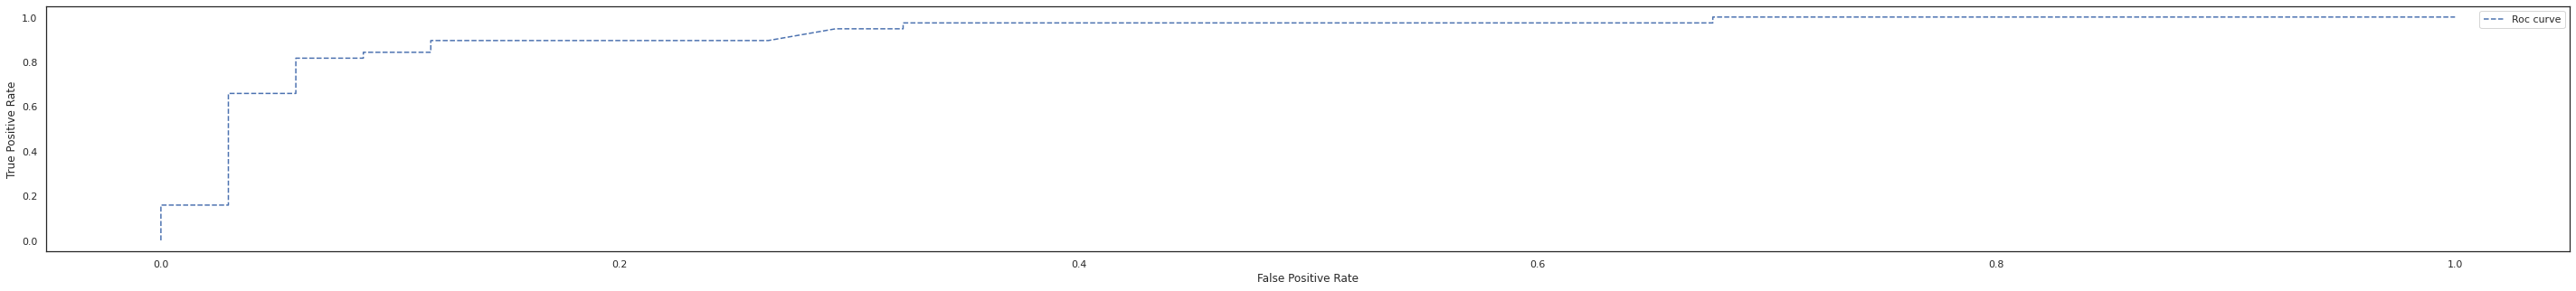

Accuracy: 0.9027777777777778
Precision: 0.8974358974358975
Recall: 0.9210526315789473


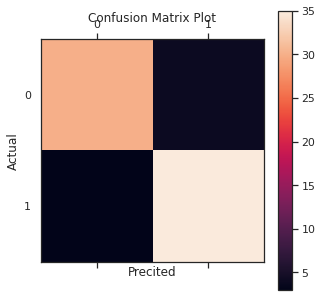

AUC: 0.943


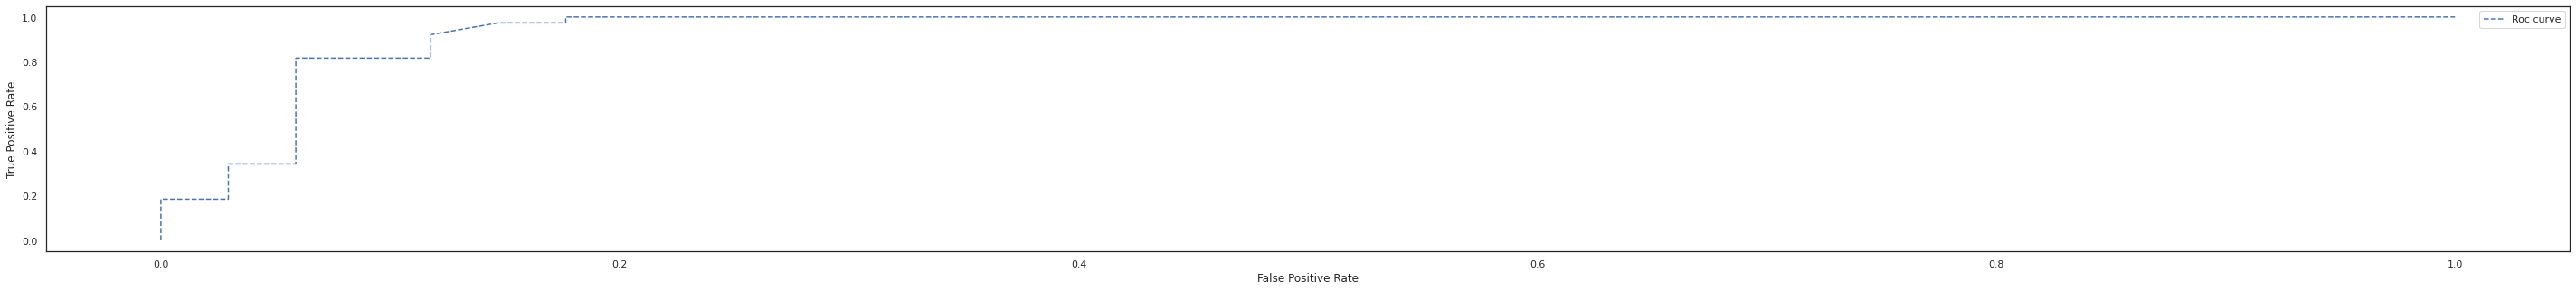

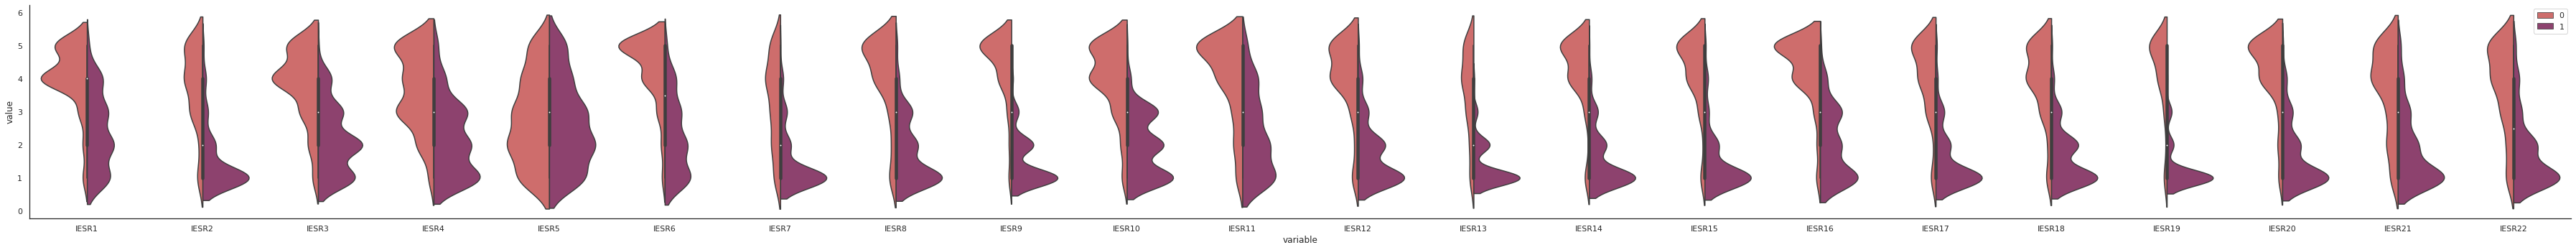

TESTING ON THE DF df_11
Accuracy for KNNis 0.7222222222222222
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.7070707070707071
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.7929292929292929
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.7272727272727273
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.7575757575757576
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of 

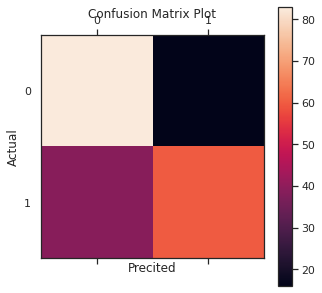

AUC: 0.788


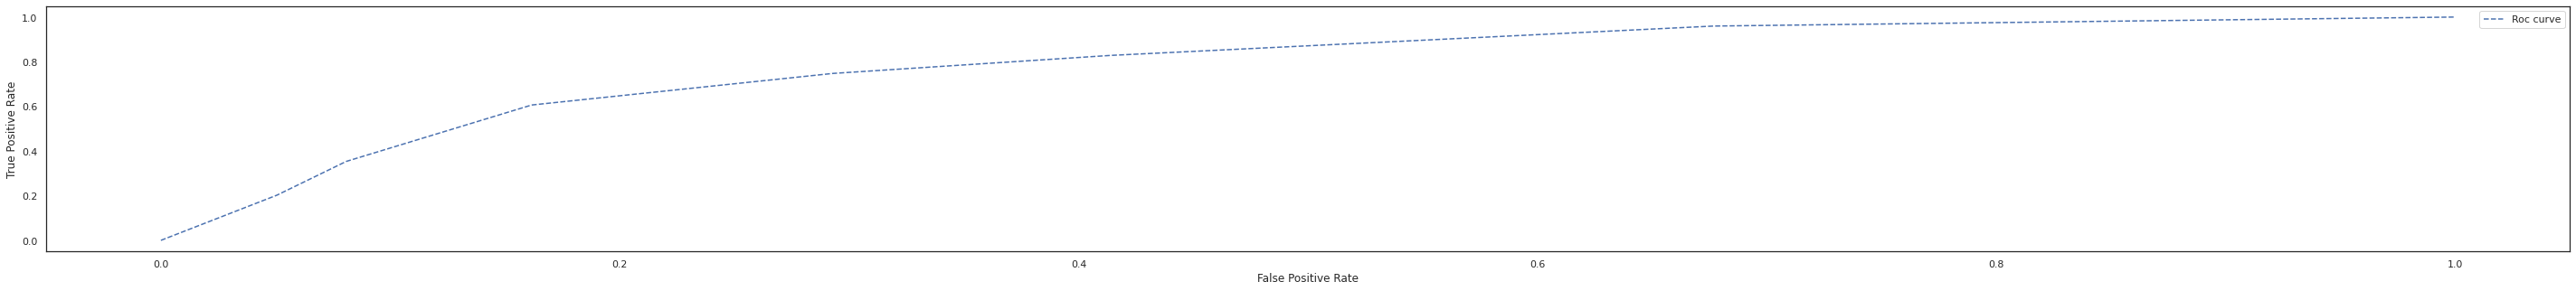

Accuracy: 0.7272727272727273
Precision: 0.7368421052631579
Recall: 0.7070707070707071


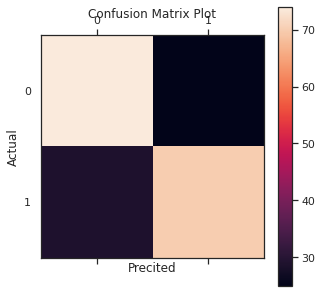

AUC: 0.796


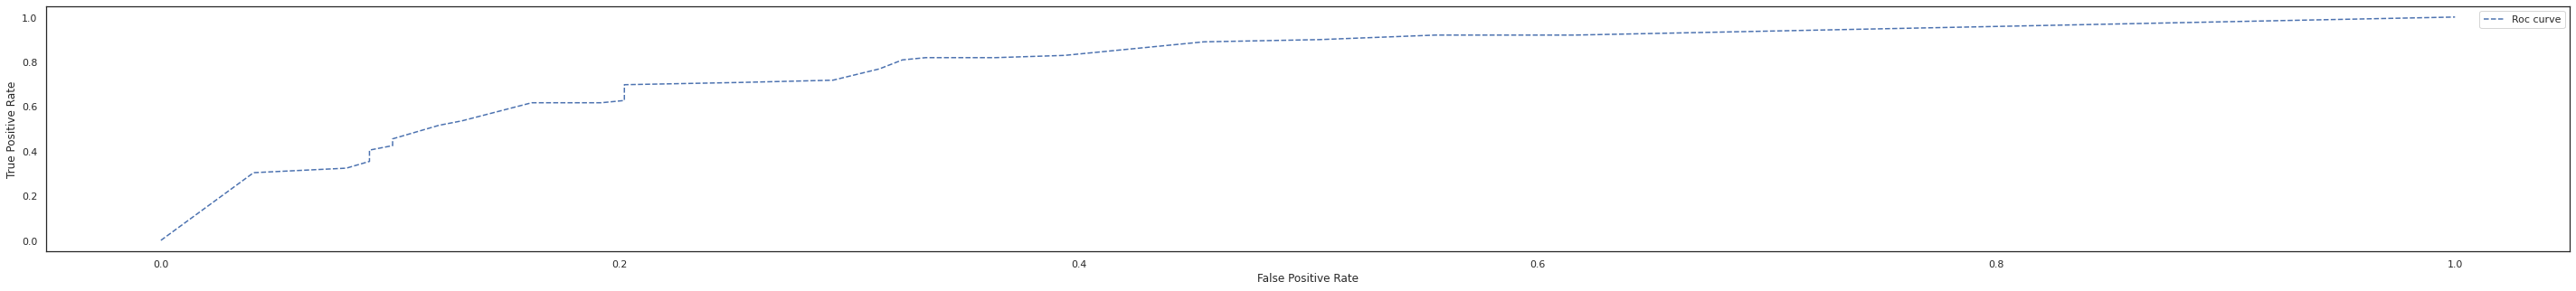

Accuracy: 0.803030303030303
Precision: 0.8125
Recall: 0.7878787878787878


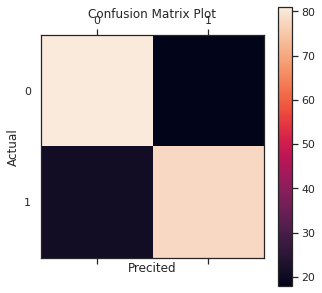

AUC: 0.863


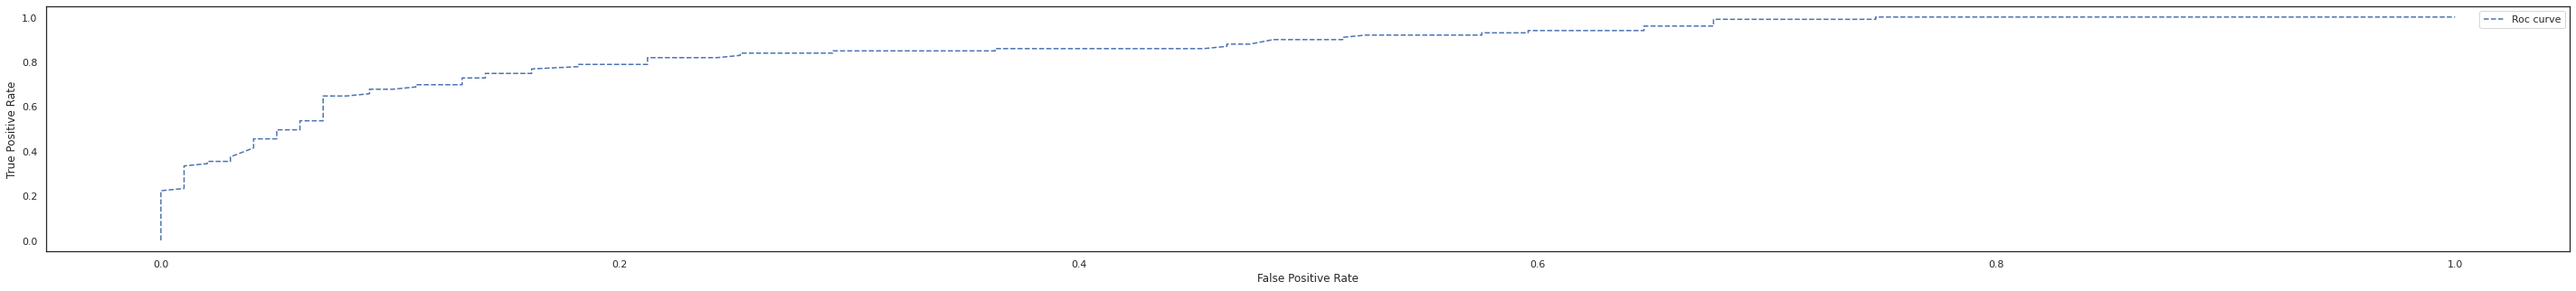

Accuracy: 0.6767676767676768
Precision: 0.6296296296296297
Recall: 0.8585858585858586


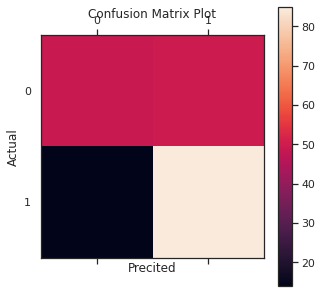

AUC: 0.769


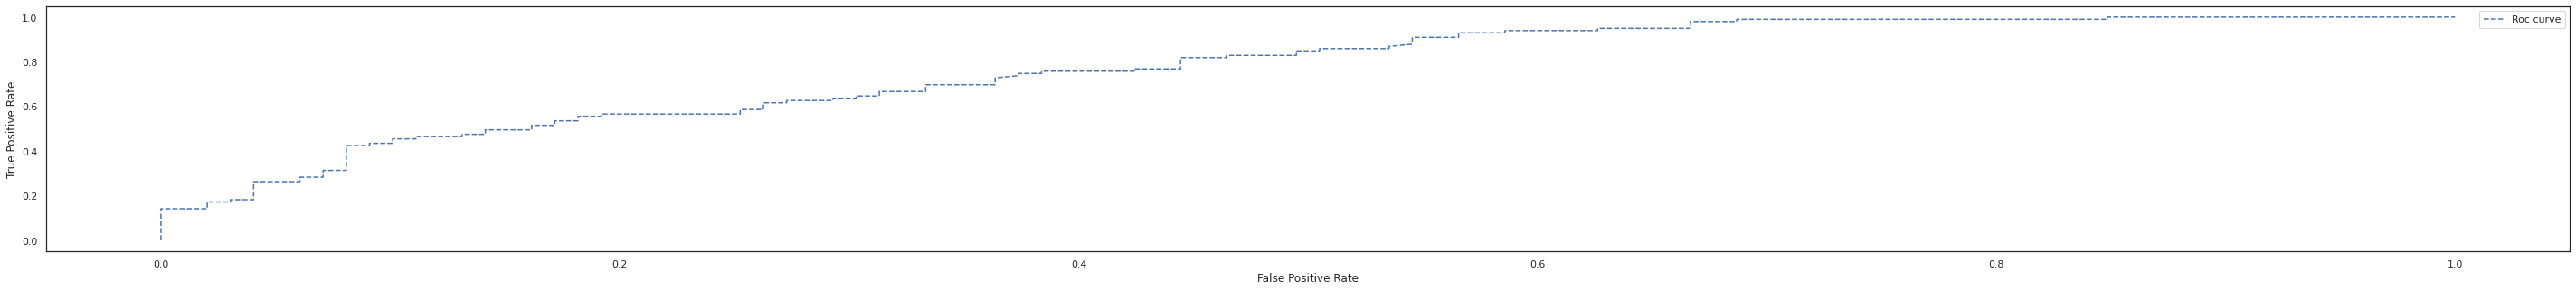

Accuracy: 0.7171717171717171
Precision: 0.7362637362637363
Recall: 0.6767676767676768


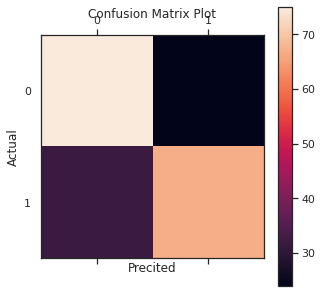

AUC: 0.797


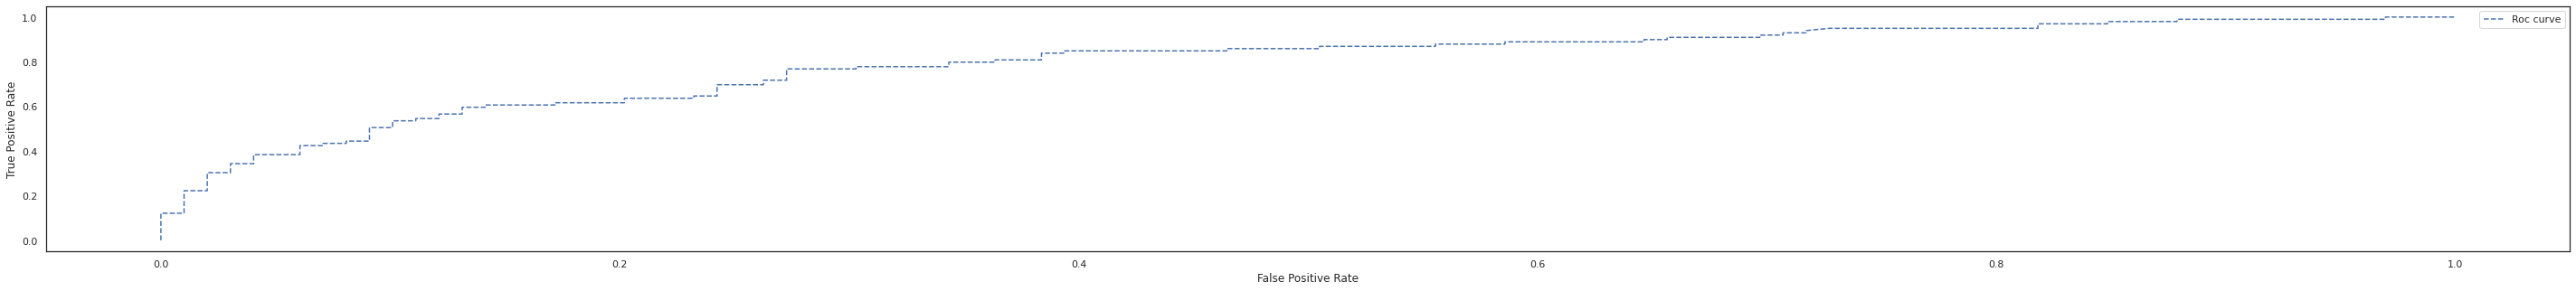

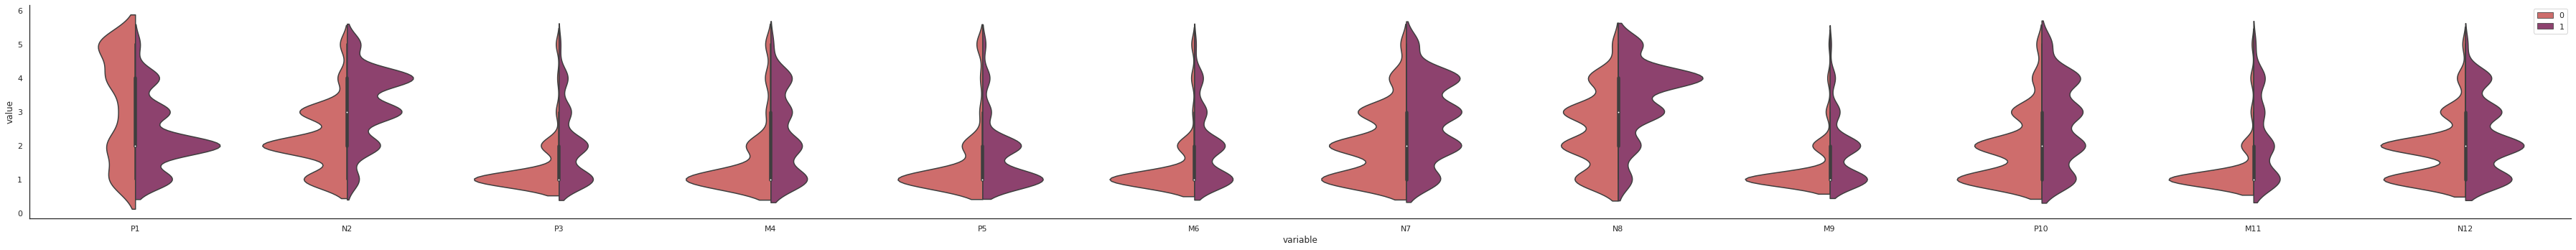

TESTING ON THE DF df_12
Accuracy for KNNis 0.7
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.7777777777777778
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.7555555555555555
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.7444444444444445
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.7444444444444445
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of the permutation

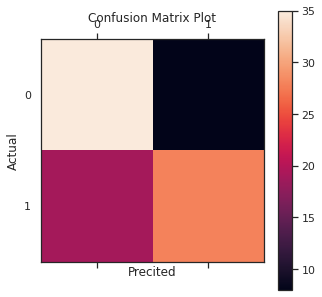

AUC: 0.722


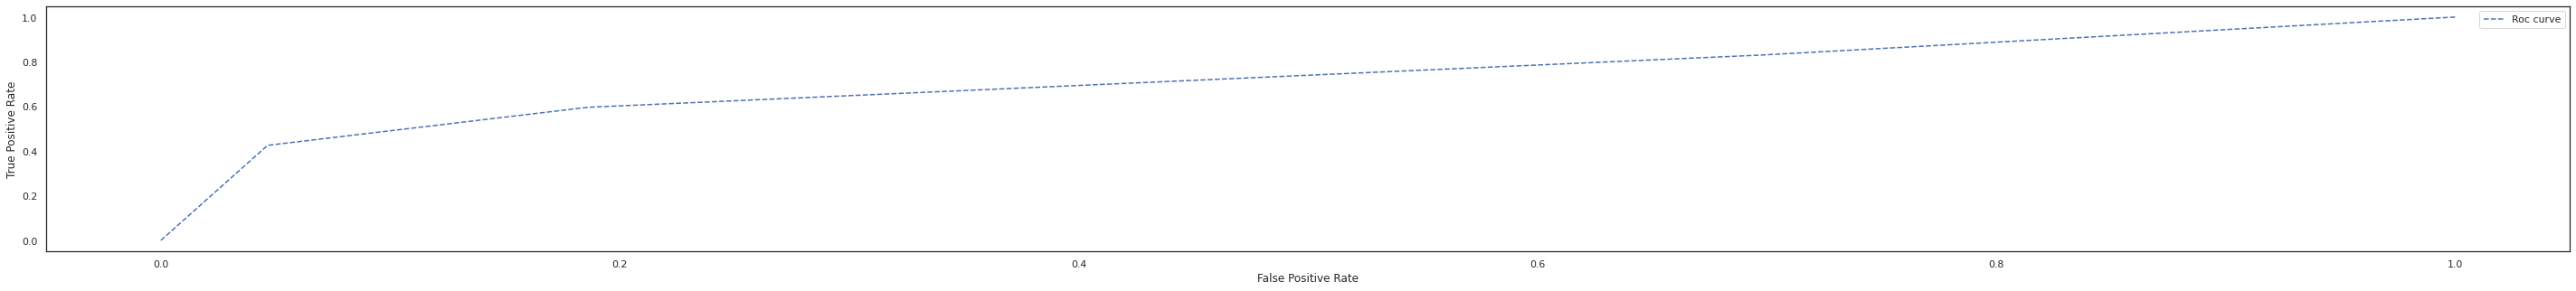

Accuracy: 0.7444444444444445
Precision: 0.7857142857142857
Recall: 0.7021276595744681


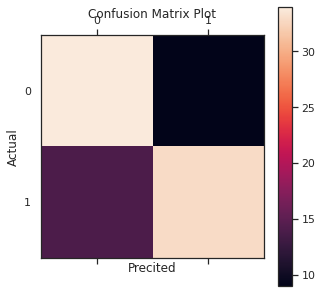

AUC: 0.825


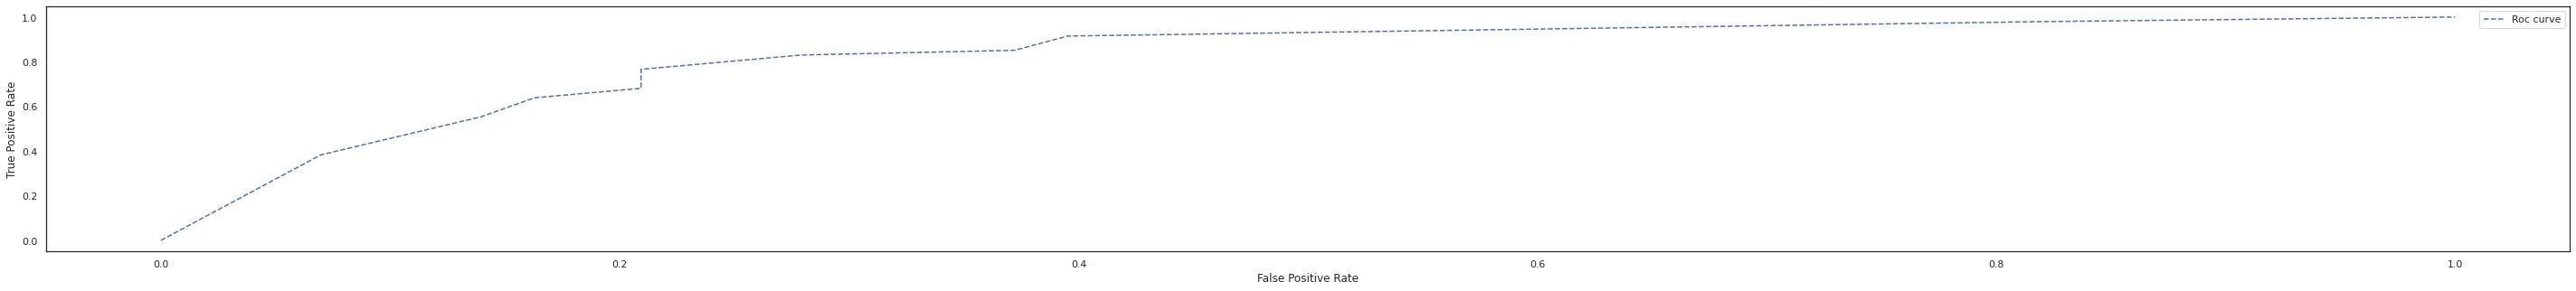

Accuracy: 0.7666666666666667
Precision: 0.7708333333333334
Recall: 0.7872340425531915


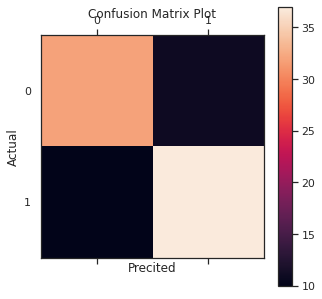

AUC: 0.862


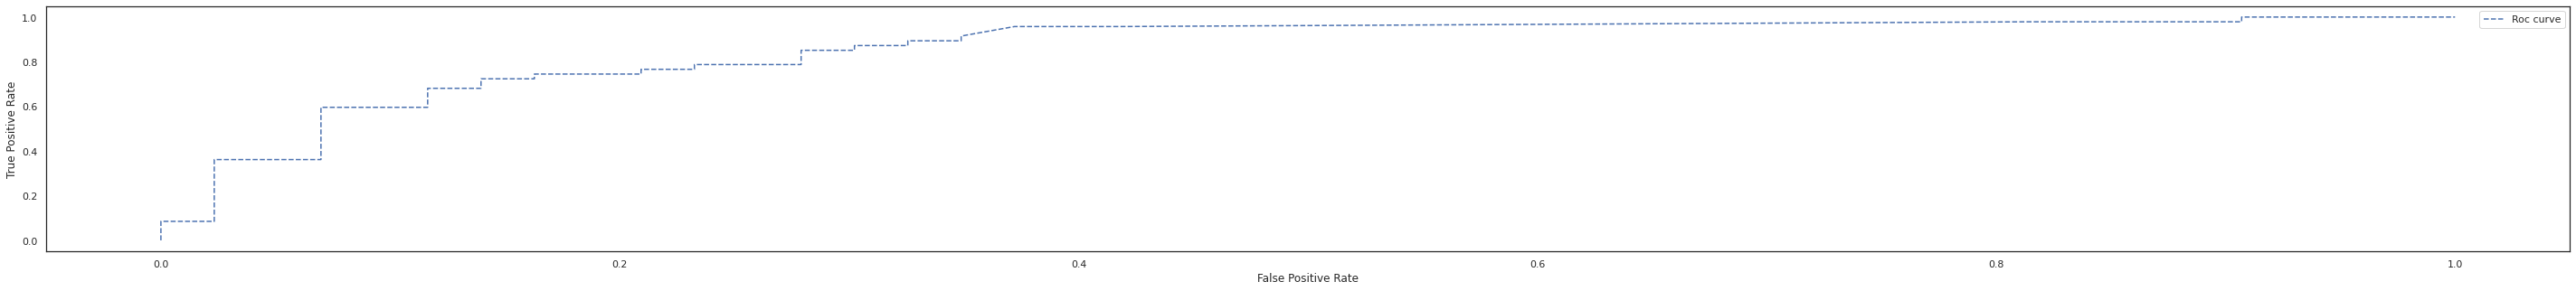

Accuracy: 0.7333333333333333
Precision: 0.8108108108108109
Recall: 0.6382978723404256


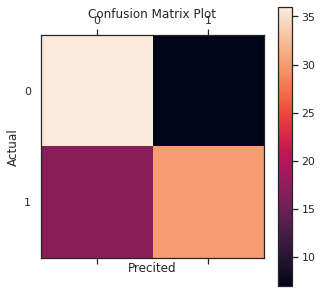

AUC: 0.804


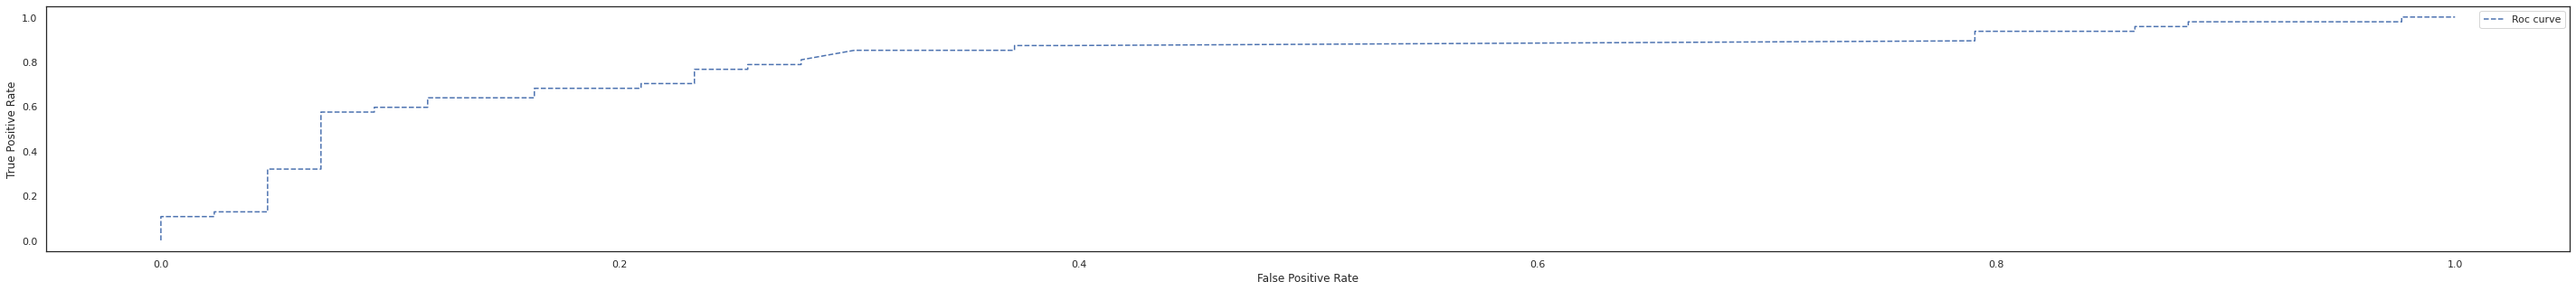

Accuracy: 0.6888888888888889
Precision: 0.7209302325581395
Recall: 0.6595744680851063


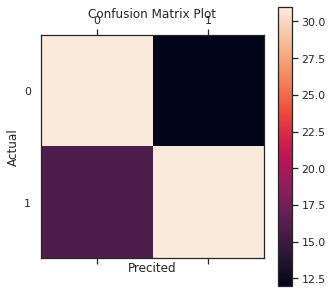

AUC: 0.779


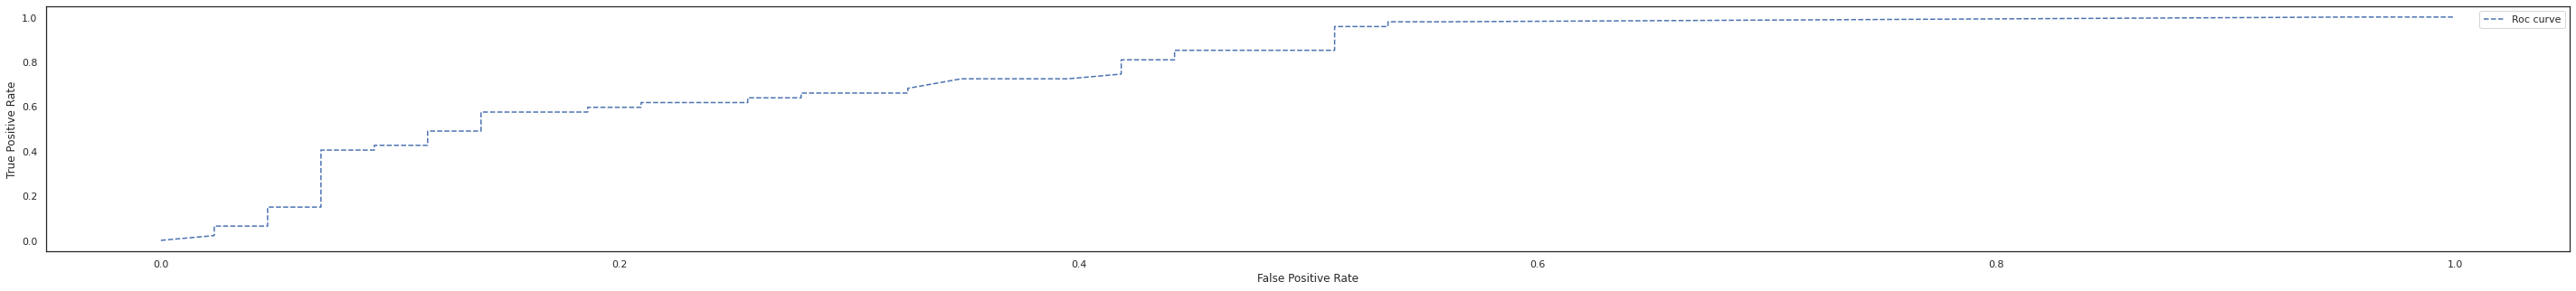

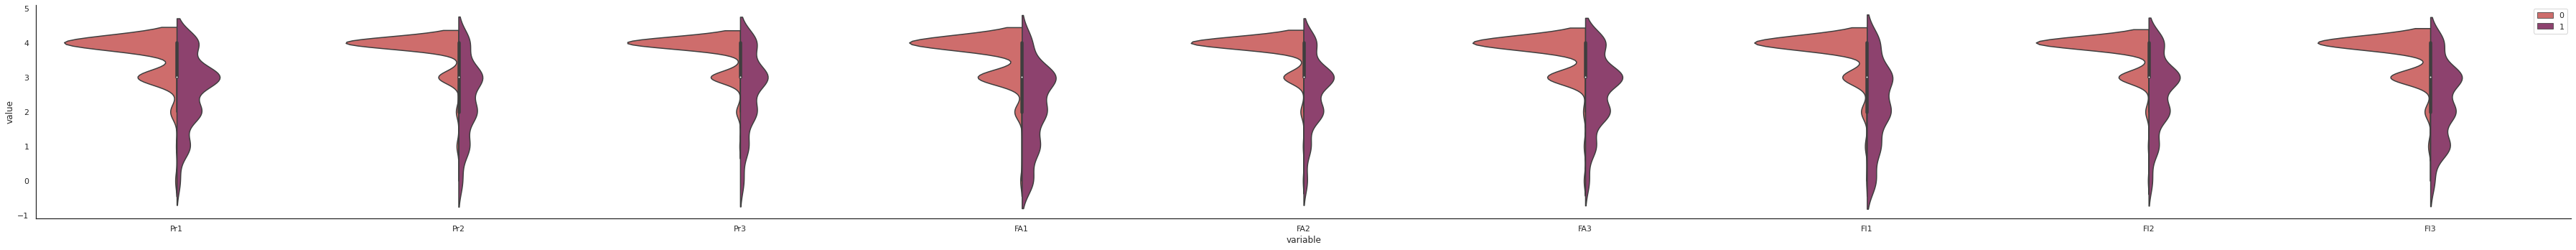

TESTING ON THE DF df_13
Accuracy for KNNis 0.7913669064748201
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.7805755395683454
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8633093525179856
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.7841726618705036
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8273381294964028
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of 

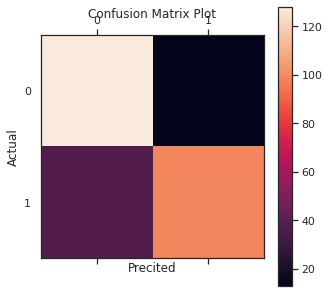

AUC: 0.901


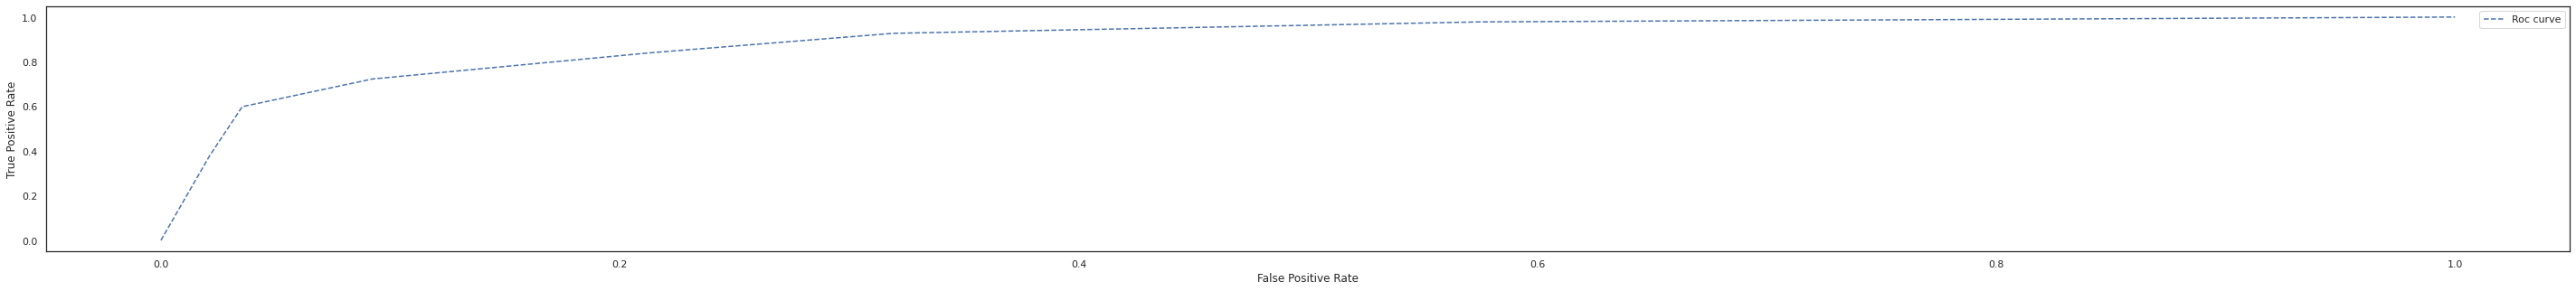

Accuracy: 0.8309352517985612
Precision: 0.8169014084507042
Recall: 0.8467153284671532


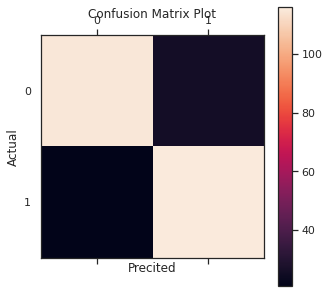

AUC: 0.886


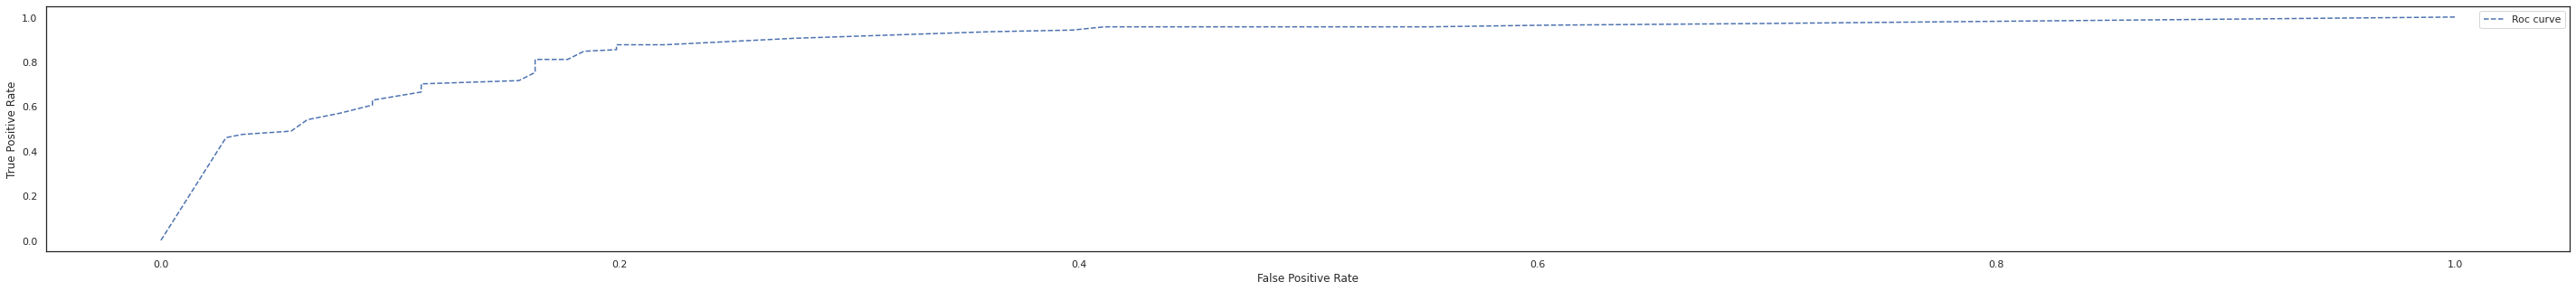

Accuracy: 0.8381294964028777
Precision: 0.8108108108108109
Recall: 0.8759124087591241


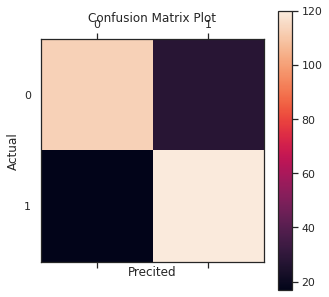

AUC: 0.927


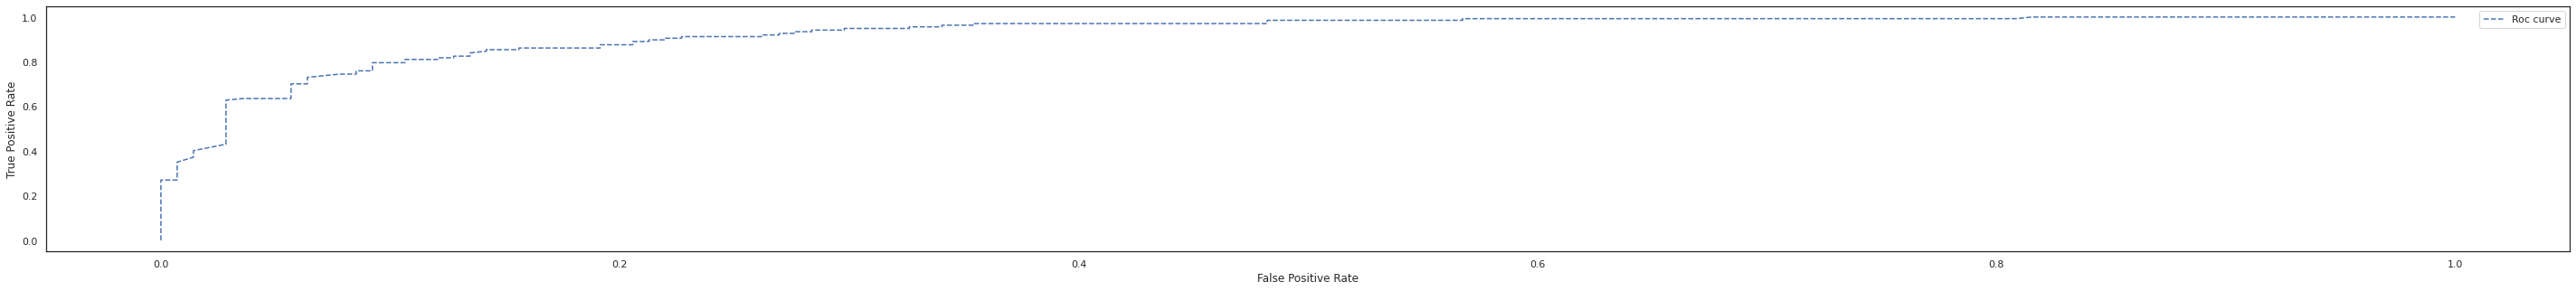

Accuracy: 0.841726618705036
Precision: 0.872
Recall: 0.7956204379562044


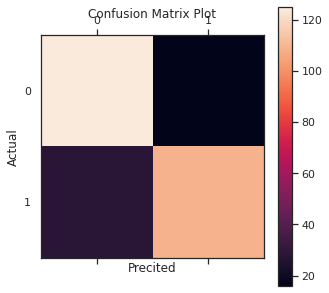

AUC: 0.929


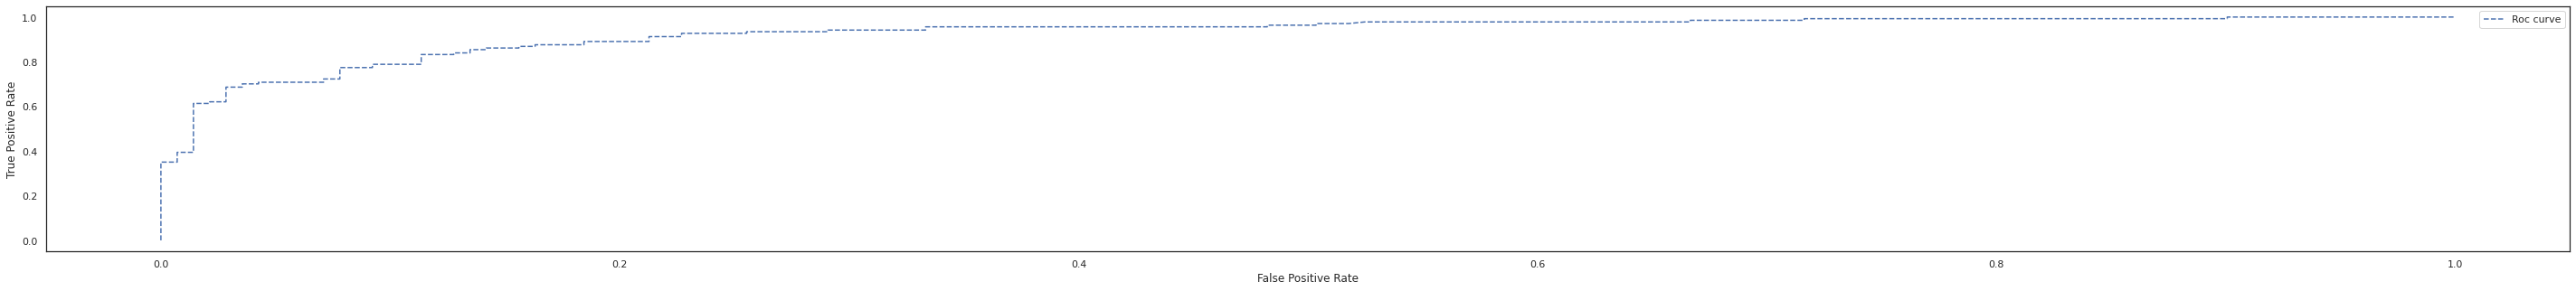

Accuracy: 0.8345323741007195
Precision: 0.8321167883211679
Recall: 0.8321167883211679


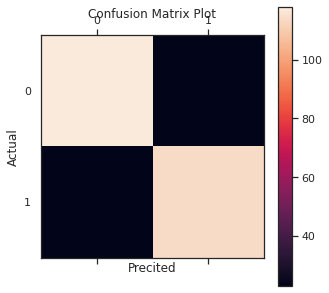

AUC: 0.903


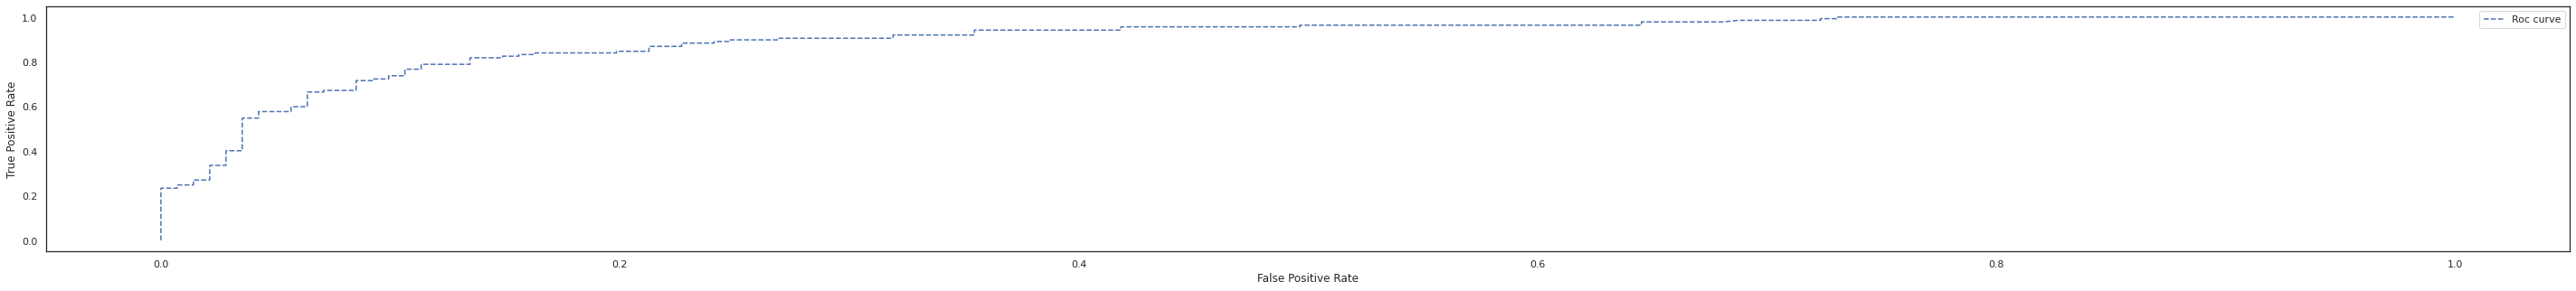

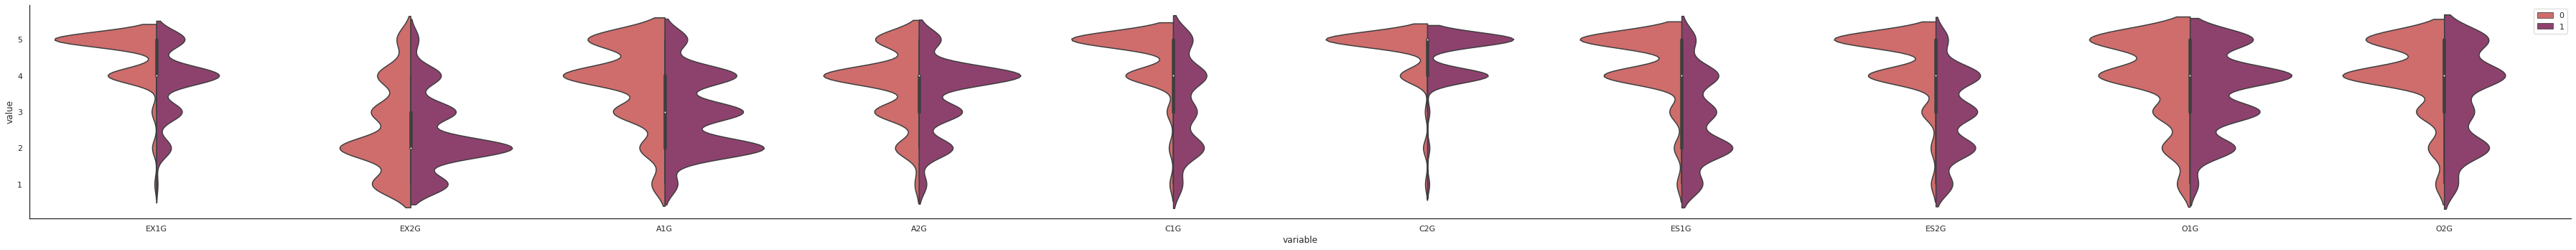

In [ ]:
for df in df_list:
  print("TESTING ON THE DF {}".format(get_var_name(df)[0]))
  #splitting and scaling (with standard scaler)
  X, y, X_train , X_test, y_train , y_test = split(df) 

  #testing the selection function  
  #s = selection(type, df) #PCA SelectKBest LASSO VAR_SEL
  op.logging.set_verbosity(op.logging.CRITICAL)
  df = df
  for model in ["KNN","Tree","RF","SVM","XGB"]:
      m = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False , n = 3)[0]
      m.fit(X_train,y_train)
      y_pred = m.predict(X_test)
      print('Accuracy for {}'.format(model)+'is {}'.format(accuracy_score(y_test, y_pred)))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
  for s in ["KNN","Tree","RF","SVM"]:
      model = modelling(s,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False, n = 3)[0]
      perm = permutation_imp(model, df, perc_items=0.2)
      print("Results of the permutation with model {} are {}".format(s,perm))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

  for model in ["KNN","Tree","RF","SVM","XGB"]:
      y_test, y_pred, y_prob = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = True , n = 3)
      eval = evaluation(y_test,y_pred, y_prob = y_prob)

  sns.set(rc={'figure.figsize':(50,5)})
  df_long = df.melt(id_vars=['CONDITION'], value_vars=list(df.columns))
  sns.set_style('white')
  ax = sns.violinplot(data=df_long.iloc[:, :10], x='variable', y='value', hue='CONDITION', split=True, palette='flare')
  ax.legend()
  sns.despine()
  plt.tight_layout()
  plt.show()


## Testing modelling function with permutation and RFE on df_1 and df_2 #TO FIX

In [ ]:
for df in df_list[:1]:
  print("TESTING ON THE DF {}".format(get_var_name(df)[0]))
  #splitting and scaling (with standard scaler)
  X, y, X_train , X_test, y_train , y_test = split(df) 

  #testing the selection function  
  #s = selection(type, df) #PCA SelectKBest LASSO VAR_SEL
  op.logging.set_verbosity(op.logging.CRITICAL)
  df = df
  for model in ["KNN","Tree","RF","SVM","XGB"]:
      m = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False , n = 3)[0]
      m.fit(X_train,y_train)
      y_pred = m.predict(X_test)
      print('Accuracy for {}'.format(model)+'is {}'.format(accuracy_score(y_test, y_pred)))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
  for s in ["KNN","Tree","RF","SVM"]:
      model = modelling(s,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False, n = 3)[0]
      perm = permutation_imp(model, df, perc_items=0.2)
      print("Results of the permutation with model {} are {}".format(s,perm))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

  for s in ["KNN","Tree","RF","SVM"]:
      model = modelling(s,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False, n = 3)[0]
      elim = rec_feat_elimination(model, df, perc_items=0.2)
      print("Results of the RFE with model {} are {}".format(s,elim))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")


  for model in ["KNN","Tree","RF","SVM","XGB"]:
      y_test, y_pred, y_prob = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = True , n = 3)
      eval = evaluation(y_test,y_pred, y_prob = y_prob)

  sns.set(rc={'figure.figsize':(50,5)})
  df_long = df.melt(id_vars=['CONDITION'], value_vars=list(df.columns))
  sns.set_style('white')
  ax = sns.violinplot(data=df_long.iloc[:, :10], x='variable', y='value', hue='CONDITION', split=True, palette='flare')
  ax.legend()
  sns.despine()
  plt.tight_layout()
  plt.show()

TESTING ON THE DF df_1
Accuracy for KNNis 0.6296296296296297
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.5888888888888889
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.6407407407407407
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.5777777777777777
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.5481481481481482
----------------------------------------------------------------------------------------------------------------------------------------------------------
Results of t

ValueError: ignored

In [ ]:
rec_feat_elimination(model = 'SVM', df_1, perc_items=0.2)

##Doin' the rest

In [ ]:
df_list = [df_11, df_12, df_13]
models = ["KNN","Tree","RF","SVM","XGB"]
selections = ['VAR_SEL']
for df in df_list:
  op.logging.set_verbosity(op.logging.CRITICAL)
  print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
  print("dataframe is: {}".format(get_var_name(df)[0])) 
  n = int(np.floor(len(df.columns) / 5))
  for s_type in selections:
    _,_, top_20_selected = selection(s_type, df, n = n)
    df_sel = df[top_20_selected]
    df_sel["CONDITION"] = df["CONDITION"]
    X, y, X_train , X_test, y_train , y_test = split(df_sel)
    print("selection type: {}".format(s_type))
    for model in models:
       m = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False , n = 3)[0]
       m.fit(X_train,y_train)
       y_pred = m.predict(X_test)
       print('Accuracy for {}'.format(model)+'is {}'.format(accuracy_score(y_test, y_pred)))
       print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
       

----------------------------------------------------------------------------------------------------------------------------------------------------------
dataframe is: df_11
selection type: VAR_SEL
Accuracy for KNNis 0.7171717171717171
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.7272727272727273
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.797979797979798
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.7121212121212122
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.747474747

##Testing selection function on all df but df_10 -> DONE!

In [ ]:
for df in df_list:
  
  #----------------------------------------------------------------------------------------
  # For the sake of simplicity, only the selected features are printed!
  # THE TYPE FOR LASSO HAS CHANGE TO TWO DIFFERENT MODELS: 1. LOGISTIC_LASSO, 2. SVM_LASSO
  # n is the 20 percent of features.
  #----------------------------------------------------------------------------------------
  
  n = int(np.floor(len(df.columns) / 5))
  for s_type in ['PCA', 'SelectKBest','SVM_LASSO', 
                 'LOGISTIC_LASSO','VAR_SEL','TAR_SEL']:

    if s_type == 'PCA':
      principal_df = selection(s_type, df)
      print("DataFrame {} with selection {} has the results:".format(get_var_name(df)[0],s_type))
      print(principal_df)

    else:
      _,_, selected_features_k = selection(s_type, df, n = n)
      print("DataFrame {} with selection {} has the results:".format(get_var_name(df)[0],s_type))
      print(selected_features_k)

    print("----------------------------------------------------------------------------------------------")

PCA Explainded variance ratio [0.20435508 0.10295192 0.07348539 0.05151905 0.04613102]
DataFrame df_1 with selection PCA has the results:
      principal component 1  principal component 2  principal component 3  \
0                 -3.299167               2.753713              -0.912216   
1                 -0.611866               1.604248              -2.123268   
2                 -1.892011               1.061025              -0.681613   
3                  3.122292              -2.027675               1.164241   
4                  0.239805               0.769253               1.232224   
...                     ...                    ...                    ...   
1341               1.581883               0.308179              -0.973833   
1342              -2.595529              -2.006650              -0.006917   
1343              -4.456542              -2.498250               0.349436   
1344              -1.579997               0.770234              -0.824096   
1345           

#Repeat the testing just for safety

## sns plot all datasets included df 10

## Repeat the test of the modelling function not for df 10




### Testing modelling function from df_1 to df_8 -> DONE!

TESTING ON THE DF df_1
Accuracy for KNNis 0.5222222222222223
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.5333333333333333
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.6185185185185185
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.6333333333333333
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.5222222222222223
----------------------------------------------------------------------------------------------------------------------------------------------------------
------------

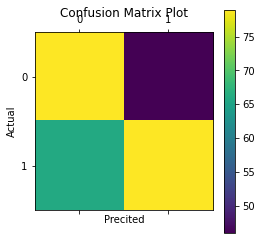

AUC: 0.628


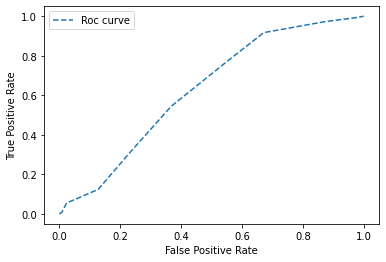

Accuracy: 0.5925925925925926
Precision: 0.6277372262773723
Recall: 0.593103448275862


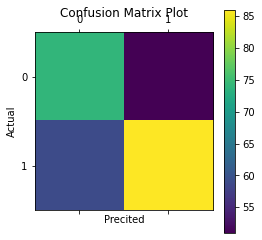

AUC: 0.639


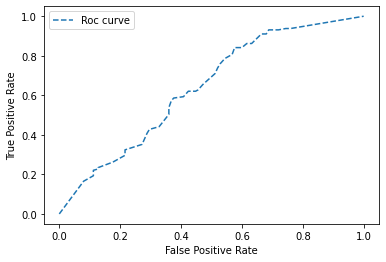

Accuracy: 0.6333333333333333
Precision: 0.6716417910447762
Recall: 0.6206896551724138


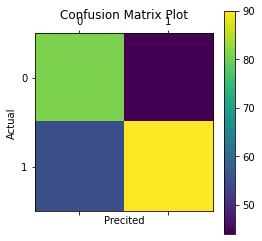

AUC: 0.695


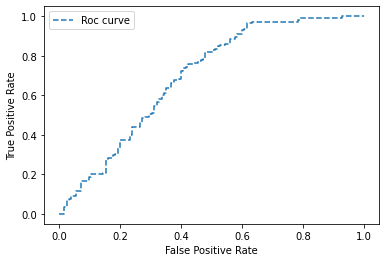

Accuracy: 0.6333333333333333
Precision: 0.6691176470588235
Recall: 0.6275862068965518


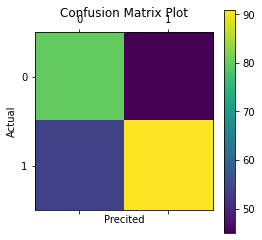

AUC: 0.706


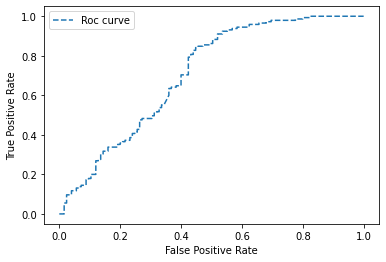

Accuracy: 0.5555555555555556
Precision: 0.6016260162601627
Recall: 0.5103448275862069


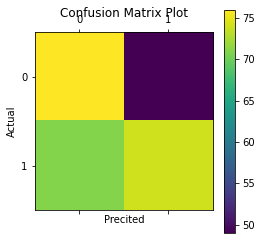

AUC: 0.586


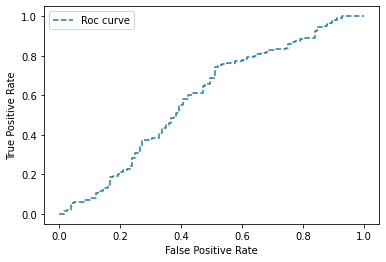

TESTING ON THE DF df_2
Accuracy for KNNis 0.7259786476868327
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.8185053380782918
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8790035587188612
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.8861209964412812
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8291814946619217
----------------------------------------------------------------------------------------------------------------------------------------------------------
------------

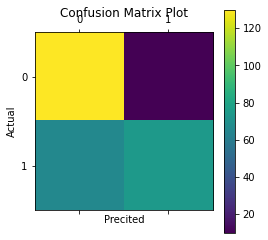

AUC: 0.879


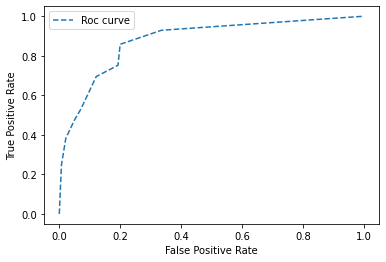

Accuracy: 0.800711743772242
Precision: 0.8148148148148148
Recall: 0.7801418439716312


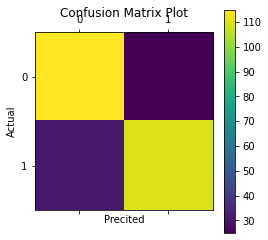

AUC: 0.870


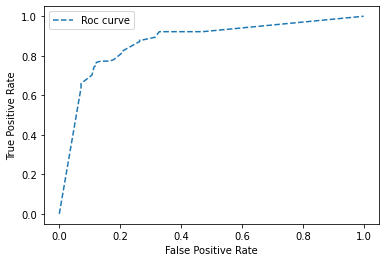

Accuracy: 0.8754448398576512
Precision: 0.83125
Recall: 0.9432624113475178


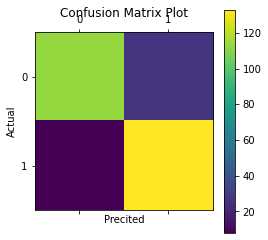

AUC: 0.958


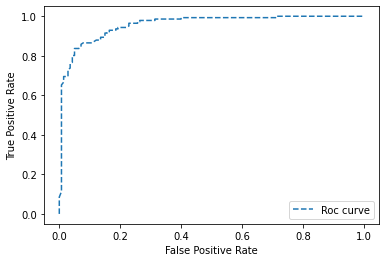

Accuracy: 0.8825622775800712
Precision: 0.875
Recall: 0.8936170212765957


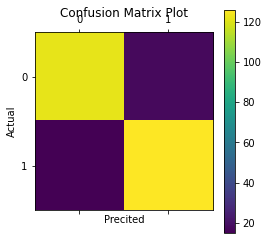

AUC: 0.943


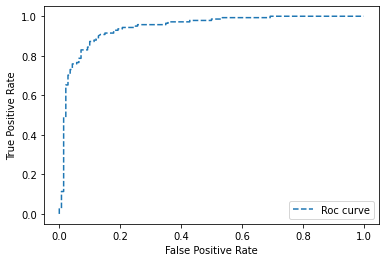

Accuracy: 0.8185053380782918
Precision: 0.8169014084507042
Recall: 0.8226950354609929


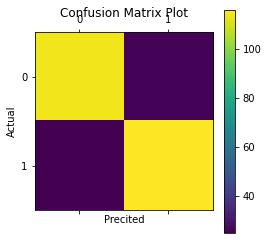

AUC: 0.889


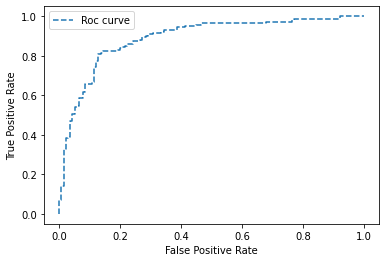

TESTING ON THE DF df_3
Accuracy for KNNis 0.691358024691358
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.7160493827160493
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8395061728395061
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.8148148148148148
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8518518518518519
----------------------------------------------------------------------------------------------------------------------------------------------------------
-------------

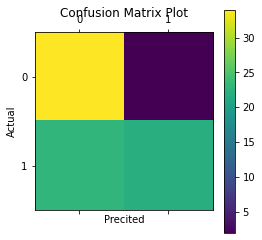

AUC: 0.857


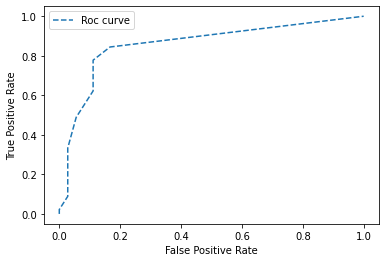

Accuracy: 0.7777777777777778
Precision: 0.8292682926829268
Recall: 0.7555555555555555


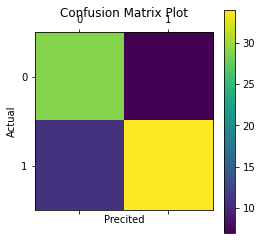

AUC: 0.865


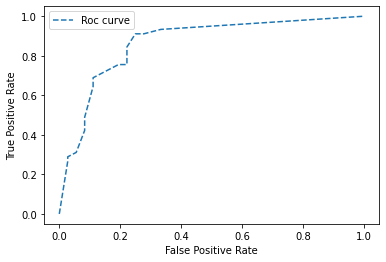

Accuracy: 0.8395061728395061
Precision: 0.9
Recall: 0.8


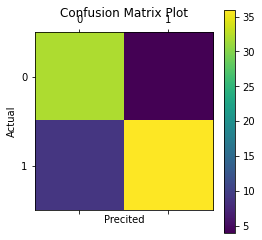

AUC: 0.933


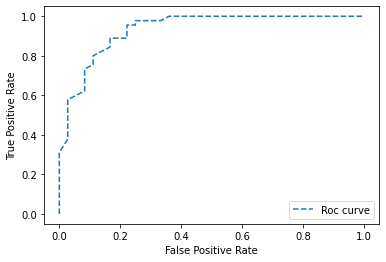

Accuracy: 0.7530864197530864
Precision: 0.8571428571428571
Recall: 0.6666666666666666


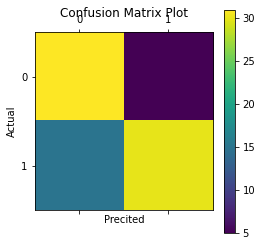

AUC: 0.854


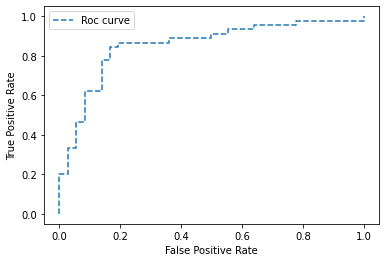

Accuracy: 0.4444444444444444
Precision: 0.0
Recall: 0.0


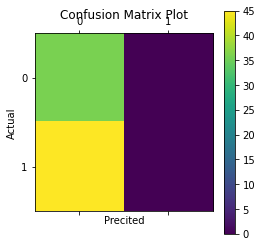

AUC: 0.801


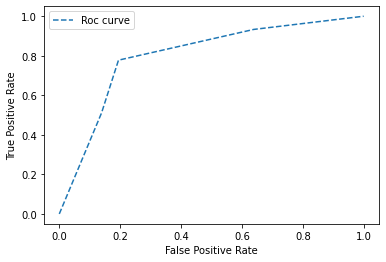

TESTING ON THE DF df_4
Accuracy for KNNis 0.7762237762237763
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.8601398601398601
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.965034965034965
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.8811188811188811
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.9300699300699301
----------------------------------------------------------------------------------------------------------------------------------------------------------
-------------

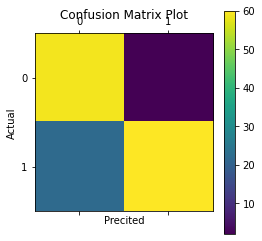

AUC: 0.929


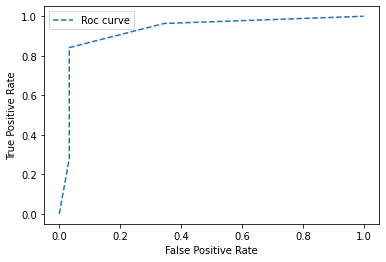

Accuracy: 0.9090909090909091
Precision: 0.9726027397260274
Recall: 0.8658536585365854


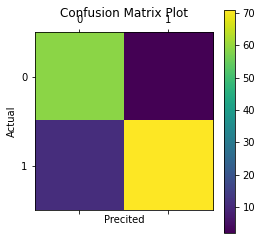

AUC: 0.920


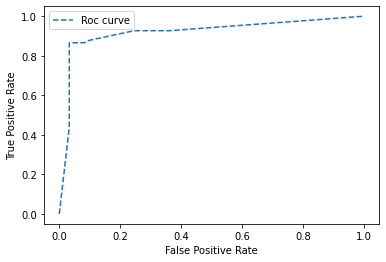

Accuracy: 0.965034965034965
Precision: 0.9753086419753086
Recall: 0.9634146341463414


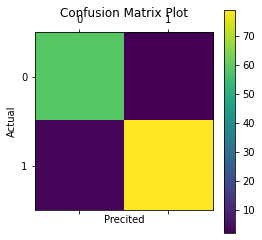

AUC: 0.976


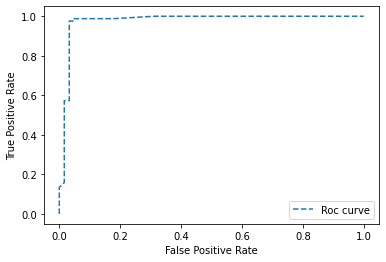

Accuracy: 0.8251748251748252
Precision: 0.9523809523809523
Recall: 0.7317073170731707


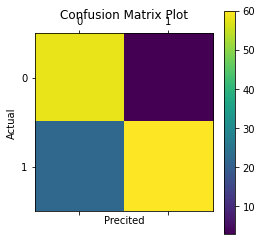

AUC: 0.935


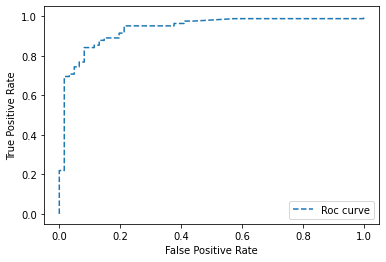

Accuracy: 0.9370629370629371
Precision: 0.9620253164556962
Recall: 0.926829268292683


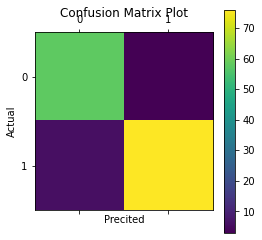

AUC: 0.978


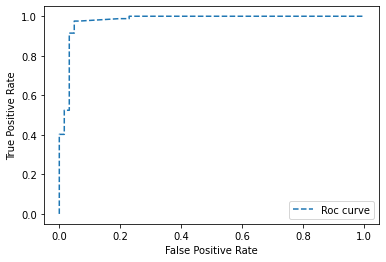

TESTING ON THE DF df_5
Accuracy for KNNis 0.8794642857142857
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.9196428571428571
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9732142857142857
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9330357142857143
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.9642857142857143
----------------------------------------------------------------------------------------------------------------------------------------------------------
------------

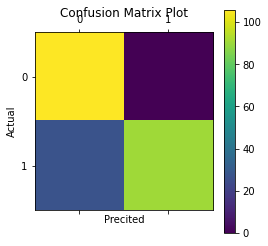

AUC: 0.968


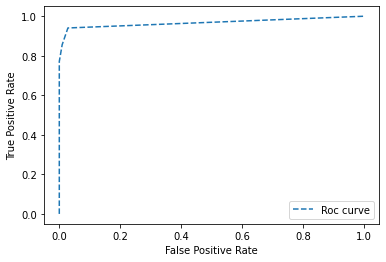

Accuracy: 0.9017857142857143
Precision: 0.9444444444444444
Recall: 0.864406779661017


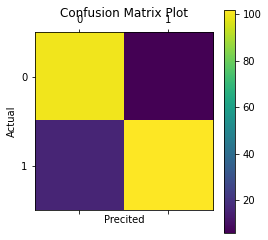

AUC: 0.958


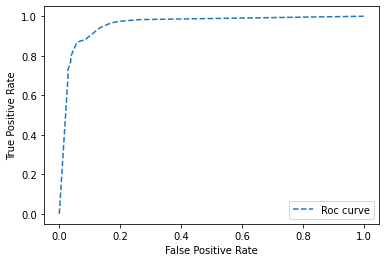

Accuracy: 0.9464285714285714
Precision: 0.9732142857142857
Recall: 0.923728813559322


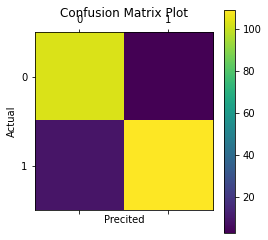

AUC: 0.991


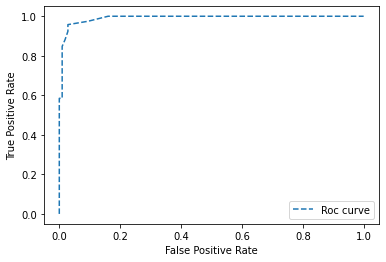

Accuracy: 0.9375
Precision: 0.9727272727272728
Recall: 0.9067796610169492


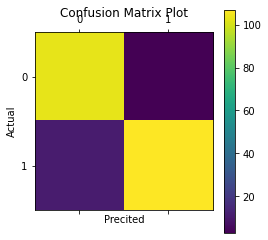

AUC: 0.989


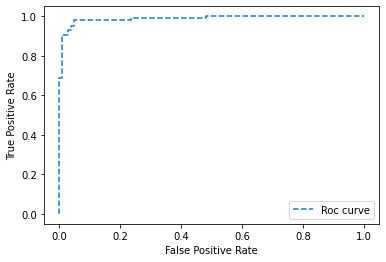

Accuracy: 0.96875
Precision: 0.9663865546218487
Recall: 0.9745762711864406


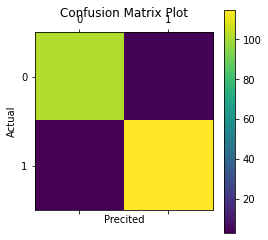

AUC: 0.995


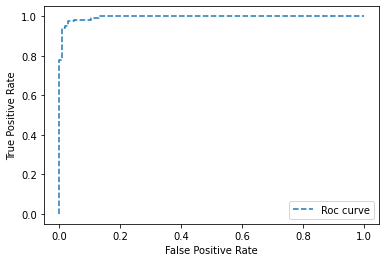

TESTING ON THE DF df_6
Accuracy for KNNis 0.8545454545454545
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.8909090909090909
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9575757575757575
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9696969696969697
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.8727272727272727
----------------------------------------------------------------------------------------------------------------------------------------------------------
------------

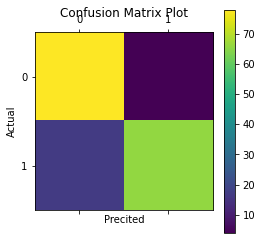

AUC: 0.946


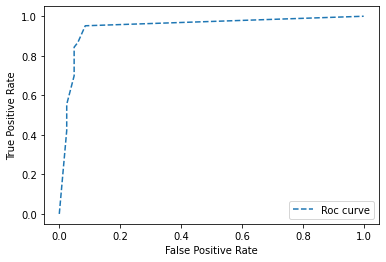

Accuracy: 0.8787878787878788
Precision: 0.8795180722891566
Recall: 0.8795180722891566


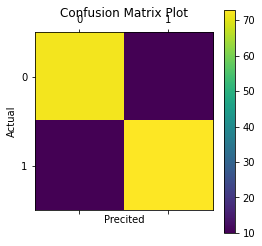

AUC: 0.946


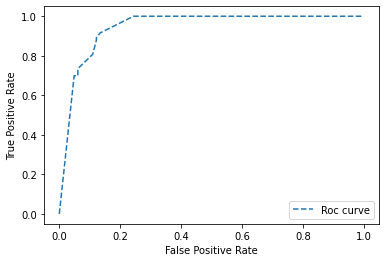

Accuracy: 0.9636363636363636
Precision: 0.9425287356321839
Recall: 0.9879518072289156


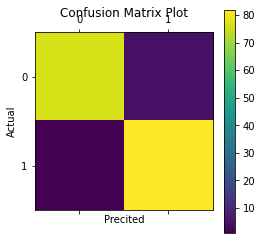

AUC: 0.981


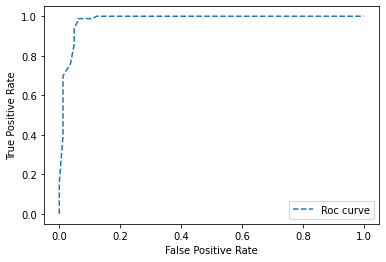

Accuracy: 0.9696969696969697
Precision: 0.9431818181818182
Recall: 1.0


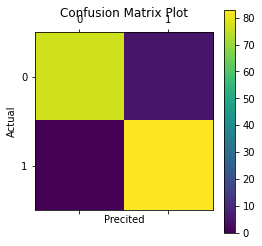

AUC: 0.987


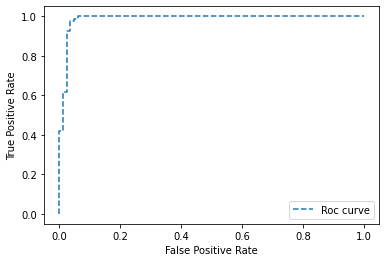

Accuracy: 0.9696969696969697
Precision: 0.9431818181818182
Recall: 1.0


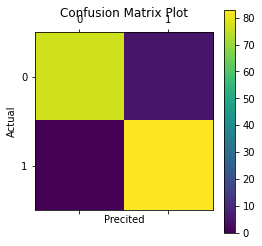

AUC: 0.973


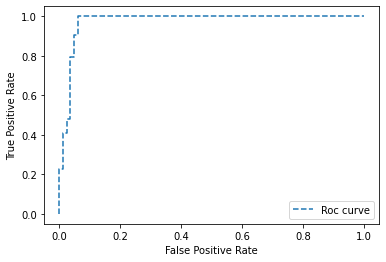

TESTING ON THE DF df_7
Accuracy for KNNis 0.8798076923076923
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.9230769230769231
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.9567307692307693
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.9326923076923077
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.49038461538461536
----------------------------------------------------------------------------------------------------------------------------------------------------------
-----------

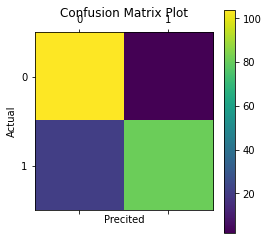

AUC: 0.949


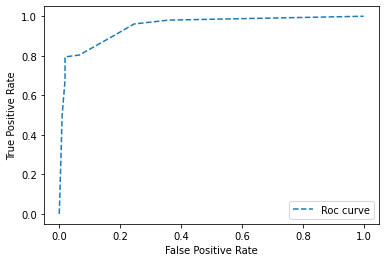

Accuracy: 0.8990384615384616
Precision: 0.9354838709677419
Recall: 0.8529411764705882


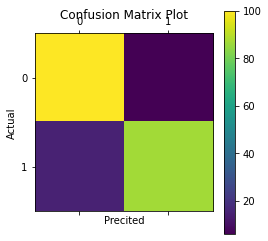

AUC: 0.952


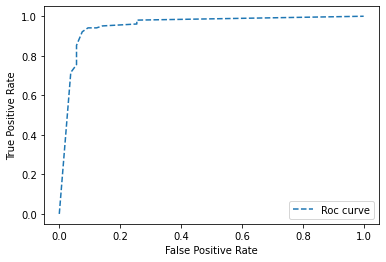

Accuracy: 0.9567307692307693
Precision: 0.9345794392523364
Recall: 0.9803921568627451


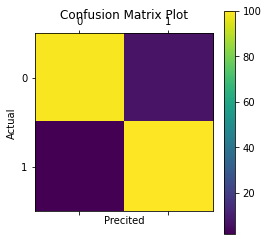

AUC: 0.986


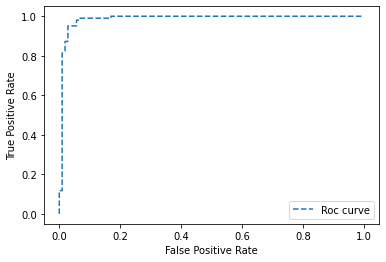

Accuracy: 0.8990384615384616
Precision: 0.900990099009901
Recall: 0.8921568627450981


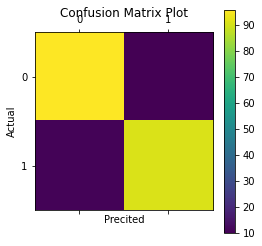

AUC: 0.950


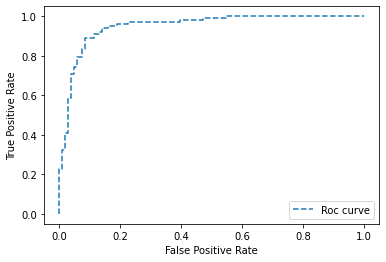

Accuracy: 0.9567307692307693
Precision: 0.9345794392523364
Recall: 0.9803921568627451


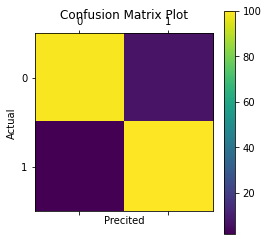

AUC: 0.980


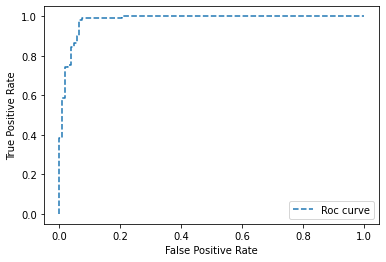

TESTING ON THE DF df_8
Accuracy for KNNis 0.8602941176470589
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.875
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.8970588235294118
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.8970588235294118
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.4411764705882353
----------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------

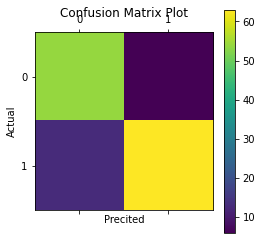

AUC: 0.921


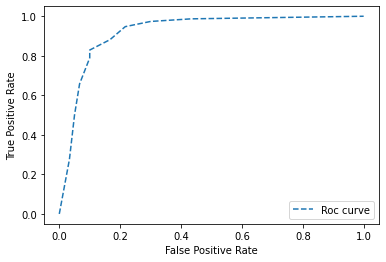

Accuracy: 0.875
Precision: 0.8831168831168831
Recall: 0.8947368421052632


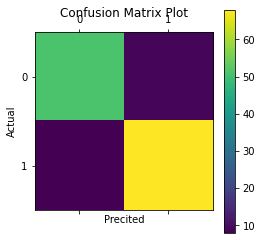

AUC: 0.889


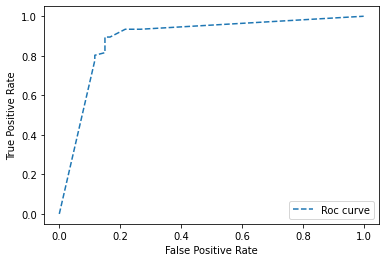

Accuracy: 0.9044117647058824
Precision: 0.9090909090909091
Recall: 0.9210526315789473


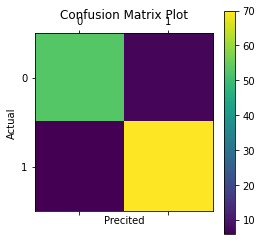

AUC: 0.964


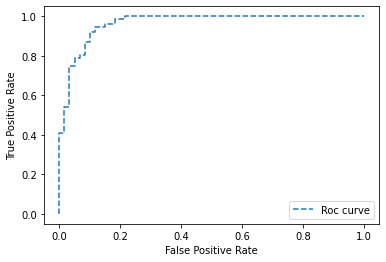

Accuracy: 0.7426470588235294
Precision: 0.9183673469387755
Recall: 0.5921052631578947


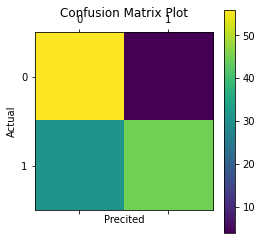

AUC: 0.924


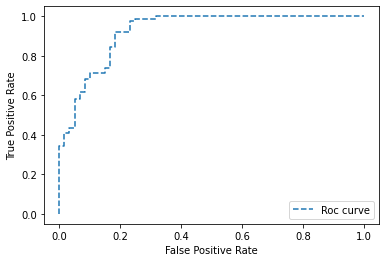

Accuracy: 0.9044117647058824
Precision: 0.8888888888888888
Recall: 0.9473684210526315


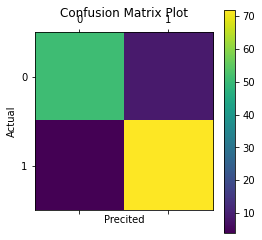

AUC: 0.956


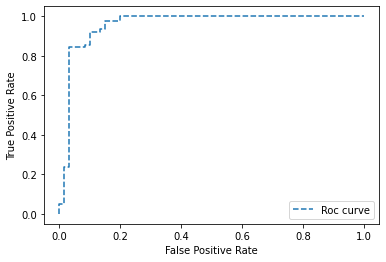

In [ ]:
for df in[df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8]:
  print("TESTING ON THE DF {}".format(get_var_name(df)[0]))
  #splitting and scaling (with standard scaler)
  X, y, X_train , X_test, y_train , y_test = split(df) 

  #testing the selection function  
  #s = selection(type, df) #PCA SelectKBest LASSO VAR_SEL
  op.logging.set_verbosity(op.logging.CRITICAL)
  df = df
  for model in ["KNN","Tree","RF","SVM","XGB"]:
      m = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False , n = 3)[0]
      m.fit(X_train,y_train)
      y_pred = m.predict(X_test)
      print('Accuracy for {}'.format(model)+'is {}'.format(accuracy_score(y_test, y_pred)))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
  for s in ["KNN","Tree","RF","SVM"]:
      #model = modelling(s,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False, n = 3)[0]
      #perm = permutation_imp(model, df, perc_items=0.2)
      #print("Results of the permutation with model {} are {}".format(s,perm))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

  for model in ["KNN","Tree","RF","SVM","XGB"]:
      y_test, y_pred, y_prob = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = True , n = 3)
      eval = evaluation(y_test,y_pred, y_prob = y_prob)


### Testing modelling function from df_9, df_11, df_12, df_13 -> DONE!

In [ ]:
for df in [df_1, df_8, df_11, df_13]:
  print("TESTING ON THE DF {}".format(get_var_name(df)[0]))
  #splitting and scaling (with standard scaler)
  X, y, X_train , X_test, y_train , y_test = split(df) 

  #testing the selection function  
  #s = selection(type, df) #PCA SelectKBest LASSO VAR_SEL
  op.logging.set_verbosity(op.logging.CRITICAL)
  df = df
  for model in ["KNN","Tree","RF","SVM","XGB"]:
      m = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False , n = 3)[0]
      m.fit(X_train,y_train)
      y_pred = m.predict(X_test)
      print('Accuracy for {}'.format(model)+'is {}'.format(accuracy_score(y_test, y_pred)))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
  for s in ["KNN","Tree","RF","SVM"]:
      model = modelling(s,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = False, n = 3)[0]
      perm = permutation_imp(model, df, perc_items=0.2)
      print("Results of the permutation with model {} are {}".format(s,perm))
      print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

  for model in ["KNN","Tree","RF","SVM","XGB"]:
      y_test, y_pred, y_prob = modelling(model,X_train, X_test, y_train, y_test, hyper = None,  tuning = True, flow = True , n = 3)
      eval = evaluation(y_test,y_pred, y_prob = y_prob)

  sns.set(rc={'figure.figsize':(50,5)})
  df_long = df.melt(id_vars=['CONDITION'], value_vars=list(df.columns))
  sns.set_style('white')
  ax = sns.violinplot(data=df_long.iloc[:, :10], x='variable', y='value', hue='CONDITION', split=True, palette='flare')
  ax.legend()
  sns.despine()
  plt.tight_layout()
  plt.show()



TESTING ON THE DF df_1
Accuracy for KNNis 0.5444444444444444
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for Treeis 0.562962962962963
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for RFis 0.6444444444444445
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for SVMis 0.6481481481481481
----------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy for XGBis 0.5666666666666667
----------------------------------------------------------------------------------------------------------------------------------------------------------


NameError: ignored

##Testing selection function on all the df (included df10) -> DONE!

In [ ]:
for df in [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13]:
  
  #----------------------------------------------------------------------------------------
  # For the sake of simplicity, only the selected features are printed!
  # THE TYPE FOR LASSO HAS CHANGE TO TWO DIFFERENT MODELS: 1. LOGISTIC_LASSO, 2. SVM_LASSO
  # n is the 20 percent of features.
  #----------------------------------------------------------------------------------------
  
  n = int(np.floor(len(df.columns) / 5))
  for s_type in ['PCA', 'SelectKBest','SVM_LASSO', 
                 'LOGISTIC_LASSO','VAR_SEL','TAR_SEL']:

    if s_type == 'PCA':
      principal_df = selection(s_type, df)
      print("DataFrame {} with selection {} has the results:".format(get_var_name(df)[0],s_type))
      print(principal_df)

    else:
      _,_, selected_features_k = selection(s_type, df, n = n)
      print("DataFrame {} with selection {} has the results:".format(get_var_name(df)[0],s_type))
      print(selected_features_k)

    print("----------------------------------------------------------------------------------------------")

# Links

In [ ]:
# 5 Feature Selection Method from Scikit-Learn you should know
# Link:
# https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172#:~:text=Feature%20Selection%20Sequential%20Feature%20Selection%20%28SFS%29%20New%20in,backward%20based%20on%20the%20cross-validation%20score%20an%20estimator.


In [ ]:
#================================================================================================================================
#-----------------------------------------------Pairwise-correlation-------------------------------------------------------------
# Remove columns that are highly correlated
#--------------------------------------------------------------------------------------------------------------------------------
# sklearn Package:
# sklearn.metrics.pairwise_distances(X, Y=None, metric='correlation', *, n_jobs=None, force_all_finite=True, **kwds)
#It is important to use 'correlation' metric to get the correct result, see link (2).
# Links: 
# (1) Pairwise distance (general)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
# (2) pairwise distance with metric correlation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation
# https://stackoverflow.com/questions/55579191/what-does-sklearns-pairwise-distances-with-metric-correlation-do
#---------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#================================================================================================================================
#----------------------------------------------Correlation With Target-----------------------------------------------------------
# Select the columns that are highly correlated with the target value
#--------------------------------------------------------------------------------------------------------------------------------
# sklearn Package: 
# sklearn.cross_decomposition.CCA  (Canonical Correlation Analysis)
# Links: 
# (1) CCA
# https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html
# (2) https://stackoverflow.com/questions/69800500/how-to-calculate-correlation-coefficients-using-sklearn-cca-module
#--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#================================================================================================================================
#---------------------------------------------Recursive Feature Elimination (RFE)------------------------------------------------ Gio
# Use a machine learning model to eliminate features after recursive training
#--------------------------------------------------------------------------------------------------------------------------------
# sklearn Package:
# sklearn.feature_selection.RFE 
# Links:
# (1) RFE
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
#--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#================================================================================================================================
#---------------------------------------------Sequential Feature Selection(SFS)-------------------------------------------------- Gio
# Greedy algorith to find best features by either going forward or backward based on the cross-validation score an estimator
#--------------------------------------------------------------------------------------------------------------------------------
# sklearn Package:
# sklearn.feature_selection.SequentialFeatureSelector
# Links:
# (1) SFS
# sklearn.feature_selection.SequentialFeatureSelector
#--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#================================================================================================================================
#---------------------------------------------Random Projection------------------------------------------------------------------
# Feature reduction based on the Johnson-Lindenstrauss Lemma which states that the pariwise distance of two points is preserved 
# by projecting the points onto random direction P (dim(P) = m ~ log(N)) in which N is the number of sample points of the dataset.
#--------------------------------------------------------------------------------------------------------------------------------
# General info:
# https://stackabuse.com/random-projection-theory-and-implementation-in-python-with-scikit-learn/
# Links:
# (1) Johnson-Lindenstrauss-min-dim
# https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.johnson_lindenstrauss_min_dim.html
# (2) Sparse Random Projection
# https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.SparseRandomProjection.html
# (3) Gaussian Random Projection
# https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html
# -------------------------------------------------------------------------------------------------------------------------------

In [ ]:
for df in df_list:
  
  #----------------------------------------------------------------------------------------
  # For the sake of simplicity, only the selected features are printed!
  # THE TYPE FOR LASSO HAS CHANGE TO TWO DIFFERENT MODELS: 1. LOGISTIC_LASSO, 2. SVM_LASSO
  # n is the 20 percent of features.
  #----------------------------------------------------------------------------------------
  
  n = int(np.floor(len(df.columns) / 5))
  for s_type in ['PCA', 'SelectKBest','SVM_LASSO', 
                 'LOGISTIC_LASSO','VAR_SEL','TAR_SEL']:

    if s_type == 'PCA':
      principal_df = selection(s_type, df)
      print("DataFrame {} with selection {} has the results:".format(get_var_name(df)[0],s_type))
      print(principal_df)

    else:
      _,_, selected_features_k = selection(s_type, df, n = n)
      print("DataFrame {} with selection {} has the results:".format(get_var_name(df)[0],s_type))
      print(selected_features_k)

    print("----------------------------------------------------------------------------------------------")